#Modelo Predictivo "Nombre del Proyecto"

## Importación de datos y librerías

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno #VERIFICA LOS NULOS DE LAS VARIABLES INDEPENDIENTES

In [2]:
# Ruta del archivo
data_transacional_ruta = 'https://ifarhu.blob.core.windows.net/pase-u/DATA.csv'

In [3]:
# Carga del dataframe de la data transacional
data_transacional_full = pd.read_csv(data_transacional_ruta, delimiter =",",encoding='UTF-8')
data_transacional_full.head()

,APPID,ID_DOC,LINEA_ASIG,desi_final_cda,appid_1,id_doc_1,antig_ruc_solici,antiguedad_laboral,PERID,deuda_cm,...,distrito,fecha_nac,sexo,ubigeo,grado_instruccion,grado_instruccion_grupo,ingreso_1,situacion,tipodocumento,tipotrabajador
0,6572513,18152446172043173005,3000.0,Aprobar,6572513,18152446172043173005,0.0,85.0,202308,0.0,...,ATE,1970-03-29,M,140103.0,TECNICA COMPLETA,TECNICA,NaN,NaN,NaN,NaN
1,6572513,18152446172043173005,3000.0,Aprobar,6572513,18152446172043173005,NaN,NaN,202308,NaN,...,ATE,1970-03-29,M,140103.0,TECNICA COMPLETA,TECNICA,NaN,NaN,NaN,NaN
2,6516789,18323415895941564328,1200.0,Rechazar,6516789,18323415895941564328,0.0,285.0,202307,0.0,...,VILLA MARIA DEL TRIUNFO,1987-12-31,M,140132.0,SECUNDARIA COMPLETA,BASICA,NaN,NaN,NaN,NaN
3,6516789,18323415895941564328,1200.0,Rechazar,6516789,18323415895941564328,NaN,NaN,202307,NaN,...,VILLA MARIA DEL TRIUNFO,1987-12-31,M,140132.0,SECUNDARIA COMPLETA,BASICA,NaN,NaN,NaN,NaN
4,6620999,19149422554396897414,1650.0,Aprobar,6620999,19149422554396897414,0.0,49.0,202310,0.0,...,PAITA,1997-05-10,M,190501.0,SECUNDARIA COMPLETA,BASICA,2753.0,A,DNI,EMPLEADO


In [4]:
data_transacional_full.columns.to_list()

['APPID',
 'ID_DOC',
 'LINEA_ASIG',
 'desi_final_cda',
 'appid_1',
 'id_doc_1',
 'antig_ruc_solici',
 'antiguedad_laboral',
 'PERID',
 'deuda_cm',
 'edad',
 'estado_civil',
 'flag_nobancariza',
 'ingreso',
 'ingreso_calc',
 'ingreso_estimado',
 'ingreso_neto_mensual',
 'nivel_estudios',
 'nacionalidad',
 'nombre_empresa',
 'num_dependientes',
 'profesion_cargo',
 'profesion_ocupacion',
 'ruc',
 'ruc_estado_sunat',
 'saldo_cm',
 'tipo_actividad',
 'tipo_empleador',
 'tipo_ingreso',
 'tipo_vivienda',
 'n_imp_tot_spsa',
 'n_imp_tot_far',
 'n_imp_tot_oec',
 'n_imp_tot_pro',
 'n_imp_tot_mkr',
 'n_imp_efe_spsa',
 'n_imp_efe_far',
 'n_imp_efe_oec',
 'n_imp_efe_pro',
 'n_imp_efe_mkr',
 'n_imp_cre_spsa',
 'n_imp_cre_far',
 'n_imp_cre_oec',
 'n_imp_cre_pro',
 'n_imp_cre_mkr',
 'n_imp_deb_spsa',
 'n_imp_deb_far',
 'n_imp_deb_oec',
 'n_imp_deb_pro',
 'n_imp_deb_mkr',
 'n_imp_agora_spsa',
 'n_imp_agora_far',
 'n_imp_agora_oec',
 'n_imp_agora_pro',
 'n_imp_agora_mkr',
 'n_imp_otros_spsa',
 'n_imp_ot

In [5]:
data_transacional = data_transacional_full.copy()

In [6]:
## Eliminación de columnas con mas del 70% de registros null
null_percentage = data_transacional.isnull().sum() / len(data_transacional)
threshold = 0.7
columns_to_drop = null_percentage[null_percentage >= threshold].index
data_transacional.drop(columns=columns_to_drop, inplace=True)
print(data_transacional)

          APPID                ID_DOC  LINEA_ASIG desi_final_cda  appid_1  \
0       6572513  18152446172043173005      3000.0        Aprobar  6572513   
1       6572513  18152446172043173005      3000.0        Aprobar  6572513   
2       6516789  18323415895941564328      1200.0       Rechazar  6516789   
3       6516789  18323415895941564328      1200.0       Rechazar  6516789   
4       6620999  19149422554396897414      1650.0        Aprobar  6620999   
...         ...                   ...         ...            ...      ...   
674432  6393800  19291626388797206346         0.0       Rechazar  6393800   
674433  6361054  19149353364320970198         0.0       Rechazar  6361054   
674434  6361054  19149353364320970198         0.0       Rechazar  6361054   
674435  6623655  18145451556260382278      1200.0        Aprobar  6623655   
674436  6623655  18145451556260382278      1200.0        Aprobar  6623655   

                    id_doc_1  antig_ruc_solici  antiguedad_laboral   PERID 

In [7]:
data_transacional.head()

,APPID,ID_DOC,LINEA_ASIG,desi_final_cda,appid_1,id_doc_1,antig_ruc_solici,antiguedad_laboral,PERID,deuda_cm,...,distrito,fecha_nac,sexo,ubigeo,grado_instruccion,grado_instruccion_grupo,ingreso_1,situacion,tipodocumento,tipotrabajador
0,6572513,18152446172043173005,3000.0,Aprobar,6572513,18152446172043173005,0.0,85.0,202308,0.0,...,ATE,1970-03-29,M,140103.0,TECNICA COMPLETA,TECNICA,NaN,NaN,NaN,NaN
1,6572513,18152446172043173005,3000.0,Aprobar,6572513,18152446172043173005,NaN,NaN,202308,NaN,...,ATE,1970-03-29,M,140103.0,TECNICA COMPLETA,TECNICA,NaN,NaN,NaN,NaN
2,6516789,18323415895941564328,1200.0,Rechazar,6516789,18323415895941564328,0.0,285.0,202307,0.0,...,VILLA MARIA DEL TRIUNFO,1987-12-31,M,140132.0,SECUNDARIA COMPLETA,BASICA,NaN,NaN,NaN,NaN
3,6516789,18323415895941564328,1200.0,Rechazar,6516789,18323415895941564328,NaN,NaN,202307,NaN,...,VILLA MARIA DEL TRIUNFO,1987-12-31,M,140132.0,SECUNDARIA COMPLETA,BASICA,NaN,NaN,NaN,NaN
4,6620999,19149422554396897414,1650.0,Aprobar,6620999,19149422554396897414,0.0,49.0,202310,0.0,...,PAITA,1997-05-10,M,190501.0,SECUNDARIA COMPLETA,BASICA,2753.0,A,DNI,EMPLEADO


In [8]:
data_transacional.shape

(674437, 208)

In [10]:
## Eliminación de las variables _6m_ que representan los 6 meses
data_transacional = data_transacional.loc[:, ~data_transacional.columns.str.contains('_6m_')]

In [11]:
data_transacional.shape

(674437, 179)

In [12]:
## Eliminación de las variables 6m que representan los 6 meses
data_transacional = data_transacional.loc[:, ~data_transacional.columns.str.contains('_6m')]

In [13]:
data_transacional.shape

(674437, 138)

In [14]:
data_transacional.head()

,APPID,ID_DOC,LINEA_ASIG,desi_final_cda,appid_1,id_doc_1,antig_ruc_solici,antiguedad_laboral,PERID,deuda_cm,...,distrito,fecha_nac,sexo,ubigeo,grado_instruccion,grado_instruccion_grupo,ingreso_1,situacion,tipodocumento,tipotrabajador
0,6572513,18152446172043173005,3000.0,Aprobar,6572513,18152446172043173005,0.0,85.0,202308,0.0,...,ATE,1970-03-29,M,140103.0,TECNICA COMPLETA,TECNICA,NaN,NaN,NaN,NaN
1,6572513,18152446172043173005,3000.0,Aprobar,6572513,18152446172043173005,NaN,NaN,202308,NaN,...,ATE,1970-03-29,M,140103.0,TECNICA COMPLETA,TECNICA,NaN,NaN,NaN,NaN
2,6516789,18323415895941564328,1200.0,Rechazar,6516789,18323415895941564328,0.0,285.0,202307,0.0,...,VILLA MARIA DEL TRIUNFO,1987-12-31,M,140132.0,SECUNDARIA COMPLETA,BASICA,NaN,NaN,NaN,NaN
3,6516789,18323415895941564328,1200.0,Rechazar,6516789,18323415895941564328,NaN,NaN,202307,NaN,...,VILLA MARIA DEL TRIUNFO,1987-12-31,M,140132.0,SECUNDARIA COMPLETA,BASICA,NaN,NaN,NaN,NaN
4,6620999,19149422554396897414,1650.0,Aprobar,6620999,19149422554396897414,0.0,49.0,202310,0.0,...,PAITA,1997-05-10,M,190501.0,SECUNDARIA COMPLETA,BASICA,2753.0,A,DNI,EMPLEADO


In [15]:
## Filtramos todos los campos que contengan _12m
df_12m = data_transacional.filter(like='_12m', axis=1)

In [16]:
df_12m.columns

Index(['prom_imp_efe_spsa_12m', 'prom_imp_efe_far_12m', 'prom_imp_efe_oec_12m',
       'prom_imp_efe_pro_12m', 'prom_imp_cre_spsa_12m', 'prom_imp_cre_far_12m',
       'prom_imp_cre_oec_12m', 'prom_imp_cre_pro_12m', 'prom_imp_deb_spsa_12m',
       'prom_imp_deb_far_12m', 'prom_imp_deb_oec_12m', 'prom_imp_deb_pro_12m',
       'prom_imp_agora_spsa_12m', 'prom_imp_agora_far_12m',
       'prom_imp_agora_oec_12m', 'prom_imp_agora_pro_12m',
       'prom_imp_otros_spsa_12m', 'prom_imp_otros_far_12m',
       'prom_imp_otros_oec_12m', 'prom_imp_otros_pro_12m', 'prom_imp_spsa_12m',
       'prom_imp_far_12m', 'prom_imp_oec_12m', 'prom_imp_pro_12m',
       'max_compra_spsa_12m', 'max_compra_far_12m', 'max_compra_oec_12m',
       'max_compra_pro_12m', 'max_fec_compra_spsa_12m',
       'max_fec_compra_far_12m', 'max_fec_compra_oec_12m',
       'max_fec_compra_pro_12m', 'num_compras_spsa_12m', 'num_compras_far_12m',
       'num_compras_oec_12m', 'num_compras_pro_12m', 'prom_num_spsa_12m',
       'prom

In [17]:
df_12m = df_12m[[ 'max_fec_compra_spsa_12m', 'frec_compra_spsa_12m', 'prom_imp_spsa_12m',
                  'max_fec_compra_far_12m', 'frec_compra_far_12m', 'prom_imp_far_12m',
                  'max_fec_compra_oec_12m', 'frec_compra_oec_12m', 'prom_imp_oec_12m',
                  'max_fec_compra_pro_12m', 'frec_compra_pro_12m', 'prom_imp_pro_12m']]

In [18]:
df_12m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674437 entries, 0 to 674436
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   max_fec_compra_spsa_12m  598989 non-null  object 
 1   frec_compra_spsa_12m     674437 non-null  int64  
 2   prom_imp_spsa_12m        598989 non-null  float64
 3   max_fec_compra_far_12m   586149 non-null  object 
 4   frec_compra_far_12m      674437 non-null  int64  
 5   prom_imp_far_12m         586149 non-null  float64
 6   max_fec_compra_oec_12m   288322 non-null  object 
 7   frec_compra_oec_12m      674437 non-null  int64  
 8   prom_imp_oec_12m         288322 non-null  float64
 9   max_fec_compra_pro_12m   234324 non-null  object 
 10  frec_compra_pro_12m      674437 non-null  int64  
 11  prom_imp_pro_12m         234324 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 61.7+ MB


In [19]:
### Eliminamos del dataframe principal las columnas que contengan el _12m que son los 12 meses
data_transacional = data_transacional.loc[:, ~data_transacional.columns.str.contains('_12m')]

In [20]:
data_transacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674437 entries, 0 to 674436
Data columns (total 93 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   APPID                                 674437 non-null  int64  
 1   ID_DOC                                674437 non-null  object 
 2   LINEA_ASIG                            674299 non-null  float64
 3   desi_final_cda                        674437 non-null  object 
 4   appid_1                               674437 non-null  int64  
 5   id_doc_1                              674437 non-null  object 
 6   antig_ruc_solici                      337219 non-null  float64
 7   antiguedad_laboral                    337218 non-null  float64
 8   PERID                                 674437 non-null  int64  
 9   deuda_cm                              337219 non-null  float64
 10  edad                                  326130 non-null  float64
 11  

In [21]:
data_transacional.columns

Index(['APPID', 'ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'appid_1',
       'id_doc_1', 'antig_ruc_solici', 'antiguedad_laboral', 'PERID',
       'deuda_cm', 'edad', 'estado_civil', 'flag_nobancariza', 'ingreso',
       'ingreso_calc', 'ingreso_estimado', 'ingreso_neto_mensual',
       'nivel_estudios', 'nacionalidad', 'nombre_empresa', 'num_dependientes',
       'profesion_cargo', 'profesion_ocupacion', 'saldo_cm', 'tipo_actividad',
       'tipo_empleador', 'tipo_ingreso', 'tipo_vivienda', 'n_imp_tot_spsa',
       'n_imp_tot_far', 'n_imp_efe_spsa', 'n_imp_efe_far', 'n_imp_cre_spsa',
       'n_imp_cre_far', 'n_imp_deb_spsa', 'n_imp_deb_far', 'n_imp_agora_spsa',
       'n_imp_agora_far', 'n_imp_otros_spsa', 'n_imp_otros_far',
       'pct_com_efe_spsa', 'pct_com_efe_far', 'pct_com_cre_spsa',
       'pct_com_cre_far', 'pct_com_deb_spsa', 'pct_com_deb_far',
       'pct_com_agora_spsa', 'pct_com_agora_far', 'pct_com_otros_spsa',
       'pct_com_otros_far', 'max_compra_spsa', 'max_compra_far

In [22]:
## Eliminación de columnas a no utilizar
columnas_eliminar = ['APPID','appid_1','id_doc_1','antig_ruc_solici', 'PERID', 'deuda_cm', 'ingreso_calc',
                     'ingreso_estimado' , 'ingreso_neto_mensual', 'nivel_estudios', 'nacionalidad', 'nombre_empresa', 'num_dependientes',
                      'profesion_cargo', 'profesion_ocupacion', 'saldo_cm', 'tipo_actividad',
                      'tipo_empleador', 'tipo_ingreso', 'tipo_vivienda', 'n_imp_tot_spsa', 'n_imp_tot_far', 'n_imp_efe_spsa', 'n_imp_efe_far', 'n_imp_cre_spsa',
                      'n_imp_cre_far', 'n_imp_deb_spsa', 'n_imp_deb_far', 'n_imp_agora_spsa', 'n_imp_agora_far', 'n_imp_otros_spsa', 'n_imp_otros_far',
                      'pct_com_efe_spsa', 'pct_com_efe_far', 'pct_com_cre_spsa', 'pct_com_cre_far', 'pct_com_deb_spsa', 'pct_com_deb_far',
                      'pct_com_agora_spsa', 'pct_com_agora_far', 'pct_com_otros_spsa', 'pct_com_otros_far', 'max_compra_spsa', 'max_compra_far',
                      'max_fec_compra_spsa', 'max_fec_compra_far', 'num_compras_spsa', 'num_compras_far', 'fecha', 'id_doc_2', 'nro_trx_tot', 'nro_trx_toh',
                      'pct_imp_toh', 'pct_imp_vea_toh', 'pct_imp_far_toh', 'rtc_prom_imp_tot_vea_03_03', 'rtc_max_imp_tot_vea_01_05',
                      'rtc_prom_imp_tot_far_03_03', 'rtc_max_imp_tot_far_01_05', 'rtc_max_imp_tot_vea_01_02', 'rtc_max_imp_toh_vea_01_02',
                      'rtc_max_imp_tot_far_01_02', 'rtc_max_imp_miscelaneos_01_02', 'rtc_prom_imp_medicamento_etico_03_03',
                      'rtc_max_imp_medicamento_etico_01_05','rtc_max_imp_medicamento_etico_01_02', 'rtc_prom_imp_frescos_03_03',
                      'rtc_max_imp_frescos_01_02', 'rtc_prom_imp_consumo_03_03', 'rtc_max_imp_consumo_01_02', 'rtc_prom_imp_abarrotes_03_03',
                      'rtc_max_imp_abarrotes_01_05', 'rtc_max_imp_abarrotes_01_02', 'departamento', 'provincia', 'distrito', 'fecha_nac', 'ubigeo',
                      'grado_instruccion_grupo', 'ingreso_1', 'situacion', 'tipodocumento',
                     ]

data_transacional = data_transacional.drop(columnas_eliminar, axis=1)

In [23]:
data_transacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674437 entries, 0 to 674436
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_DOC              674437 non-null  object 
 1   LINEA_ASIG          674299 non-null  float64
 2   desi_final_cda      674437 non-null  object 
 3   antiguedad_laboral  337218 non-null  float64
 4   edad                326130 non-null  float64
 5   estado_civil        337219 non-null  object 
 6   flag_nobancariza    337219 non-null  float64
 7   ingreso             674376 non-null  float64
 8   sexo                674437 non-null  object 
 9   grado_instruccion   620347 non-null  object 
 10  tipotrabajador      290313 non-null  object 
dtypes: float64(5), object(6)
memory usage: 56.6+ MB


In [24]:
# Unión de los dos dataframe los datos generales y las transacionales
data_transacional = pd.merge(data_transacional, df_12m, left_index=True, right_index=True)

In [25]:
data_transacional.head()

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,prom_imp_spsa_12m,max_fec_compra_far_12m,frec_compra_far_12m,prom_imp_far_12m,max_fec_compra_oec_12m,frec_compra_oec_12m,prom_imp_oec_12m,max_fec_compra_pro_12m,frec_compra_pro_12m,prom_imp_pro_12m
0,18152446172043173005,3000.0,Aprobar,85.0,53.0,Soltero,0.0,5500.0,M,TECNICA COMPLETA,...,116.145,2023-04-03,1,18.450000,NaN,0,NaN,2023-08-31,1,352.05
1,18152446172043173005,3000.0,Aprobar,NaN,NaN,NaN,NaN,0.0,M,TECNICA COMPLETA,...,116.145,2023-04-03,1,18.450000,NaN,0,NaN,2023-08-31,1,352.05
2,18323415895941564328,1200.0,Rechazar,285.0,35.0,Casado,0.0,1500.0,M,SECUNDARIA COMPLETA,...,61.178,2023-06-29,1,50.000000,2023-07-17,2,559.375,NaN,0,NaN
3,18323415895941564328,1200.0,Rechazar,NaN,NaN,NaN,NaN,0.0,M,SECUNDARIA COMPLETA,...,61.178,2023-06-29,1,50.000000,2023-07-17,2,559.375,NaN,0,NaN
4,19149422554396897414,1650.0,Aprobar,49.0,26.0,Casado,0.0,1900.0,M,SECUNDARIA COMPLETA,...,50.670,2023-10-26,12,187.211667,NaN,0,NaN,NaN,0,NaN


## Limpieza de datos

In [ ]:
## Verificación de datos duplicados
data_transacional.duplicated().sum()

15852

In [ ]:
# Se procede a elimanar los registros
data_transacional = data_transacional.drop_duplicates()

In [ ]:
## Verificación de datos duplicados
data_transacional.duplicated().sum()

0

In [ ]:
# Verifiación de registros null
data_transacional.isnull().sum()

ID_DOC                          0
LINEA_ASIG                    138
desi_final_cda                  0
antiguedad_laboral         326497
edad                       337417
estado_civil               326496
flag_nobancariza           326496
ingreso                        58
sexo                            0
grado_instruccion           52745
tipotrabajador             376329
max_fec_compra_spsa_12m     74024
frec_compra_spsa_12m            0
prom_imp_spsa_12m           74024
max_fec_compra_far_12m      86736
frec_compra_far_12m             0
prom_imp_far_12m            86736
max_fec_compra_oec_12m     377358
frec_compra_oec_12m             0
prom_imp_oec_12m           377358
max_fec_compra_pro_12m     429986
frec_compra_pro_12m             0
prom_imp_pro_12m           429986
dtype: int64

<Axes: >

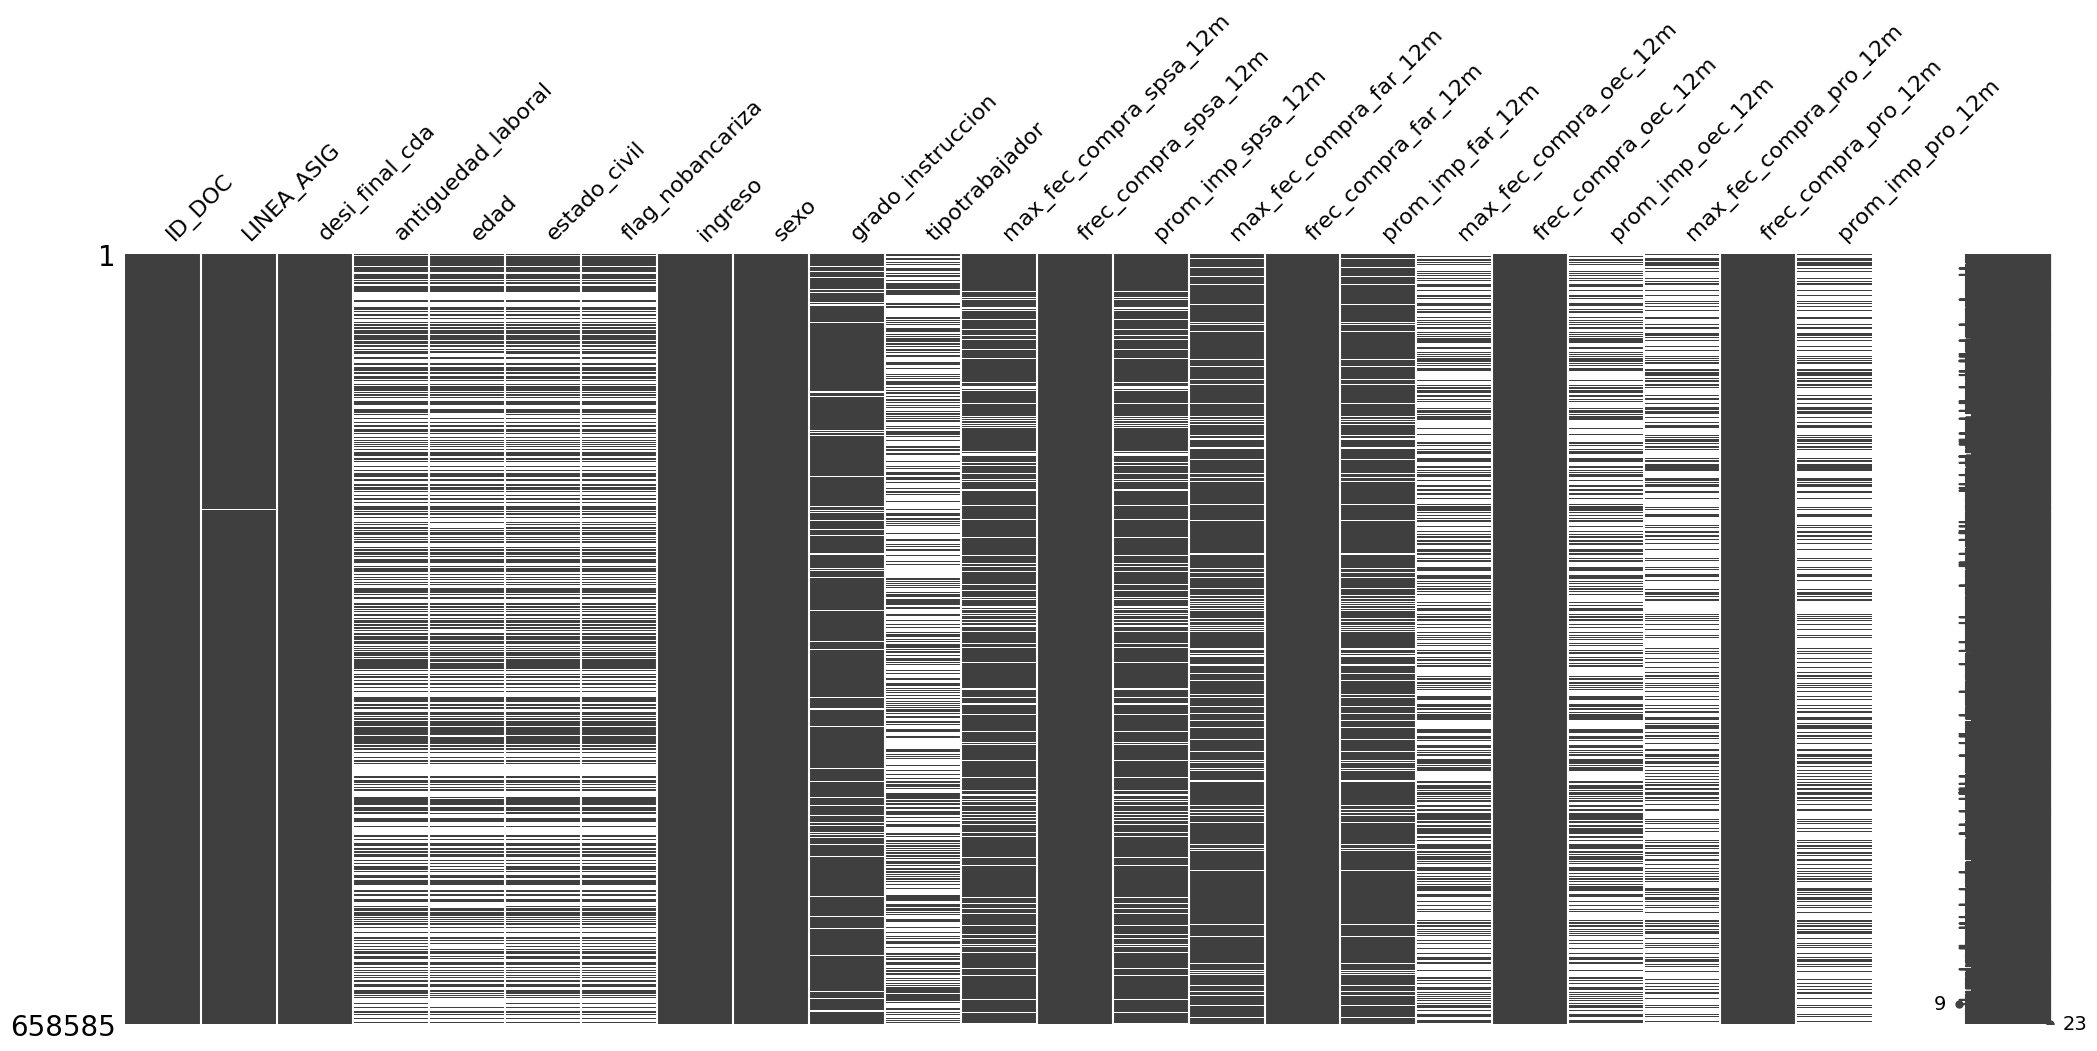

In [ ]:
#GRAFICA DE VISUALIZACION DE NULOS
msno.matrix(data_transacional)

In [ ]:
data_transacional['edad'].unique()

array([53., nan, 35., 26., 31., 37., 44., 41., 65., 50., 38., 22., 29.,
       25., 42., 62., 48., 34., 30., 80., 32., 43., 27., 39., 49., 28.,
       45., 54., 47., 40., 68., 24., 36., 52., 23., 87., 21., 60., 33.,
       51., 46., 59., 69., 66., 70., 61., 63., 67., 57., 55., 58., 71.,
       56., 64., 74., 78., 76., 72., 77., 73., 20., 83., 79., 75., 18.,
       84., 86., 85., 88., 93., 81., 94., 82., 19., 95., 17., 89.,  4.,
       92.,  1.,  6., 90., 91.,  0.])

In [ ]:
## Eliminaremos todos los registros null en el campo edad
data_transacional = data_transacional.dropna(subset=['edad'])

In [ ]:
# Verifiación de registros null
data_transacional.isnull().sum()

ID_DOC                          0
LINEA_ASIG                     66
desi_final_cda                  0
antiguedad_laboral              0
edad                            0
estado_civil                    0
flag_nobancariza                0
ingreso                        56
sexo                            0
grado_instruccion           26481
tipotrabajador             183920
max_fec_compra_spsa_12m     36229
frec_compra_spsa_12m            0
prom_imp_spsa_12m           36229
max_fec_compra_far_12m      42259
frec_compra_far_12m             0
prom_imp_far_12m            42259
max_fec_compra_oec_12m     184382
frec_compra_oec_12m             0
prom_imp_oec_12m           184382
max_fec_compra_pro_12m     209846
frec_compra_pro_12m             0
prom_imp_pro_12m           209846
dtype: int64

<Axes: >

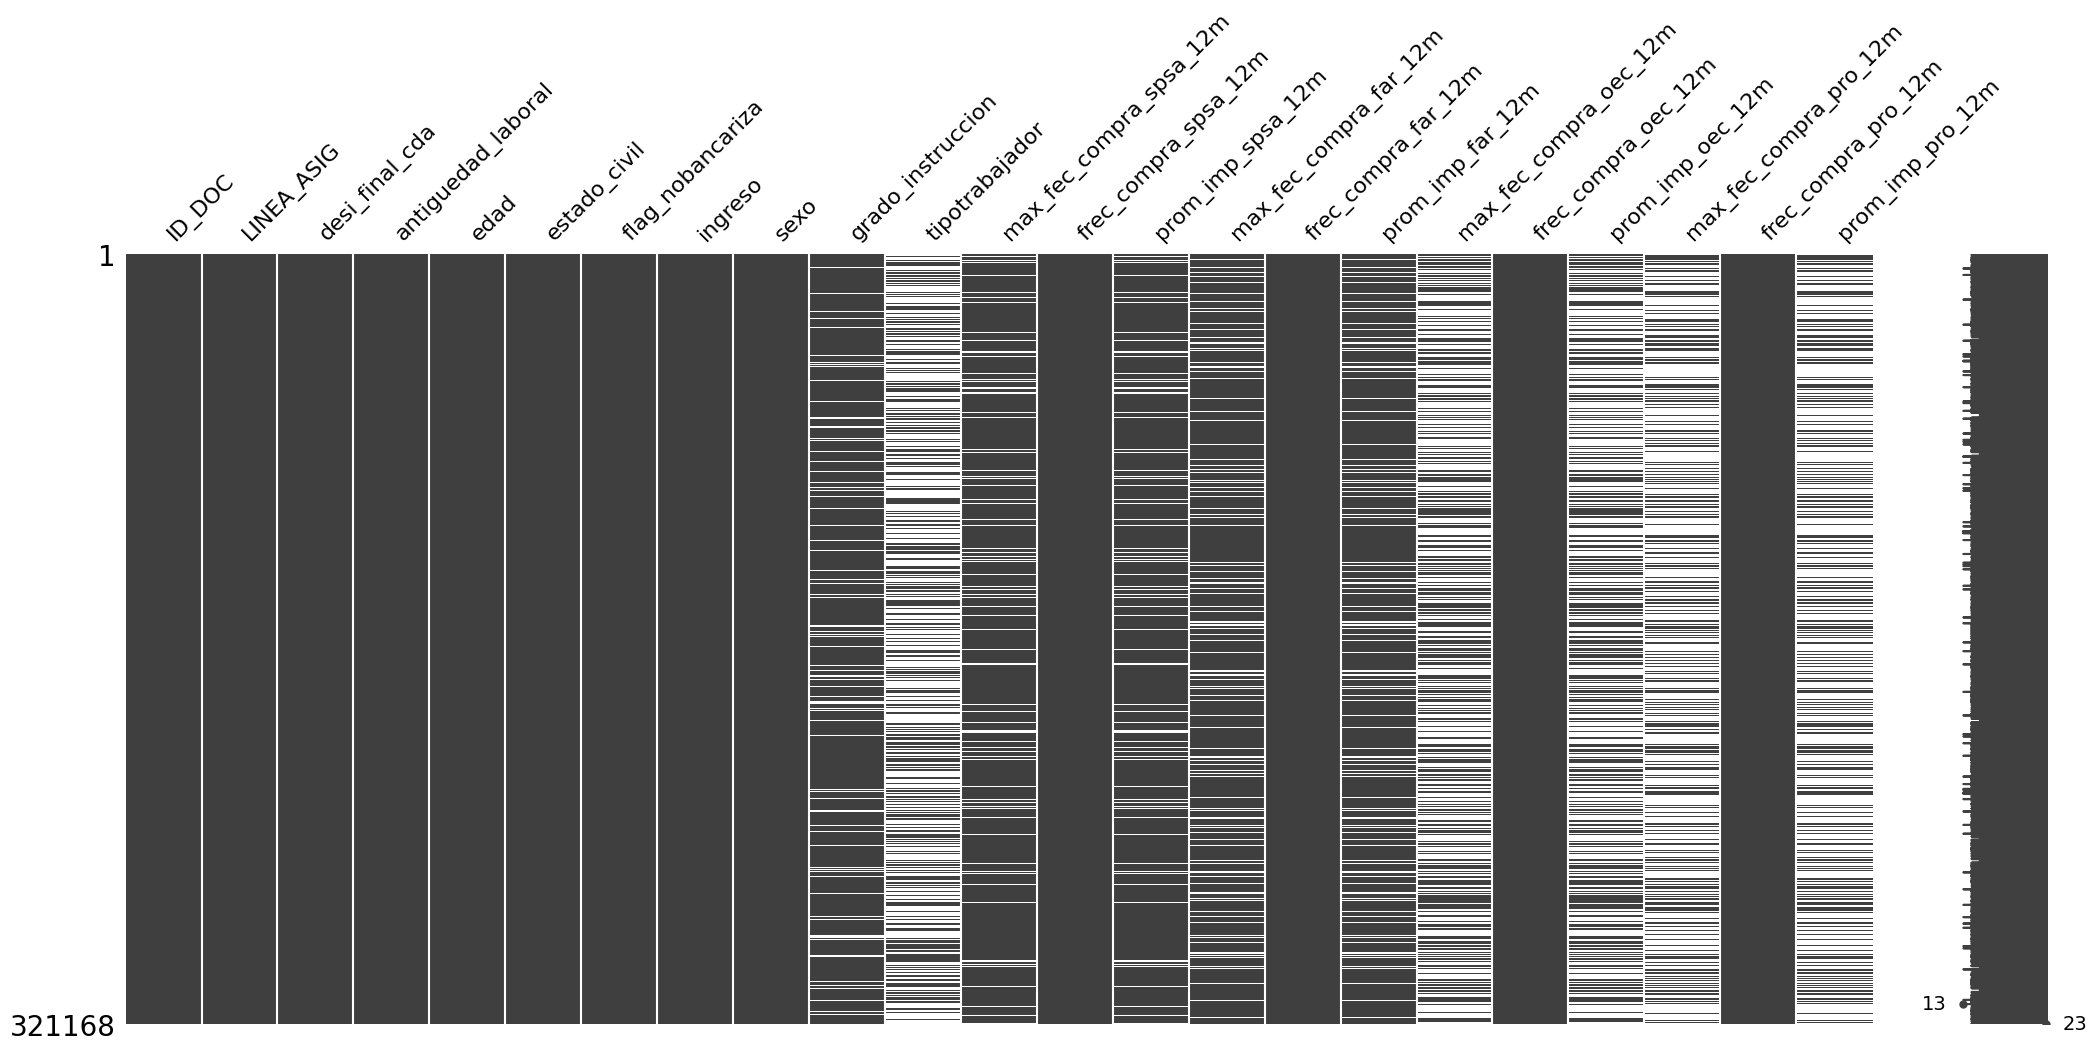

In [ ]:
msno.matrix(data_transacional)

In [ ]:
#### INICIO de la Limpieza de la variable tipotrabajador

In [ ]:
data_transacional.groupby('tipotrabajador')['tipotrabajador'].count()

tipotrabajador
ARTISTA - LEY DEL ARTISTA - LEY 28131                9
CONSTRUCCION CIVIL                                1553
EJECUTIVO                                         3363
EMPLEADO                                         81693
EMPLEADO DE CONFIANZA                             1364
FUNCIONARIO PUBLICO                               1573
GERENTES PUBLICOS                                    4
MARITIMO, FLUVIAL O LACUSTRE                        24
MIEMBROS DE OTROS REGIMENES ESPECIALES             881
MINERO DE INDUSTRIA MINERA METALURGICA             528
MINERO DE MINA DE SOCAVON                         1016
MINERO DE TAJO ABIERTO                             755
OBRERO                                            8629
PENSIONISTA                                          3
PENSIONISTA - LEY 28320                              1
PENSIONISTA O CESANTE                             8128
PERIODISTA                                           4
PESCADOR Y PROCESADOR ARTESANAL INDEPENDIENTE     

In [ ]:
# Verificamos la categoria más común deltipotrabajador
data_transacional['tipotrabajador'].mode()[0]

'EMPLEADO'

In [ ]:
## Procedemos a reemplazar los valores NaN con la categoria mas común que es 'EMPLEADO' de la variable tipotrabajador
data_transacional['tipotrabajador'] = data_transacional['tipotrabajador'].fillna(data_transacional['tipotrabajador'].mode()[0])

In [ ]:
##### FIN Limpieza de la Variable tipotrabajador #######

In [ ]:
##### INICIO de la Limpieza de la Variable grado_instruccion #######

In [ ]:
data_transacional['grado_instruccion'].unique()

array(['TECNICA COMPLETA', 'SECUNDARIA COMPLETA', 'SECUNDARIA INCOMPLETA',
       'SUPERIOR COMPLETA', 'PRIMARIA COMPLETA', nan,
       'PRIMARIA INCOMPLETA', 'SUPERIOR INCOMPLETA', 'TECNICA INCOMPLETA',
       'ILETRADO', 'EDUCACION ESPECIAL'], dtype=object)

In [ ]:
# Verificamos la categoria mas comun de la variable grado_instruccion
data_transacional['grado_instruccion'].mode()[0]

'SECUNDARIA COMPLETA'

In [ ]:
## Procedemos a reemplazar los valores NaN con la categoria mas común que es 'SECUNDARIA COMPLETA' de la variable grado_instruccion
data_transacional['grado_instruccion'] = data_transacional['grado_instruccion'].fillna(data_transacional['grado_instruccion'].mode()[0])

In [ ]:
##### FIN Limpieza de la Variable grado_instruccion #######

In [ ]:
##### INICIO de la Limpieza de la Variable max_fec_compra_spsa_12m #######

In [ ]:
### Verificación  de los valores
data_transacional['max_fec_compra_spsa_12m'].unique()

array(['2023-08-31', '2023-07-15', '2023-07-24', nan, '2023-10-29',
       '2023-07-20', '2023-08-06', '2023-12-21', '2023-04-07',
       '2023-05-31', '2023-02-13', '2023-07-21', '2023-08-14',
       '2023-01-09', '2023-01-29', '2023-09-29', '2023-02-24',
       '2023-02-23', '2023-11-13', '2022-12-03', '2023-12-07',
       '2023-03-25', '2023-11-30', '2023-01-20', '2023-09-16',
       '2023-08-13', '2023-06-17', '2023-10-24', '2023-11-14',
       '2023-09-21', '2022-12-09', '2023-11-25', '2023-12-23',
       '2022-08-08', '2023-02-28', '2023-03-26', '2023-11-03',
       '2023-03-30', '2023-02-11', '2023-09-22', '2022-12-01',
       '2023-07-27', '2023-09-24', '2023-04-12', '2022-12-20',
       '2023-03-24', '2023-01-14', '2023-04-09', '2023-11-29',
       '2023-04-20', '2023-05-29', '2023-05-06', '2023-09-25',
       '2023-08-15', '2023-11-24', '2023-10-27', '2023-04-10',
       '2023-06-14', '2023-04-15', '2022-09-15', '2023-05-21',
       '2023-06-12', '2023-03-11', '2022-10-12', '

In [ ]:
### Procedemos a transformar la variable max_fec_compra_spsa_12m a tipo de dato datetime
data_transacional['max_fec_compra_spsa_12m'] = pd.to_datetime(data_transacional['max_fec_compra_spsa_12m'])

In [ ]:
### Verificamos la mediana de la variable max_fec_compra_spsa_12m
data_transacional['max_fec_compra_spsa_12m'].median()

Timestamp('2023-05-12 00:00:00')

In [ ]:
### reemplazamos con la mediana a la columna max_fec_compra_spsa_12m con el valor de 2023-05-12
data_transacional['max_fec_compra_spsa_12m'].fillna(data_transacional['max_fec_compra_spsa_12m'].median(), inplace=True)

In [ ]:
##### FIN Limpieza de la Variable max_fec_compra_spsa_12m #######

In [ ]:
##### INICIO de la Limpieza de la Variable max_fec_compra_oec_12m #######

In [ ]:
### Verificación  de los valores
data_transacional['max_fec_compra_oec_12m'].unique()

array([nan, '2023-07-17', '2023-07-21', '2022-07-31', '2023-04-18',
       '2022-07-29', '2023-06-19', '2022-11-25', '2023-11-23',
       '2023-06-22', '2022-11-20', '2023-09-30', '2022-04-30',
       '2023-09-18', '2023-08-13', '2023-07-30', '2023-11-20',
       '2023-08-11', '2023-01-22', '2023-03-06', '2023-02-09',
       '2023-02-24', '2023-11-03', '2023-01-20', '2023-09-19',
       '2023-04-19', '2022-10-14', '2023-02-11', '2022-07-11',
       '2023-02-19', '2023-07-16', '2023-04-09', '2023-11-01',
       '2023-05-12', '2023-04-02', '2022-10-26', '2022-09-11',
       '2023-07-18', '2023-12-11', '2023-04-28', '2023-04-15',
       '2023-07-28', '2023-03-10', '2023-08-02', '2022-12-23',
       '2023-02-17', '2022-07-13', '2023-07-22', '2022-10-01',
       '2022-12-21', '2023-07-03', '2023-06-28', '2023-03-07',
       '2023-10-21', '2022-08-05', '2023-02-14', '2023-04-25',
       '2022-12-02', '2023-06-10', '2023-06-13', '2023-09-29',
       '2023-03-16', '2022-09-15', '2023-01-18', '

In [ ]:
### Procedemos a transformar la variable max_fec_compra_spsa_12m a tipo de dato datetime
data_transacional['max_fec_compra_oec_12m'] = pd.to_datetime(data_transacional['max_fec_compra_oec_12m'])

In [ ]:
 ### Verificamos la mediana de la variable max_fec_compra_spsa_12m
 data_transacional['max_fec_compra_oec_12m'].mode()[0]

Timestamp('2022-12-23 00:00:00')

In [ ]:
### Verificamos la mediana de la variable max_fec_compra_spsa_12m
#data_transacional['max_fec_compra_oec_12m'].median()

In [ ]:
### reemplazamos con la moda a la columna max_fec_compra_oec_12m con el valor de 2023-04-01
data_transacional['max_fec_compra_oec_12m'].fillna(data_transacional['max_fec_compra_oec_12m'].mode()[0], inplace=True)

In [ ]:
### reemplazamos con la mediana a la columna max_fec_compra_oec_12m con el valor de 2023-04-01
#data_transacional['max_fec_compra_oec_12m'].fillna(data_transacional['max_fec_compra_oec_12m'].median(), inplace=True)

In [ ]:
##### FIN Limpieza de la Variable max_fec_compra_oec_12m #######

In [ ]:
##### INICIO de la Limpieza de la Variable max_fec_compra_pro_12m #######

In [ ]:
### Verificación  de los valores
data_transacional['max_fec_compra_pro_12m'].unique()

array(['2023-08-31', nan, '2023-10-20', '2023-12-07', '2023-05-19',
       '2023-07-08', '2023-01-09', '2023-03-11', '2023-12-23',
       '2023-03-03', '2023-06-21', '2023-08-13', '2023-03-17',
       '2023-09-21', '2022-11-17', '2022-09-03', '2022-08-27',
       '2023-01-17', '2022-03-23', '2023-04-24', '2023-03-09',
       '2023-03-14', '2023-03-04', '2022-08-30', '2022-06-09',
       '2023-06-06', '2023-06-29', '2023-07-16', '2022-08-23',
       '2023-07-18', '2023-04-16', '2023-04-30', '2023-08-06',
       '2022-11-25', '2022-11-26', '2022-12-08', '2023-10-28',
       '2023-08-20', '2023-07-03', '2023-01-23', '2023-06-14',
       '2023-06-07', '2022-09-29', '2023-12-17', '2023-09-28',
       '2023-04-26', '2023-08-21', '2022-09-25', '2023-10-10',
       '2023-06-04', '2022-12-26', '2023-01-14', '2022-11-28',
       '2023-11-26', '2023-07-23', '2023-02-10', '2022-12-16',
       '2023-10-22', '2023-05-22', '2023-06-24', '2023-04-11',
       '2023-09-23', '2022-08-20', '2023-09-30', '

In [ ]:
### Procedemos a transformar la variable max_fec_compra_spsa_12m a tipo de dato datetime
data_transacional['max_fec_compra_pro_12m'] = pd.to_datetime(data_transacional['max_fec_compra_pro_12m'])

In [ ]:
# Interpolar los valores faltantes en la columna
data_transacional['max_fec_compra_pro_12m'] = data_transacional['max_fec_compra_pro_12m'].interpolate()

In [ ]:
#sns.catplot(x ='max_fec_compra_pro_12m', kind='count', data=data_transacional,aspect=4)

In [ ]:
 ### Verificamos la mediana de la variable max_fec_compra_spsa_12m
 #data_transacional['max_fec_compra_pro_12m'].mode()[0]

In [ ]:
### Verificamos la mediana de la variable max_fec_compra_pro_12m
#data_transacional['max_fec_compra_pro_12m'].median()

In [ ]:
### reemplazamos con la mediana a la columna max_fec_compra_pro_12m con el valor de 2023-03-22
#data_transacional['max_fec_compra_pro_12m'].fillna(data_transacional['max_fec_compra_pro_12m'].median(), inplace=True)

In [ ]:
##### FIN Limpieza de la Variable max_fec_compra_pro_12m #######

In [ ]:
##### INICIO de la Limpieza de la Variable prom_imp_pro_12m #######

In [ ]:
data_transacional['prom_imp_pro_12m'].unique()

array([352.05      ,          nan, 259.9       , ..., 148.53555556,
        29.458     , 160.912     ])

In [ ]:
### Verificamos la media de la variable
media = data_transacional['prom_imp_pro_12m'].mean()
print(media)

283.3545158066318


In [ ]:
### Remplazamos los valores NaN con la media 262.45626414651537
data_transacional['prom_imp_pro_12m'] = data_transacional['prom_imp_pro_12m'].fillna(media)

In [ ]:
##### FIN Limpieza de la Variable max_compra_pro_12m #######

In [ ]:
##### INICIO de la Limpieza de la Variable max_compra_oec_12m #######

In [ ]:
data_transacional['prom_imp_pro_12m'].unique()

array([352.05      , 283.35451581, 259.9       , ..., 148.53555556,
        29.458     , 160.912     ])

In [ ]:
### Verificamos la media de la variable
media = data_transacional['prom_imp_oec_12m'].mean()
print(media)

358.6497469910657


In [ ]:
### Remplazamos los valores NaN con la media 357.3047146961781
data_transacional['prom_imp_oec_12m'] = data_transacional['prom_imp_oec_12m'].fillna(media)

In [ ]:
##### FIN Limpieza de la Variable prom_imp_oec_12m #######

In [ ]:
### Procedemos a eliminar los registros faltantes


In [ ]:
data_transacional.isnull().sum()

ID_DOC                         0
LINEA_ASIG                    66
desi_final_cda                 0
antiguedad_laboral             0
edad                           0
estado_civil                   0
flag_nobancariza               0
ingreso                       56
sexo                           0
grado_instruccion              0
tipotrabajador                 0
max_fec_compra_spsa_12m        0
frec_compra_spsa_12m           0
prom_imp_spsa_12m          36229
max_fec_compra_far_12m     42259
frec_compra_far_12m            0
prom_imp_far_12m           42259
max_fec_compra_oec_12m         0
frec_compra_oec_12m            0
prom_imp_oec_12m               0
max_fec_compra_pro_12m         0
frec_compra_pro_12m            0
prom_imp_pro_12m               0
dtype: int64

In [ ]:
# Reamplazamos los valores unicos
data_transacional = data_transacional.replace(" ", np.nan)
# Eliminamos los valores nulos
data_transacional = data_transacional.dropna()

In [ ]:
data_transacional.isnull().sum()

ID_DOC                     0
LINEA_ASIG                 0
desi_final_cda             0
antiguedad_laboral         0
edad                       0
estado_civil               0
flag_nobancariza           0
ingreso                    0
sexo                       0
grado_instruccion          0
tipotrabajador             0
max_fec_compra_spsa_12m    0
frec_compra_spsa_12m       0
prom_imp_spsa_12m          0
max_fec_compra_far_12m     0
frec_compra_far_12m        0
prom_imp_far_12m           0
max_fec_compra_oec_12m     0
frec_compra_oec_12m        0
prom_imp_oec_12m           0
max_fec_compra_pro_12m     0
frec_compra_pro_12m        0
prom_imp_pro_12m           0
dtype: int64

<Axes: >

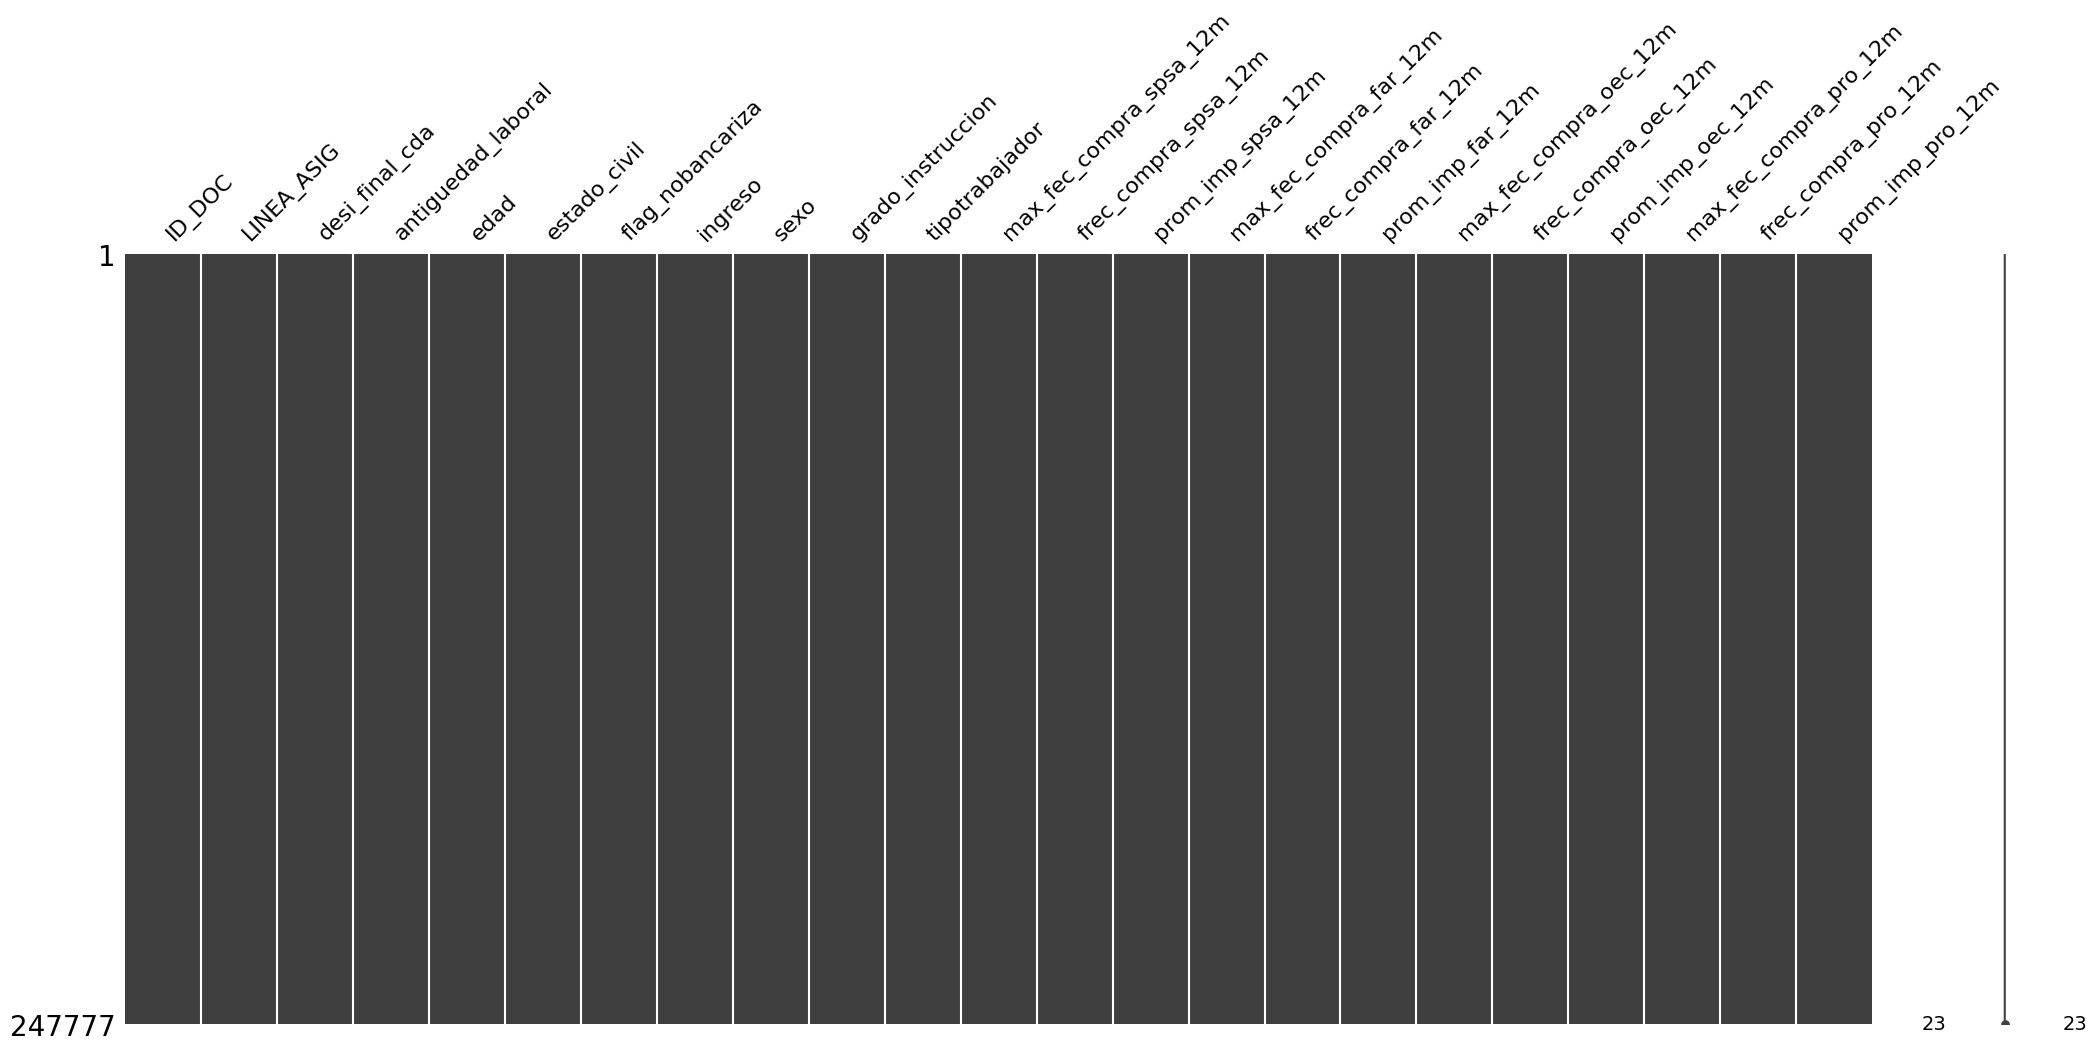

In [ ]:
msno.matrix(data_transacional)

## Transformación de tipos de datos

In [ ]:
data_transacional.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247777 entries, 0 to 674435
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ID_DOC                   247777 non-null  object        
 1   LINEA_ASIG               247777 non-null  float64       
 2   desi_final_cda           247777 non-null  object        
 3   antiguedad_laboral       247777 non-null  float64       
 4   edad                     247777 non-null  float64       
 5   estado_civil             247777 non-null  object        
 6   flag_nobancariza         247777 non-null  float64       
 7   ingreso                  247777 non-null  float64       
 8   sexo                     247777 non-null  object        
 9   grado_instruccion        247777 non-null  object        
 10  tipotrabajador           247777 non-null  object        
 11  max_fec_compra_spsa_12m  247777 non-null  datetime64[ns]
 12  frec_compra_spsa_12m 

In [ ]:
### Cambiando el tipo de datos de las variables
data_transacional['antiguedad_laboral'] =  data_transacional['antiguedad_laboral'].astype('int')
data_transacional['edad'] =  data_transacional['edad'].astype('int')
data_transacional['ingreso'] =  data_transacional['ingreso'].astype('int')
data_transacional['LINEA_ASIG'] =  data_transacional['LINEA_ASIG'].astype('int')
data_transacional['flag_nobancariza'] =  data_transacional['flag_nobancariza'].astype('object')
data_transacional['max_fec_compra_far_12m'] = pd.to_datetime(data_transacional['max_fec_compra_far_12m'])

In [ ]:
### Eliminacion de la columna frec_compra_mkr_12m
#data_transacional = data_transacional.drop(['frec_compra_mkr_12m'], axis=1)

In [ ]:
### Cambiando el tipo de dato sexo por Imputación KNN
from sklearn.impute import KNNImputer
mapping =  {'M':1, 'F':2, 'X':3}
data_transacional["sexo"] = data_transacional["sexo"].map(mapping)
data_transacional["sexo"].unique()

imputer = KNNImputer(n_neighbors=2)
df_imputed = data_transacional.copy()
# Reemplazar los valores 3 por NaN temporalmente
df_imputed.loc[df_imputed['sexo'] == 3, 'sexo'] = np.nan
# Imputación KNN
df_imputed[['sexo']] = imputer.fit_transform(df_imputed[['sexo']])
df_imputed['sexo'] = df_imputed['sexo'].round().astype(int)
#df_imputed.loc[~df_imputed['sexo'].isin([1, 2]), 'sexo'] = 1  # O forzar a 2 si se prefiere
data_transacional['sexo'] = df_imputed['sexo']

data_transacional["sexo"].unique()
data_transacional['sexo'].value_counts()

sexo
2    143393
1    104384
Name: count, dtype: int64

<ipython-input-92-40a1d532b02f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexo', data=data_transacional, palette=[light_blue_color, light_pink_color], ax=axes[1])


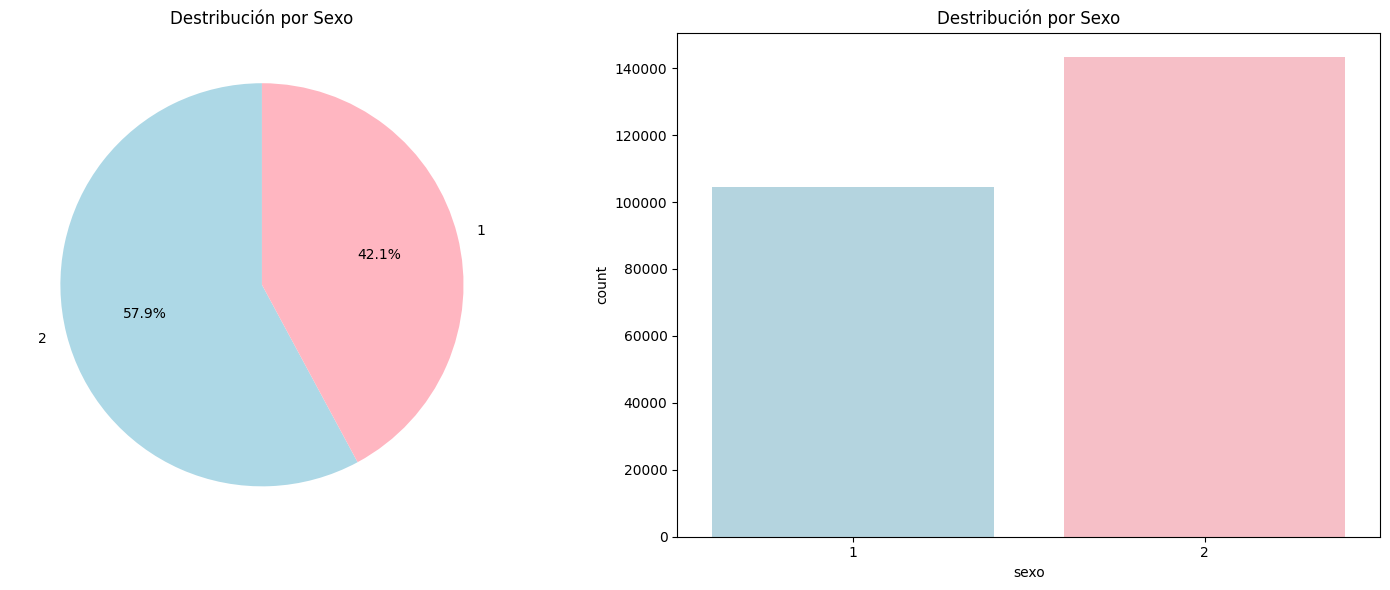

In [ ]:
# Grafico por Sexo
import matplotlib.pyplot as plt
import seaborn as sns

# Colores
light_blue_color = '#ADD8E6'
light_pink_color = '#FFB6C1'
light_green_color = '#BDFCC9'
light_purple_color = '#DAC4F7'
# Paleta de coolores
palette = [light_blue_color, light_pink_color, light_green_color, light_purple_color]

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
status_counts = data_transacional['sexo'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=[light_blue_color, light_pink_color])
axes[0].set_title('Destribución por Sexo')
sns.countplot(x='sexo', data=data_transacional, palette=[light_blue_color, light_pink_color], ax=axes[1])
axes[1].set_title('Destribución por Sexo')

plt.tight_layout()
plt.show()

In [ ]:
data_transacional.head()

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,prom_imp_spsa_12m,max_fec_compra_far_12m,frec_compra_far_12m,prom_imp_far_12m,max_fec_compra_oec_12m,frec_compra_oec_12m,prom_imp_oec_12m,max_fec_compra_pro_12m,frec_compra_pro_12m,prom_imp_pro_12m
0,18152446172043173005,3000,Aprobar,85,53,Soltero,0.0,5500,1,TECNICA COMPLETA,...,116.145000,2023-04-03,1,18.450000,2022-12-23,0,358.649747,2023-08-31,1,352.050000
2,18323415895941564328,1200,Rechazar,285,35,Casado,0.0,1500,1,SECUNDARIA COMPLETA,...,61.178000,2023-06-29,1,50.000000,2023-07-17,2,559.375000,2023-09-10,0,283.354516
4,19149422554396897414,1650,Aprobar,49,26,Casado,0.0,1900,1,SECUNDARIA COMPLETA,...,50.670000,2023-10-26,12,187.211667,2022-12-23,0,358.649747,2023-09-20,0,283.354516
9,18323415895941564328,2600,Aprobar,6,35,Casado,0.0,1500,1,SECUNDARIA COMPLETA,...,61.178000,2023-06-29,1,50.000000,2023-07-17,2,559.375000,2023-10-10,0,283.354516
10,18354632564055972020,1200,Aprobar,45,37,Soltero,0.0,500,1,SECUNDARIA COMPLETA,...,117.103333,2023-09-25,5,81.620000,2022-12-23,0,358.649747,2023-10-20,1,259.900000


## Segmentación de la data de flag_nobancariza

In [ ]:
# Creación del dataframe de los registros no bancarizados para las prubas
data_transacional_no_bancarizado = data_transacional[data_transacional['flag_nobancariza']==1]

In [ ]:
data_transacional_no_bancarizado.shape

(21049, 23)

In [ ]:
# Creación del dataframe de los registros bancarizados para la realización del estudio
data_transacional = data_transacional[data_transacional['flag_nobancariza']==0]

In [ ]:
data_transacional.shape

(226728, 23)

## Analisis Descriptivo

### Análisis Univariado

In [ ]:
data_transacional.describe(include=['O'])

,ID_DOC,desi_final_cda,estado_civil,flag_nobancariza,grado_instruccion,tipotrabajador
count,226728,226728,226728,226728.0,226728,226728
unique,199649,2,6,1.0,10,27
top,18152446594257300112,Aprobar,Soltero,0.0,SECUNDARIA COMPLETA,EMPLEADO
freq,17,179851,188264,226728.0,122756,184820


In [ ]:
data_transacional.columns

Index(['ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'antiguedad_laboral', 'edad',
       'estado_civil', 'flag_nobancariza', 'ingreso', 'sexo',
       'grado_instruccion', 'tipotrabajador', 'max_fec_compra_spsa_12m',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'max_fec_compra_far_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'max_fec_compra_oec_12m',
       'frec_compra_oec_12m', 'prom_imp_oec_12m', 'max_fec_compra_pro_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m'],
      dtype='object')

    Variables cualitativas

In [ ]:
print("desi_final_cda: ", data_transacional['desi_final_cda'].unique(), '\n')
print("estado_civil: ",data_transacional['estado_civil'].unique(), '\n')
print("sexo: ",data_transacional['sexo'].unique(), '\n')
print("grado_instruccion: ",data_transacional['grado_instruccion'].unique(), '\n')
print("tipotrabajador: ",data_transacional['tipotrabajador'].unique(), '\n')

desi_final_cda:  ['Aprobar' 'Rechazar'] 

estado_civil:  ['Soltero' 'Casado' 'Divorciado' 'Viudo' 'Conviviendo' 'Conviviente'] 

sexo:  [1 2] 

grado_instruccion:  ['TECNICA COMPLETA' 'SECUNDARIA COMPLETA' 'SECUNDARIA INCOMPLETA'
 'SUPERIOR COMPLETA' 'PRIMARIA COMPLETA' 'PRIMARIA INCOMPLETA'
 'SUPERIOR INCOMPLETA' 'TECNICA INCOMPLETA' 'ILETRADO'
 'EDUCACION ESPECIAL'] 

tipotrabajador:  ['EMPLEADO' 'OBRERO' 'EMPLEADO DE CONFIANZA' 'PENSIONISTA O CESANTE'
 'REG. ESPECIAL D. LEG.1057' 'SERVIDOR PUBLICO - ESPECIALISTA' 'EJECUTIVO'
 'PROFESOR ESTATAL' 'SERVIDOR PUBLICO - DE APOYO' 'FUNCIONARIO PUBLICO'
 'MIEMBROS DE OTROS REGIMENES ESPECIALES' 'CONSTRUCCION CIVIL'
 'MINERO DE TAJO ABIERTO' 'TRABAJADOR DEL HOGAR'
 'PILOTO Y COPILOTO DE AVIA. COM.' 'SERVIDOR PUBLICO - EJECUTIVO'
 'MINERO DE MINA DE SOCAVON' 'SERVIDOR PUBLICO - DIRECTIVO SUPERIOR'
 'MINERO DE INDUSTRIA MINERA METALURGICA' 'TRABAJADOR PORTUARIO'
 'PESCADOR Y PROCESADOR ARTESANAL INDEPENDIENTE' 'PERIODISTA'
 'MARITIMO, FLUVIAL 

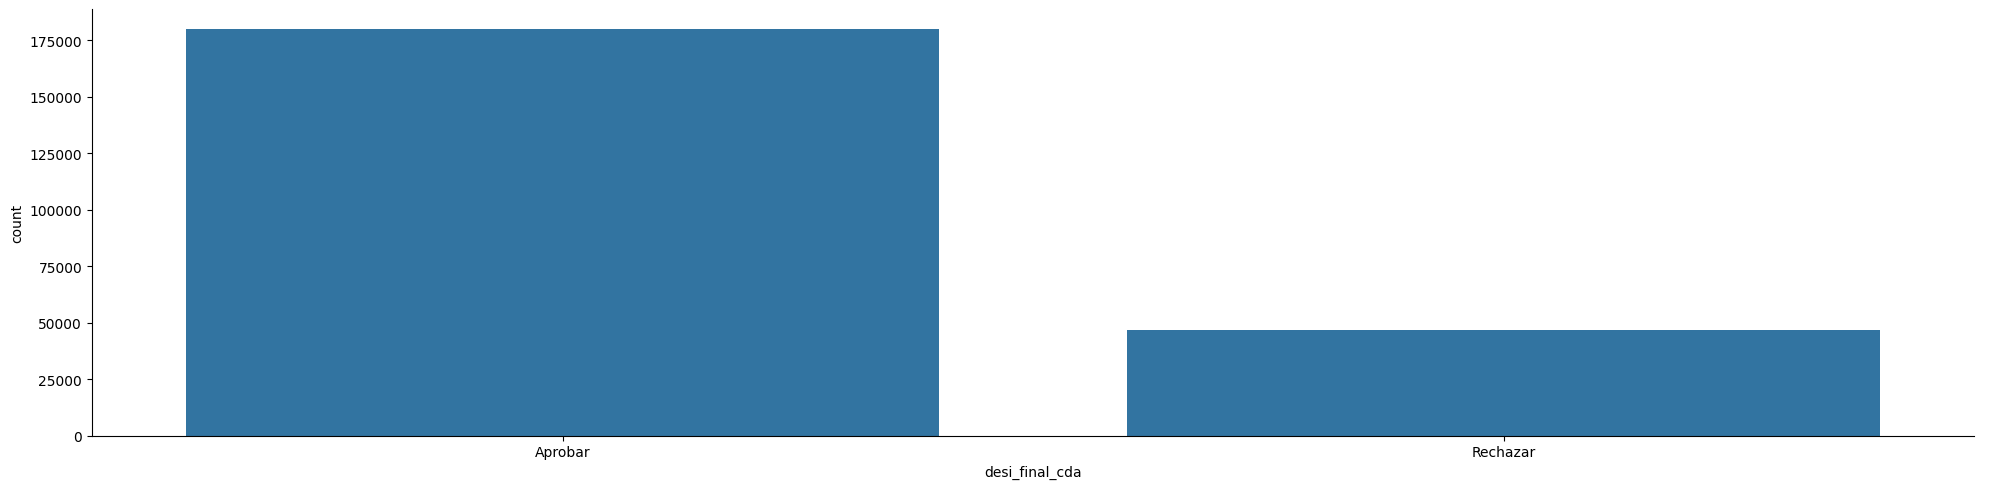

In [ ]:
sns.catplot(x ='desi_final_cda', kind='count', data=data_transacional,aspect=4)

    Variables Cuantitativas



In [ ]:
data_transacional.describe()

,LINEA_ASIG,antiguedad_laboral,edad,ingreso,sexo,max_fec_compra_spsa_12m,frec_compra_spsa_12m,prom_imp_spsa_12m,max_fec_compra_far_12m,frec_compra_far_12m,prom_imp_far_12m,max_fec_compra_oec_12m,frec_compra_oec_12m,prom_imp_oec_12m,max_fec_compra_pro_12m,frec_compra_pro_12m,prom_imp_pro_12m
count,226728.000000,226728.000000,226728.000000,2.267280e+05,226728.000000,226728,226728.000000,226728.000000,226728,226728.000000,226728.000000,226728,226728.000000,226728.000000,226728,226728.000000,226728.000000
mean,1830.267567,100.985533,40.266478,2.984215e+03,1.577794,2023-05-22 13:26:43.556685056,5.078985,238.602266,2023-05-16 03:39:22.654810880,6.570684,97.911153,2023-02-06 22:00:59.447443200,0.954483,353.280604,2023-03-22 07:39:15.300279552,0.910796,280.918730
min,0.000000,-86139.000000,1.000000,0.000000e+00,1.000000,2022-02-01 00:00:00,0.000000,-2840.490000,2022-02-01 00:00:00,0.000000,-63.050000,2022-02-01 00:00:00,0.000000,-5499.000000,2022-02-01 00:00:00,0.000000,-3028.000000
25%,1200.000000,35.000000,30.000000,1.500000e+03,1.000000,2023-02-23 00:00:00,2.000000,66.014688,2023-02-19 00:00:00,3.000000,34.110937,2022-12-23 00:00:00,0.000000,180.350000,2023-01-07 12:00:00,0.000000,223.161500
50%,1300.000000,65.000000,38.000000,1.500000e+03,2.000000,2023-05-18 00:00:00,4.000000,134.900000,2023-05-11 00:00:00,7.000000,65.828661,2022-12-23 00:00:00,0.000000,358.649747,2023-03-23 00:00:00,0.000000,283.354516
75%,2200.000000,125.000000,49.000000,3.000000e+03,2.000000,2023-08-29 00:00:00,8.000000,268.545714,2023-08-23 00:00:00,10.000000,120.254792,2023-03-11 00:00:00,1.000000,358.649747,2023-06-13 08:00:00,1.000000,283.354516
max,30000.000000,24279.000000,93.000000,2.055396e+07,2.000000,2023-12-31 00:00:00,12.000000,86363.270833,2023-12-31 00:00:00,12.000000,11331.197500,2023-12-31 00:00:00,12.000000,132318.500000,2023-12-31 00:00:00,12.000000,23268.273333
std,2201.365803,420.256738,13.049136,1.006774e+05,0.493912,NaN,3.409183,656.046705,NaN,3.596619,125.009260,NaN,1.486755,765.955361,NaN,1.635195,299.500263


array([[<Axes: title={'center': 'LINEA_ASIG'}>,
        <Axes: title={'center': 'antiguedad_laboral'}>,
        <Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'ingreso'}>],
       [<Axes: title={'center': 'sexo'}>,
        <Axes: title={'center': 'max_fec_compra_spsa_12m'}>,
        <Axes: title={'center': 'frec_compra_spsa_12m'}>,
        <Axes: title={'center': 'prom_imp_spsa_12m'}>],
       [<Axes: title={'center': 'max_fec_compra_far_12m'}>,
        <Axes: title={'center': 'frec_compra_far_12m'}>,
        <Axes: title={'center': 'prom_imp_far_12m'}>,
        <Axes: title={'center': 'max_fec_compra_oec_12m'}>],
       [<Axes: title={'center': 'frec_compra_oec_12m'}>,
        <Axes: title={'center': 'prom_imp_oec_12m'}>,
        <Axes: title={'center': 'max_fec_compra_pro_12m'}>,
        <Axes: title={'center': 'frec_compra_pro_12m'}>],
       [<Axes: title={'center': 'prom_imp_pro_12m'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

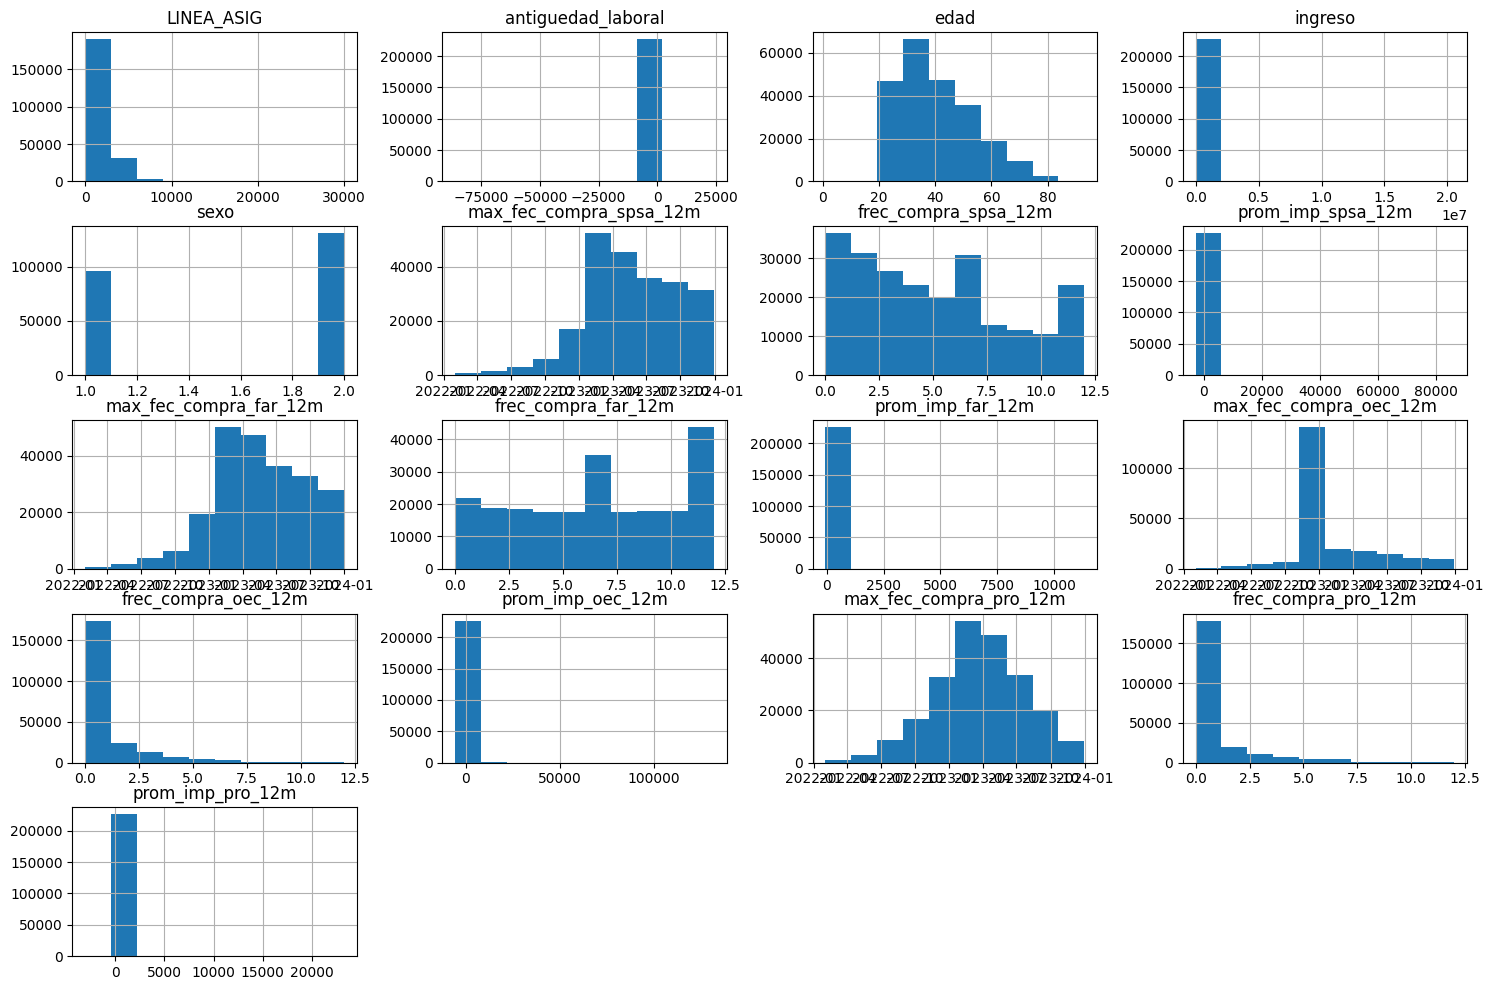

In [ ]:
data_transacional.hist(figsize = (18,12))

In [ ]:
#### INICIO Tratamiento del campo LINEA_ASIG ####

<Axes: xlabel='LINEA_ASIG'>

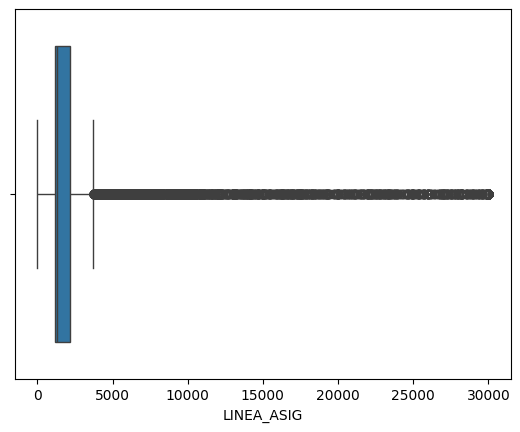

In [ ]:
sns.boxplot(x= 'LINEA_ASIG', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['LINEA_ASIG'].quantile(0.25)
Q3 = data_transacional['LINEA_ASIG'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['LINEA_ASIG'] < lim_inf) | (data_transacional['LINEA_ASIG'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['LINEA_ASIG'] < lim_inf, 'LINEA_ASIG'] = lim_inf
data_transacional.loc[data_transacional['LINEA_ASIG'] > lim_sup, 'LINEA_ASIG'] = lim_sup

<Axes: xlabel='LINEA_ASIG'>

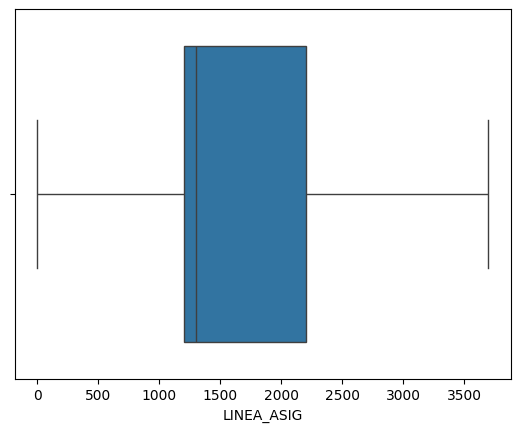

In [ ]:
sns.boxplot(x= 'LINEA_ASIG', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo LINEA_ASIG ####

In [ ]:
#### INICIO Tratamiento del campo antiguedad_laboral ####

<Axes: xlabel='antiguedad_laboral'>

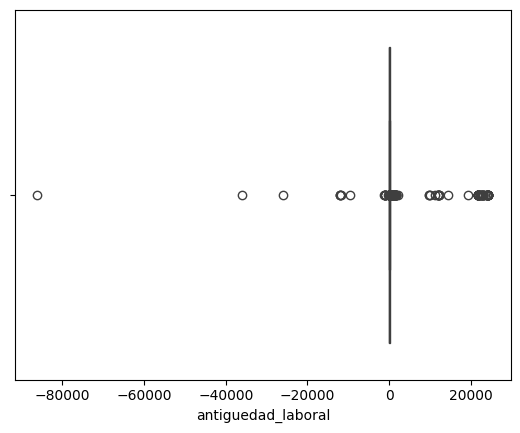

In [ ]:
sns.boxplot(x= 'antiguedad_laboral', data=data_transacional)

In [ ]:
#Procedemos a la eliminación de los registros de antiguedad_laboral menores a
data_transacional = data_transacional.drop(data_transacional[data_transacional['antiguedad_laboral'] < 0 ].index)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['antiguedad_laboral'].quantile(0.25)
Q3 = data_transacional['antiguedad_laboral'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['antiguedad_laboral'] < lim_inf) | (data_transacional['antiguedad_laboral'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['antiguedad_laboral'] < lim_inf, 'antiguedad_laboral'] = lim_inf
data_transacional.loc[data_transacional['antiguedad_laboral'] > lim_sup, 'antiguedad_laboral'] = lim_sup

<Axes: xlabel='antiguedad_laboral'>

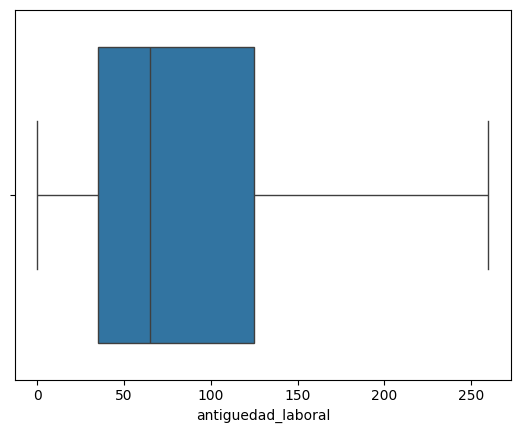

In [ ]:
sns.boxplot(x= 'antiguedad_laboral', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo antiguedad_laboral ####

In [ ]:
#### INICIO Tratamiento del campo edad ####

<Axes: xlabel='edad'>

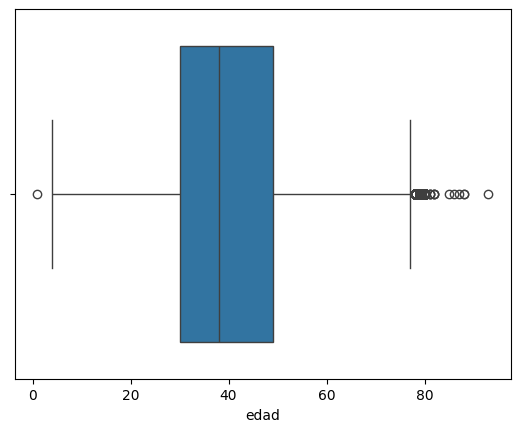

In [ ]:
sns.boxplot(x= 'edad', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['edad'].quantile(0.25)
Q3 = data_transacional['edad'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['edad'] < lim_inf) | (data_transacional['edad'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['edad'] < lim_inf, 'edad'] = lim_inf
data_transacional.loc[data_transacional['edad'] > lim_sup, 'edad'] = lim_sup

<Axes: xlabel='edad'>

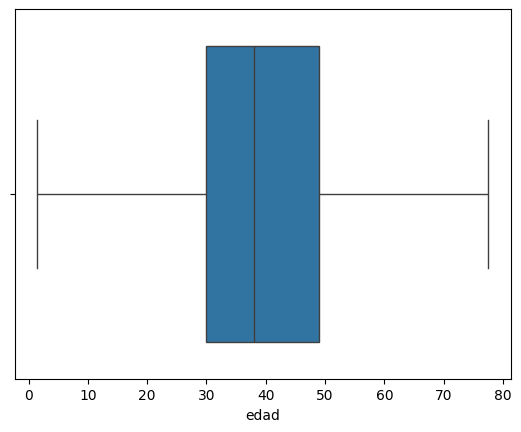

In [ ]:
sns.boxplot(x= 'edad', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo edad ####

In [ ]:
#### INICIO Tratamiento del campo ingreso ####

In [ ]:
data_transacional['ingreso'].unique()

array([    5500,     1500,     1900,      500,     3000,     5000,
           2500,     2000,     3500,    15000,    20000,     2800,
           2200,     1800,     1000,     4500,     1025,     4000,
           6500,     5300,     6000,        0,    10000,     8500,
           1200,     2100,     5100,     2300,     1700,     1460,
           3200,     1850,     1950,     3800,     5600,     4200,
           1400,    30000,     2700,     8000,      200,     7000,
           3300,     1100,     2400,     1300,     1600,     1350,
           9000,     2020,     3100,     2900,     4900,      800,
          25000,      900,    14400,     1250,      650,    28000,
           3700,     4522,     3150,     3600,     3400,     4800,
           1750,     1050,     1520,     4300,     2350,     4521,
           6922,     4700,     2600,     3450,     9500,    13500,
           2850,     4520,      700,     3900,    12000,     4999,
          40000,     1160,     8300,     1993,     1024,     4

In [ ]:
data_transacional['ingreso'] = data_transacional['ingreso'].astype(int)

<Axes: xlabel='ingreso'>

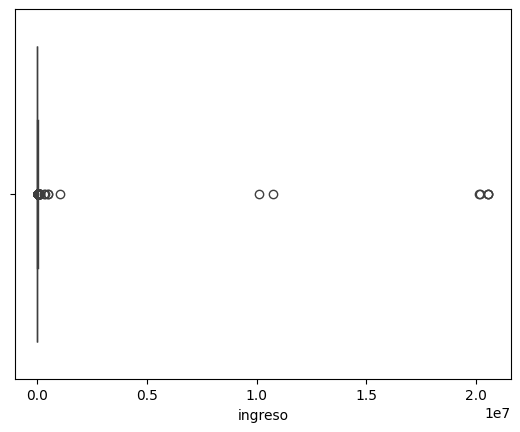

In [ ]:
sns.boxplot(x= 'ingreso', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['ingreso'].quantile(0.25)
Q3 = data_transacional['ingreso'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['ingreso'] < lim_inf) | (data_transacional['ingreso'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['ingreso'] < lim_inf, 'ingreso'] = lim_inf
data_transacional.loc[data_transacional['ingreso'] > lim_sup, 'ingreso'] = lim_sup

<Axes: xlabel='ingreso'>

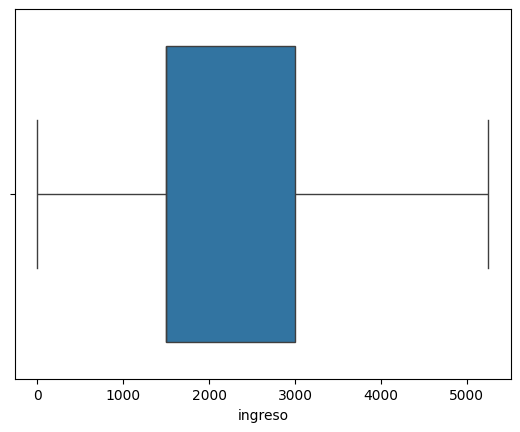

In [ ]:
sns.boxplot(x= 'ingreso', data=data_transacional)

In [ ]:
#data_transacional = data_transacional.reset_index()

In [ ]:
data_transacional.head()

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,prom_imp_spsa_12m,max_fec_compra_far_12m,frec_compra_far_12m,prom_imp_far_12m,max_fec_compra_oec_12m,frec_compra_oec_12m,prom_imp_oec_12m,max_fec_compra_pro_12m,frec_compra_pro_12m,prom_imp_pro_12m
0,18152446172043173005,3000,Aprobar,85,53.0,Soltero,0.0,5250,1,TECNICA COMPLETA,...,116.145000,2023-04-03,1,18.450000,2022-12-23,0,358.649747,2023-08-31,1,352.050000
2,18323415895941564328,1200,Rechazar,260,35.0,Casado,0.0,1500,1,SECUNDARIA COMPLETA,...,61.178000,2023-06-29,1,50.000000,2023-07-17,2,559.375000,2023-09-10,0,283.354516
4,19149422554396897414,1650,Aprobar,49,26.0,Casado,0.0,1900,1,SECUNDARIA COMPLETA,...,50.670000,2023-10-26,12,187.211667,2022-12-23,0,358.649747,2023-09-20,0,283.354516
9,18323415895941564328,2600,Aprobar,6,35.0,Casado,0.0,1500,1,SECUNDARIA COMPLETA,...,61.178000,2023-06-29,1,50.000000,2023-07-17,2,559.375000,2023-10-10,0,283.354516
10,18354632564055972020,1200,Aprobar,45,37.0,Soltero,0.0,500,1,SECUNDARIA COMPLETA,...,117.103333,2023-09-25,5,81.620000,2022-12-23,0,358.649747,2023-10-20,1,259.900000


In [ ]:
#### FIN Tratamiento del campo ingreso ####

In [ ]:
#### INICIO Tratamiento del campo max_fec_compra_spsa_12m ####

<Axes: xlabel='max_fec_compra_spsa_12m'>

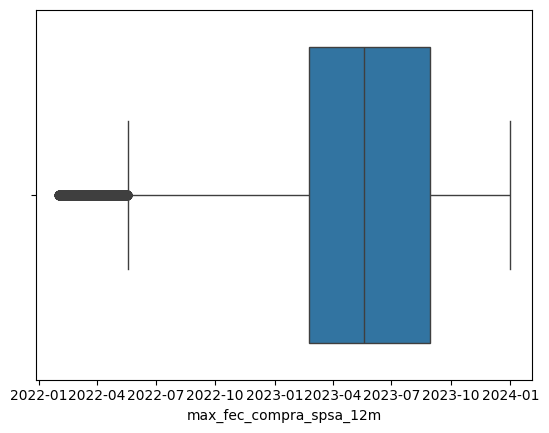

In [ ]:
sns.boxplot(x= 'max_fec_compra_spsa_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['max_fec_compra_spsa_12m'].quantile(0.25)
Q3 = data_transacional['max_fec_compra_spsa_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['max_fec_compra_spsa_12m'] < lim_inf) | (data_transacional['max_fec_compra_spsa_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['max_fec_compra_spsa_12m'] < lim_inf, 'max_fec_compra_spsa_12m'] = lim_inf
data_transacional.loc[data_transacional['max_fec_compra_spsa_12m'] > lim_sup, 'max_fec_compra_spsa_12m'] = lim_sup

<Axes: xlabel='max_fec_compra_spsa_12m'>

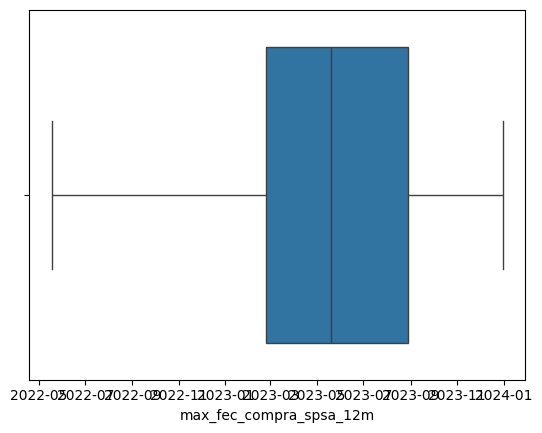

In [ ]:
sns.boxplot(x= 'max_fec_compra_spsa_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo max_fec_compra_spsa_12m ####

In [ ]:
#### INICIO Tratamiento del campo frec_compra_spsa_12m ####

<Axes: xlabel='frec_compra_spsa_12m'>

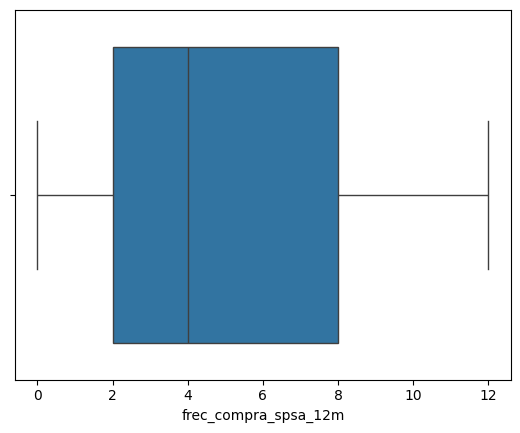

In [ ]:
sns.boxplot(x= 'frec_compra_spsa_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo frec_compra_spsa_12m ####

In [ ]:
#### INICIO Tratamiento del campo max_compra_spsa_12m ####

<Axes: xlabel='prom_imp_spsa_12m'>

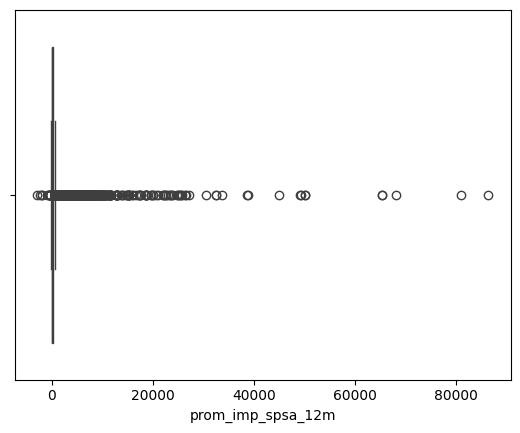

In [ ]:
sns.boxplot(x= 'prom_imp_spsa_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['prom_imp_spsa_12m'].quantile(0.25)
Q3 = data_transacional['prom_imp_spsa_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['prom_imp_spsa_12m'] < lim_inf) | (data_transacional['prom_imp_spsa_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['prom_imp_spsa_12m'] < lim_inf, 'prom_imp_spsa_12m'] = lim_inf
data_transacional.loc[data_transacional['prom_imp_spsa_12m'] > lim_sup, 'prom_imp_spsa_12m'] = lim_sup

<Axes: xlabel='prom_imp_spsa_12m'>

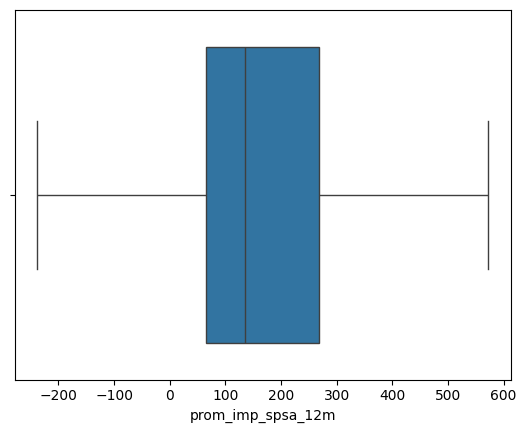

In [ ]:
sns.boxplot(x= 'prom_imp_spsa_12m', data=data_transacional)

In [ ]:
#Procedemos a la eliminación de los registros de antiguedad_laboral menores a
data_transacional = data_transacional.drop(data_transacional[data_transacional['prom_imp_spsa_12m'] < 0 ].index)

In [ ]:
#### FIN Tratamiento del campo max_compra_spsa_12m ####

In [ ]:
#### INICIO Tratamiento del campo max_fec_compra_far_12m ####

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['max_fec_compra_far_12m'].quantile(0.25)
Q3 = data_transacional['max_fec_compra_far_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['max_fec_compra_far_12m'] < lim_inf) | (data_transacional['max_fec_compra_far_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['max_fec_compra_far_12m'] < lim_inf, 'max_fec_compra_far_12m'] = lim_inf
data_transacional.loc[data_transacional['max_fec_compra_far_12m'] > lim_sup, 'max_fec_compra_far_12m'] = lim_sup

<Axes: xlabel='max_fec_compra_far_12m'>

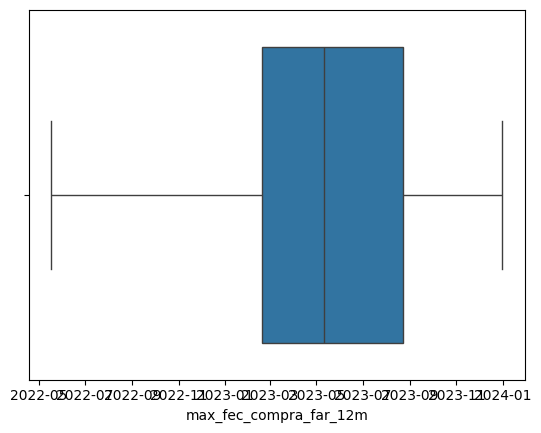

In [ ]:
sns.boxplot(x= 'max_fec_compra_far_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo max_fec_compra_far_12m ####

In [ ]:
#### INICIO Tratamiento del campo frec_compra_far_12m ####

<Axes: xlabel='frec_compra_far_12m'>

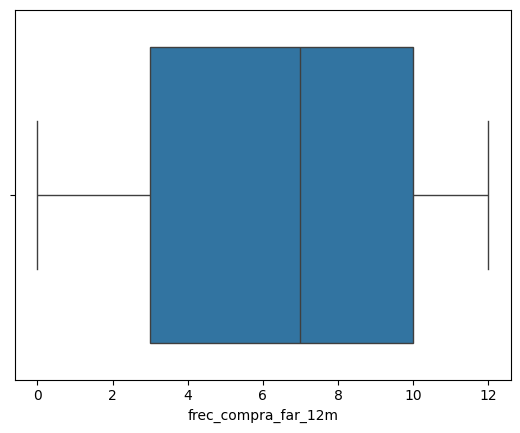

In [ ]:
sns.boxplot(x= 'frec_compra_far_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo frec_compra_far_12m ####

In [ ]:
#### INICIO Tratamiento del campo prom_imp_far_12m ####

<Axes: xlabel='prom_imp_far_12m'>

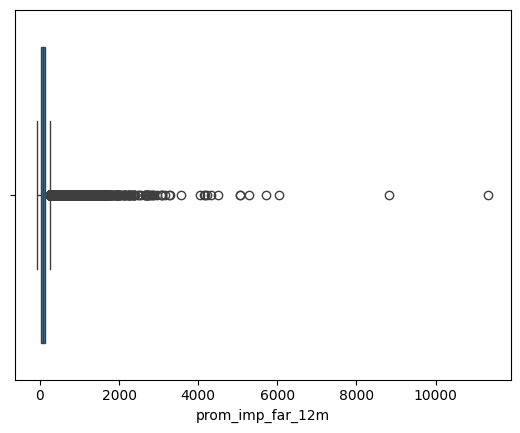

In [ ]:
sns.boxplot(x= 'prom_imp_far_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['prom_imp_far_12m'].quantile(0.25)
Q3 = data_transacional['prom_imp_far_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['prom_imp_far_12m'] < lim_inf) | (data_transacional['prom_imp_far_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['prom_imp_far_12m'] < lim_inf, 'prom_imp_far_12m'] = lim_inf
data_transacional.loc[data_transacional['prom_imp_far_12m'] > lim_sup, 'prom_imp_far_12m'] = lim_sup

<Axes: xlabel='prom_imp_far_12m'>

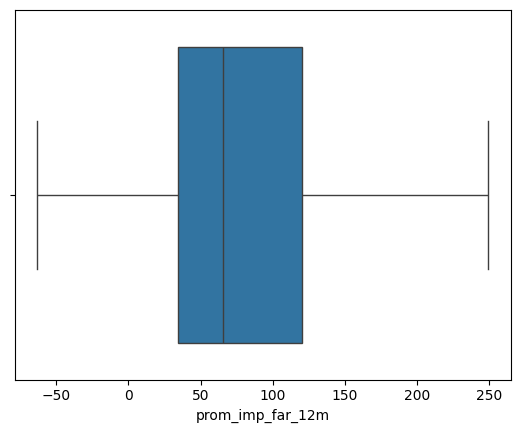

In [ ]:
sns.boxplot(x= 'prom_imp_far_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo max_compra_far_12m ####

In [ ]:
#### INICIO Tratamiento del campo max_fec_compra_oec_12m ####

<Axes: xlabel='max_fec_compra_oec_12m'>

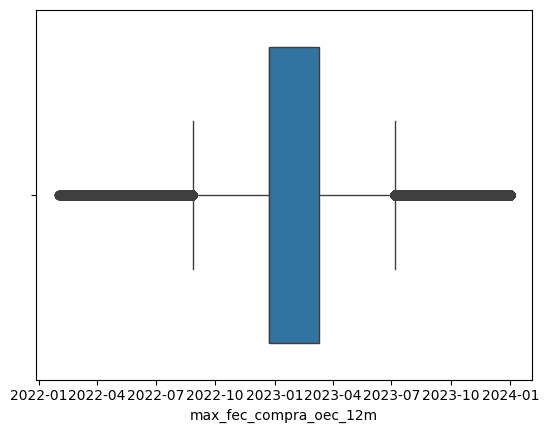

In [ ]:
sns.boxplot(x= 'max_fec_compra_oec_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['max_fec_compra_oec_12m'].quantile(0.25)
Q3 = data_transacional['max_fec_compra_oec_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['max_fec_compra_oec_12m'] < lim_inf) | (data_transacional['max_fec_compra_oec_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['max_fec_compra_oec_12m'] < lim_inf, 'max_fec_compra_oec_12m'] = lim_inf
data_transacional.loc[data_transacional['max_fec_compra_oec_12m'] > lim_sup, 'max_fec_compra_oec_12m'] = lim_sup

<Axes: xlabel='max_fec_compra_oec_12m'>

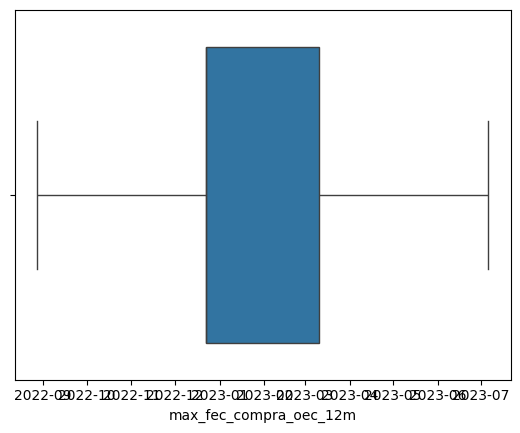

In [ ]:
sns.boxplot(x= 'max_fec_compra_oec_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo max_fec_compra_oec_12m ####

In [ ]:
#### INICIO Tratamiento del campo frec_compra_oec_12m ####

<Axes: xlabel='frec_compra_oec_12m'>

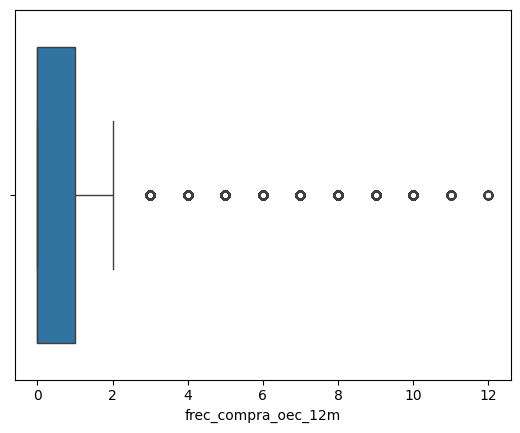

In [ ]:
sns.boxplot(x= 'frec_compra_oec_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['frec_compra_oec_12m'].quantile(0.25)
Q3 = data_transacional['frec_compra_oec_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['frec_compra_oec_12m'] < lim_inf) | (data_transacional['frec_compra_oec_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['frec_compra_oec_12m'] < lim_inf, 'frec_compra_oec_12m'] = lim_inf
data_transacional.loc[data_transacional['frec_compra_oec_12m'] > lim_sup, 'frec_compra_oec_12m'] = lim_sup

<Axes: xlabel='frec_compra_oec_12m'>

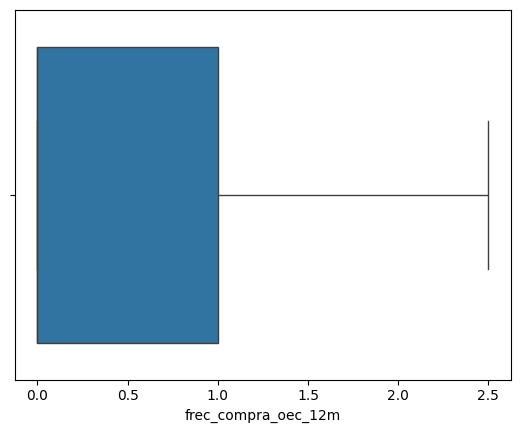

In [ ]:
sns.boxplot(x= 'frec_compra_oec_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo frec_compra_oec_12m ####

In [ ]:
#### INICIO Tratamiento del campo prom_imp_oec_12m ####

<Axes: xlabel='prom_imp_oec_12m'>

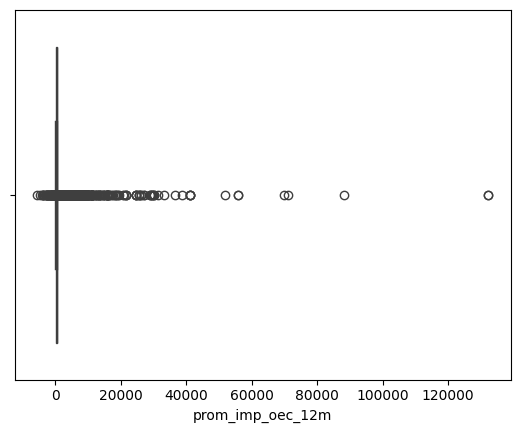

In [ ]:
sns.boxplot(x= 'prom_imp_oec_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['prom_imp_oec_12m'].quantile(0.25)
Q3 = data_transacional['prom_imp_oec_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['prom_imp_oec_12m'] < lim_inf) | (data_transacional['prom_imp_oec_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['prom_imp_oec_12m'] < lim_inf, 'prom_imp_oec_12m'] = lim_inf
data_transacional.loc[data_transacional['prom_imp_oec_12m'] > lim_sup, 'prom_imp_oec_12m'] = lim_sup

<Axes: xlabel='prom_imp_oec_12m'>

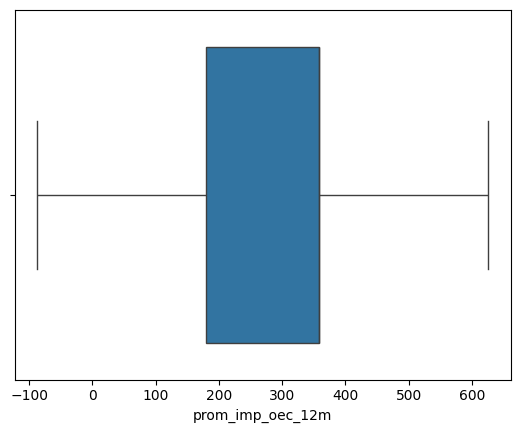

In [ ]:
sns.boxplot(x= 'prom_imp_oec_12m', data=data_transacional)

In [ ]:
#Procedemos a la eliminación de los registros de antiguedad_laboral menores a
data_transacional = data_transacional.drop(data_transacional[data_transacional['prom_imp_oec_12m'] < 0 ].index)

In [ ]:
#### FIN Tratamiento del campo prom_imp_oec_12m ####

In [ ]:
#### INICIO Tratamiento del campo max_fec_compra_pro_12m ####

<Axes: xlabel='max_fec_compra_pro_12m'>

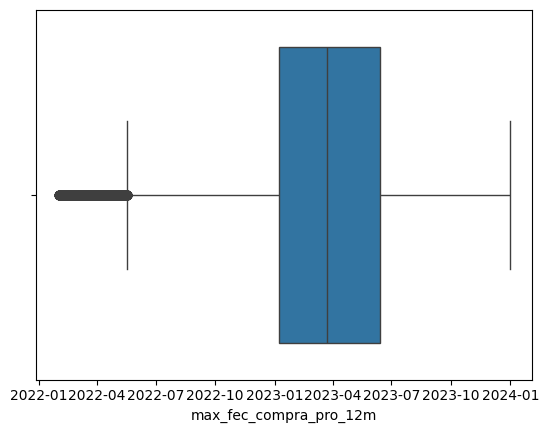

In [ ]:
sns.boxplot(x= 'max_fec_compra_pro_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['max_fec_compra_pro_12m'].quantile(0.25)
Q3 = data_transacional['max_fec_compra_pro_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['max_fec_compra_pro_12m'] < lim_inf) | (data_transacional['max_fec_compra_pro_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['max_fec_compra_pro_12m'] < lim_inf, 'max_fec_compra_pro_12m'] = lim_inf
data_transacional.loc[data_transacional['max_fec_compra_pro_12m'] > lim_sup, 'max_fec_compra_pro_12m'] = lim_sup

<Axes: xlabel='max_fec_compra_pro_12m'>

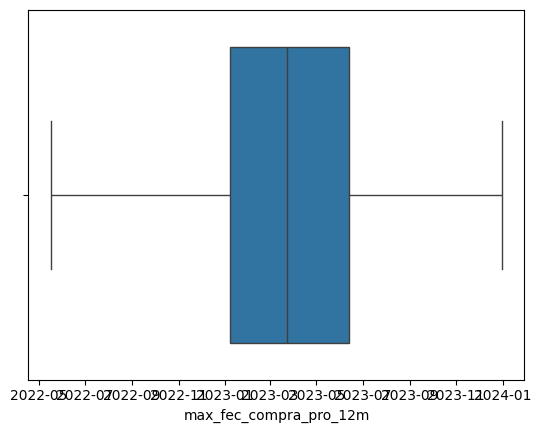

In [ ]:
sns.boxplot(x= 'max_fec_compra_pro_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo max_fec_compra_pro_12m ####

In [ ]:
#### INICIO Tratamiento del campo frec_compra_pro_12m ####

<Axes: xlabel='frec_compra_pro_12m'>

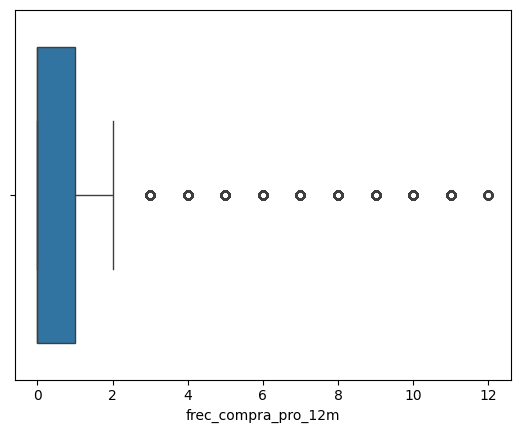

In [ ]:
sns.boxplot(x= 'frec_compra_pro_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['frec_compra_pro_12m'].quantile(0.25)
Q3 = data_transacional['frec_compra_pro_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['frec_compra_pro_12m'] < lim_inf) | (data_transacional['frec_compra_pro_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['frec_compra_pro_12m'] < lim_inf, 'frec_compra_pro_12m'] = lim_inf
data_transacional.loc[data_transacional['frec_compra_pro_12m'] > lim_sup, 'frec_compra_pro_12m'] = lim_sup

<Axes: xlabel='frec_compra_pro_12m'>

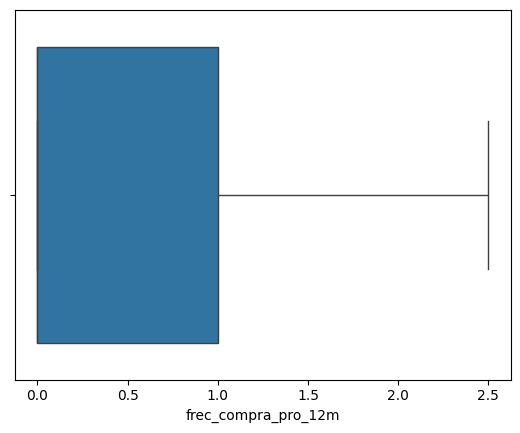

In [ ]:
sns.boxplot(x= 'frec_compra_pro_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo frec_compra_pro_12m ####

In [ ]:
#### INICIO Tratamiento del campo prom_imp_pro_12m ####

<Axes: xlabel='prom_imp_pro_12m'>

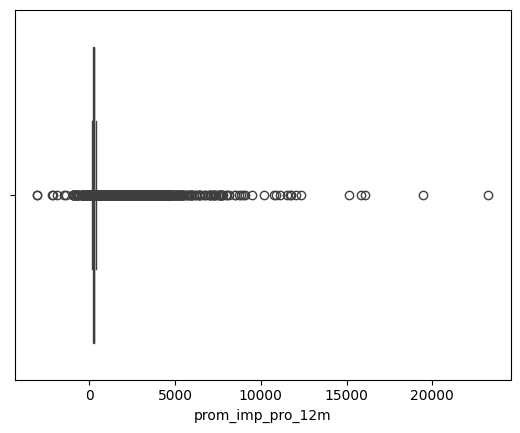

In [ ]:
sns.boxplot(x= 'prom_imp_pro_12m', data=data_transacional)

In [ ]:
#### Calculamos los límites de la caja de bigotes
Q1 = data_transacional['prom_imp_pro_12m'].quantile(0.25)
Q3 = data_transacional['prom_imp_pro_12m'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [ ]:
#### Identificar los outliers en los datos.
outliers = data_transacional[(data_transacional['prom_imp_pro_12m'] < lim_inf) | (data_transacional['prom_imp_pro_12m'] > lim_sup)]

In [ ]:
data_transacional.loc[data_transacional['prom_imp_pro_12m'] < lim_inf, 'prom_imp_pro_12m'] = lim_inf
data_transacional.loc[data_transacional['prom_imp_pro_12m'] > lim_sup, 'prom_imp_pro_12m'] = lim_sup

<Axes: xlabel='prom_imp_pro_12m'>

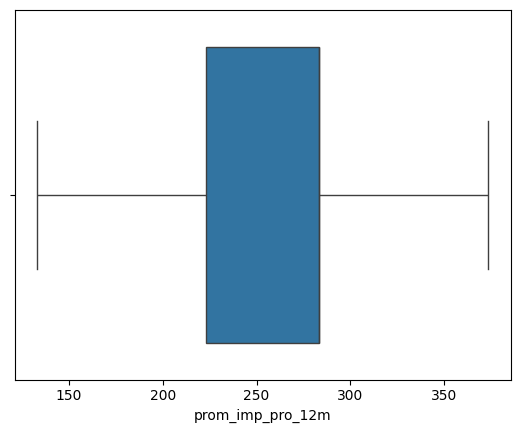

In [ ]:
sns.boxplot(x= 'prom_imp_pro_12m', data=data_transacional)

In [ ]:
#### FIN Tratamiento del campo max_compra_pro_12m ####

array([[<Axes: title={'center': 'LINEA_ASIG'}>,
        <Axes: title={'center': 'antiguedad_laboral'}>,
        <Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'ingreso'}>],
       [<Axes: title={'center': 'sexo'}>,
        <Axes: title={'center': 'max_fec_compra_spsa_12m'}>,
        <Axes: title={'center': 'frec_compra_spsa_12m'}>,
        <Axes: title={'center': 'prom_imp_spsa_12m'}>],
       [<Axes: title={'center': 'max_fec_compra_far_12m'}>,
        <Axes: title={'center': 'frec_compra_far_12m'}>,
        <Axes: title={'center': 'prom_imp_far_12m'}>,
        <Axes: title={'center': 'max_fec_compra_oec_12m'}>],
       [<Axes: title={'center': 'frec_compra_oec_12m'}>,
        <Axes: title={'center': 'prom_imp_oec_12m'}>,
        <Axes: title={'center': 'max_fec_compra_pro_12m'}>,
        <Axes: title={'center': 'frec_compra_pro_12m'}>],
       [<Axes: title={'center': 'prom_imp_pro_12m'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

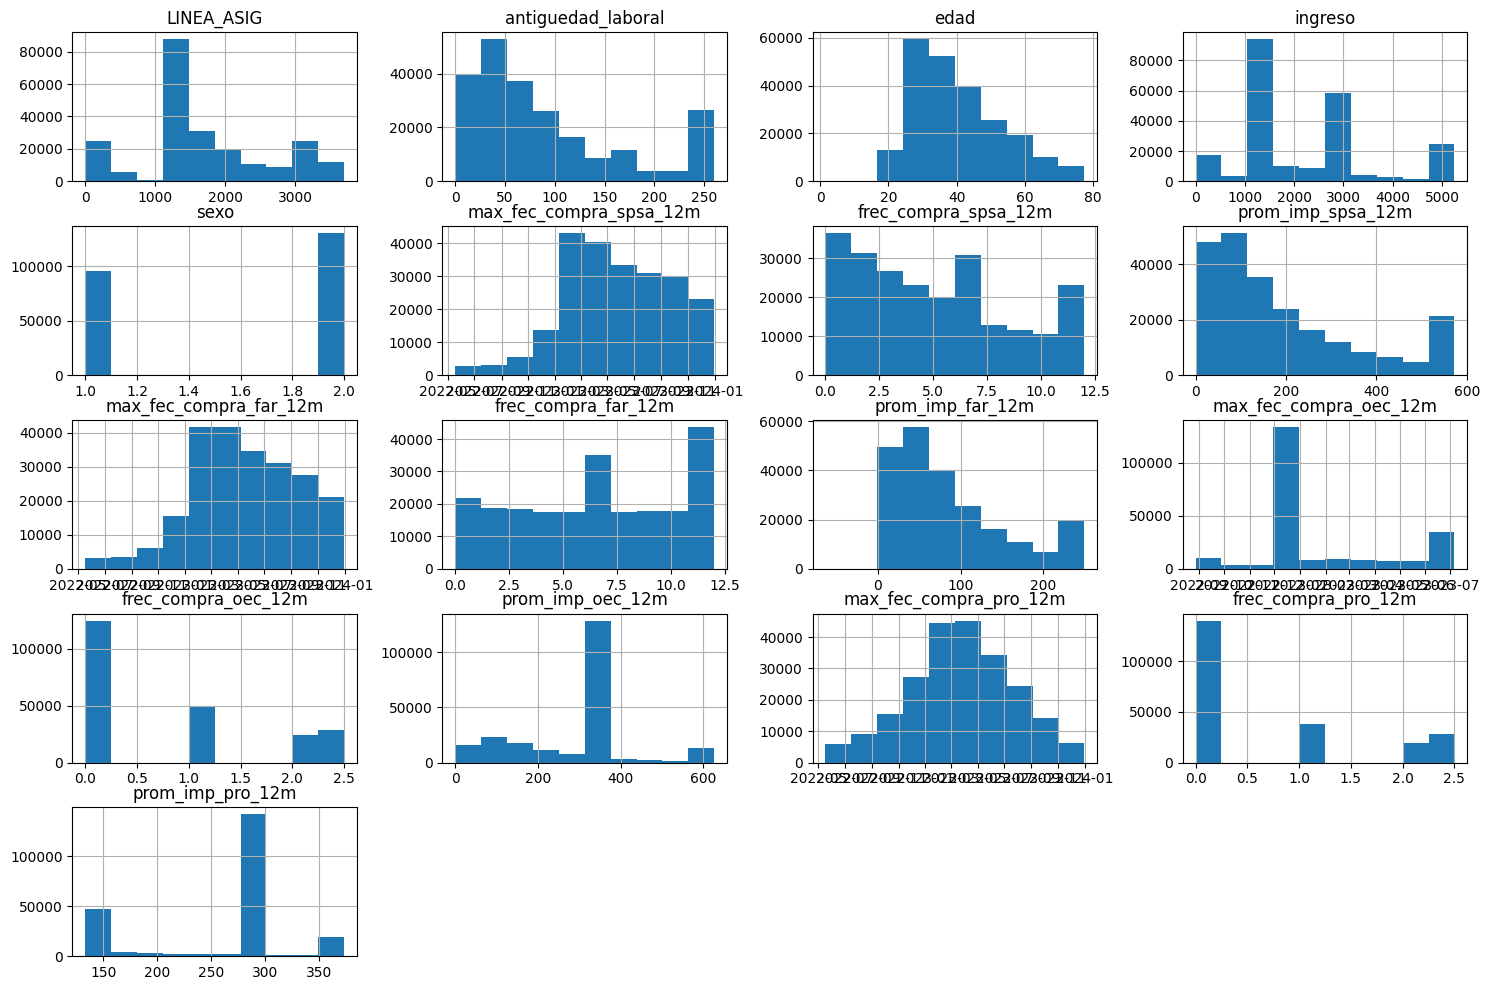

In [ ]:
data_transacional.hist(figsize = (18,12))

In [ ]:
data_transacional.columns

Index(['ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'antiguedad_laboral', 'edad',
       'estado_civil', 'flag_nobancariza', 'ingreso', 'sexo',
       'grado_instruccion', 'tipotrabajador', 'max_fec_compra_spsa_12m',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'max_fec_compra_far_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'max_fec_compra_oec_12m',
       'frec_compra_oec_12m', 'prom_imp_oec_12m', 'max_fec_compra_pro_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m'],
      dtype='object')

<Axes: >

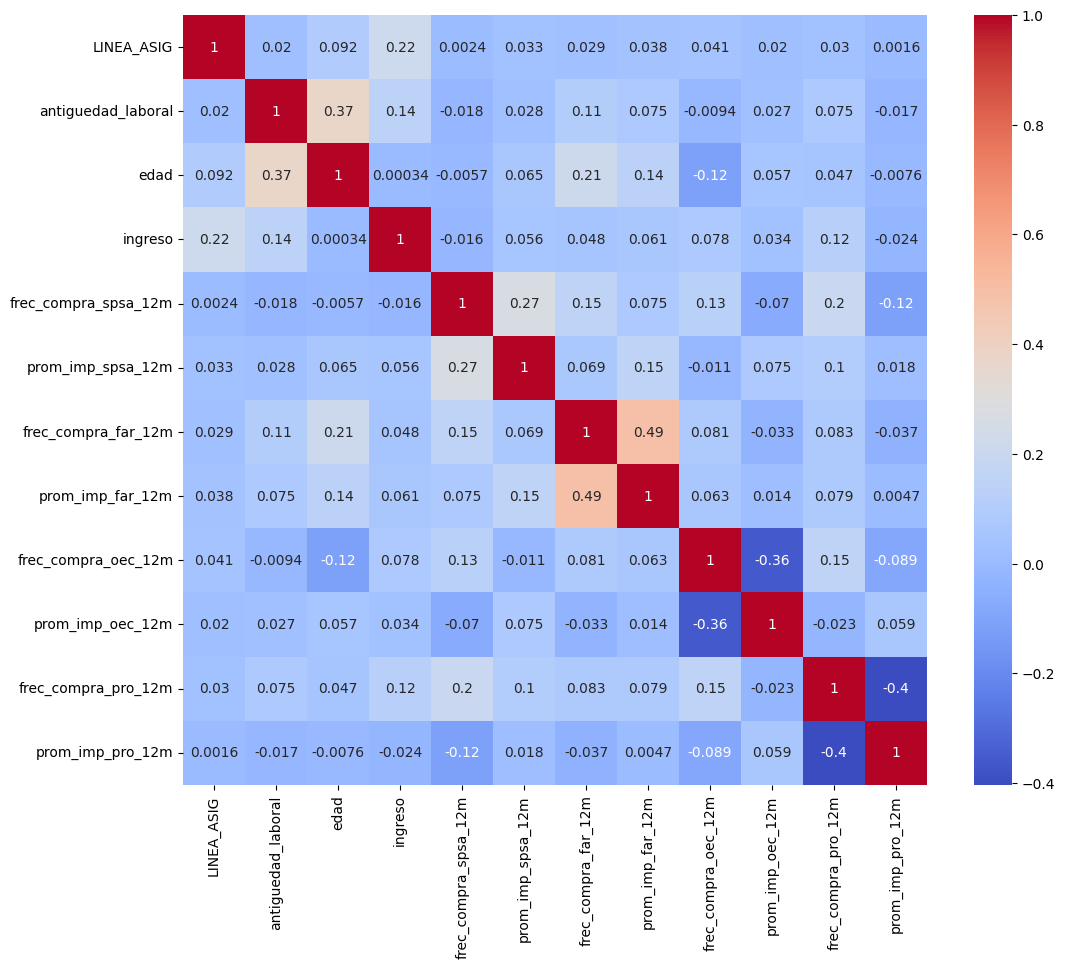

In [ ]:
# Calculamos la matriz de correlación de Pearson
corr_matrix = data_transacional[['LINEA_ASIG','antiguedad_laboral', 'edad', 'ingreso', 'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'frec_compra_far_12m', 'prom_imp_far_12m', 'frec_compra_oec_12m', 'prom_imp_oec_12m','frec_compra_pro_12m', 'prom_imp_pro_12m']].corr()
# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 10))
# Creación del mapa de calor utilizando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Preprocesamiento de datos

In [ ]:
data_transacional.describe(include=['O'])

,ID_DOC,desi_final_cda,estado_civil,flag_nobancariza,grado_instruccion,tipotrabajador
count,226273,226273,226273,226273.0,226273,226273
unique,199319,2,6,1.0,10,27
top,18152446594257300112,Aprobar,Soltero,0.0,SECUNDARIA COMPLETA,EMPLEADO
freq,17,179564,187879,226273.0,122491,184414


In [ ]:
data_transacional.columns

Index(['ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'antiguedad_laboral', 'edad',
       'estado_civil', 'flag_nobancariza', 'ingreso', 'sexo',
       'grado_instruccion', 'tipotrabajador', 'max_fec_compra_spsa_12m',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'max_fec_compra_far_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'max_fec_compra_oec_12m',
       'frec_compra_oec_12m', 'prom_imp_oec_12m', 'max_fec_compra_pro_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
print("desi_final_cda: ", data_transacional['desi_final_cda'].unique(), '\n')
print("estado_civil: ",data_transacional['estado_civil'].unique(), '\n')
print("sexo: ",data_transacional['sexo'].unique(), '\n')
print("grado_instruccion: ",data_transacional['grado_instruccion'].unique(), '\n')
print("tipotrabajador: ",data_transacional['tipotrabajador'].unique(), '\n')

desi_final_cda:  ['Aprobar' 'Rechazar'] 

estado_civil:  ['Soltero' 'Casado' 'Divorciado' 'Viudo' 'Conviviendo' 'Conviviente'] 

sexo:  [1 2] 

grado_instruccion:  ['TECNICA COMPLETA' 'SECUNDARIA COMPLETA' 'SECUNDARIA INCOMPLETA'
 'SUPERIOR COMPLETA' 'PRIMARIA COMPLETA' 'PRIMARIA INCOMPLETA'
 'SUPERIOR INCOMPLETA' 'TECNICA INCOMPLETA' 'ILETRADO'
 'EDUCACION ESPECIAL'] 

tipotrabajador:  ['EMPLEADO' 'OBRERO' 'EMPLEADO DE CONFIANZA' 'PENSIONISTA O CESANTE'
 'REG. ESPECIAL D. LEG.1057' 'SERVIDOR PUBLICO - ESPECIALISTA' 'EJECUTIVO'
 'PROFESOR ESTATAL' 'SERVIDOR PUBLICO - DE APOYO' 'FUNCIONARIO PUBLICO'
 'MIEMBROS DE OTROS REGIMENES ESPECIALES' 'CONSTRUCCION CIVIL'
 'MINERO DE TAJO ABIERTO' 'TRABAJADOR DEL HOGAR'
 'PILOTO Y COPILOTO DE AVIA. COM.' 'SERVIDOR PUBLICO - EJECUTIVO'
 'MINERO DE MINA DE SOCAVON' 'SERVIDOR PUBLICO - DIRECTIVO SUPERIOR'
 'MINERO DE INDUSTRIA MINERA METALURGICA' 'TRABAJADOR PORTUARIO'
 'PESCADOR Y PROCESADOR ARTESANAL INDEPENDIENTE' 'PERIODISTA'
 'MARITIMO, FLUVIAL 

In [ ]:
data_transacional['desi_final_cda_encoding'] = encoder.fit_transform(data_transacional['desi_final_cda'])

In [ ]:
data_transacional['estado_civil_encoding'] = encoder.fit_transform(data_transacional['estado_civil'])

In [ ]:
data_transacional['sexo_encoding'] = encoder.fit_transform(data_transacional['sexo'])

In [ ]:
data_transacional['grado_instruccion_encoding'] = encoder.fit_transform(data_transacional['grado_instruccion'])

In [ ]:
data_transacional['tipotrabajador_encoding'] = encoder.fit_transform(data_transacional['tipotrabajador'])

In [ ]:
print("desi_final_cda: ", data_transacional['desi_final_cda'].unique(), '\n')
print('desi_final_cda_encoding: ', data_transacional['desi_final_cda_encoding'].unique(), '\n')
print("estado_civil: ",data_transacional['estado_civil'].unique(), '\n')
print('estado_civil_encoding: ', data_transacional['estado_civil_encoding'].unique(), '\n')
print("sexo: ",data_transacional['sexo'].unique(),  '\n')
print('sexo_encoding: ', data_transacional['sexo_encoding'].unique(), '\n')
print("grado_instruccion: ",data_transacional['grado_instruccion'].unique(), '\n')
print('grado_instruccion_encoding: ', data_transacional['grado_instruccion_encoding'].unique(), '\n')
print("tipotrabajador: ",data_transacional['tipotrabajador'].unique(), '\n')
print('tipotrabajador_encoding: ', data_transacional['tipotrabajador_encoding'].unique(), '\n')

desi_final_cda:  ['Aprobar' 'Rechazar'] 

desi_final_cda_encoding:  [0 1] 

estado_civil:  ['Soltero' 'Casado' 'Divorciado' 'Viudo' 'Conviviendo' 'Conviviente'] 

estado_civil_encoding:  [4 0 3 5 1 2] 

sexo:  [1 2] 

sexo_encoding:  [0 1] 

grado_instruccion:  ['TECNICA COMPLETA' 'SECUNDARIA COMPLETA' 'SECUNDARIA INCOMPLETA'
 'SUPERIOR COMPLETA' 'PRIMARIA COMPLETA' 'PRIMARIA INCOMPLETA'
 'SUPERIOR INCOMPLETA' 'TECNICA INCOMPLETA' 'ILETRADO'
 'EDUCACION ESPECIAL'] 

grado_instruccion_encoding:  [8 4 5 6 2 3 7 9 1 0] 

tipotrabajador:  ['EMPLEADO' 'OBRERO' 'EMPLEADO DE CONFIANZA' 'PENSIONISTA O CESANTE'
 'REG. ESPECIAL D. LEG.1057' 'SERVIDOR PUBLICO - ESPECIALISTA' 'EJECUTIVO'
 'PROFESOR ESTATAL' 'SERVIDOR PUBLICO - DE APOYO' 'FUNCIONARIO PUBLICO'
 'MIEMBROS DE OTROS REGIMENES ESPECIALES' 'CONSTRUCCION CIVIL'
 'MINERO DE TAJO ABIERTO' 'TRABAJADOR DEL HOGAR'
 'PILOTO Y COPILOTO DE AVIA. COM.' 'SERVIDOR PUBLICO - EJECUTIVO'
 'MINERO DE MINA DE SOCAVON' 'SERVIDOR PUBLICO - DIRECTIVO SUPERI

# Segmentación RFM

In [ ]:
# Copia del df para las ección de RFM
data_RFM = data_transacional.copy()

In [ ]:
data_RFM

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,frec_compra_oec_12m,prom_imp_oec_12m,max_fec_compra_pro_12m,frec_compra_pro_12m,prom_imp_pro_12m,desi_final_cda_encoding,estado_civil_encoding,sexo_encoding,grado_instruccion_encoding,tipotrabajador_encoding
0,18152446172043173005,3000,Aprobar,85,53.0,Soltero,0.0,5250,1,TECNICA COMPLETA,...,0.0,358.649747,2023-08-31 00:00:00,1.0,352.050000,0,4,0,8,3
2,18323415895941564328,1200,Rechazar,260,35.0,Casado,0.0,1500,1,SECUNDARIA COMPLETA,...,2.0,559.375000,2023-09-10 00:00:00,0.0,283.354516,1,0,0,4,3
4,19149422554396897414,1650,Aprobar,49,26.0,Casado,0.0,1900,1,SECUNDARIA COMPLETA,...,0.0,358.649747,2023-09-20 00:00:00,0.0,283.354516,0,0,0,4,3
9,18323415895941564328,2600,Aprobar,6,35.0,Casado,0.0,1500,1,SECUNDARIA COMPLETA,...,2.0,559.375000,2023-10-10 00:00:00,0.0,283.354516,0,0,0,4,3
10,18354632564055972020,1200,Aprobar,45,37.0,Soltero,0.0,500,1,SECUNDARIA COMPLETA,...,0.0,358.649747,2023-10-20 00:00:00,1.0,259.900000,0,4,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674422,18152446327074107465,2500,Aprobar,45,36.0,Soltero,0.0,3000,1,SECUNDARIA COMPLETA,...,1.0,290.050000,2023-10-08 00:00:00,2.5,263.200000,0,4,0,4,3
674425,19149425495308167115,2600,Aprobar,6,26.0,Soltero,0.0,1500,2,SECUNDARIA COMPLETA,...,0.0,358.649747,2023-07-15 08:00:00,0.0,283.354516,0,4,1,4,3
674427,19009397267097472510,3000,Aprobar,106,30.0,Soltero,0.0,1500,2,SECUNDARIA COMPLETA,...,0.0,358.649747,2023-08-03 16:00:00,0.0,283.354516,0,4,1,4,3
674433,19149353364320970198,0,Rechazar,70,26.0,Soltero,0.0,3500,1,SECUNDARIA COMPLETA,...,0.0,358.649747,2023-09-30 16:00:00,0.0,283.354516,1,4,0,4,12


In [ ]:
# Segmentación RFM

#Elección de variables del dataframe transacional
data_RFM_df = data_RFM[[
                                            'ID_DOC',
                                            'max_fec_compra_spsa_12m',
                                            'frec_compra_spsa_12m',
                                            'prom_imp_spsa_12m',

                                            'max_fec_compra_far_12m',
                                            'frec_compra_far_12m',
                                            'prom_imp_far_12m',

                                            'max_fec_compra_oec_12m',
                                            'frec_compra_oec_12m',
                                            'prom_imp_oec_12m',

                                            'max_fec_compra_pro_12m',
                                            'frec_compra_pro_12m',
                                            'prom_imp_pro_12m'

                                            ]]

##Calculando la recencia

In [ ]:
#Calculando la recencia
df_recency = data_RFM_df.groupby('ID_DOC').agg({
    'max_fec_compra_spsa_12m': 'max',
    'max_fec_compra_far_12m': 'max',
    'max_fec_compra_oec_12m': 'max',
    'max_fec_compra_pro_12m': 'max'
}).reset_index()

for column in data_RFM_df.columns:
  if column.startswith('max_fec_compra'):
    max_date = data_RFM_df[column].max()
    prefix = column.split('_')[3]  # Obtener el prefijo de la columna
    # Recency
    columna_ultima_compra = 'ultima_compra_' + prefix
    df_recency[columna_ultima_compra] = max_date
    df_recency[columna_ultima_compra] = pd.to_datetime(df_recency[columna_ultima_compra])
    data_RFM_df[column] = pd.to_datetime(data_RFM_df[column])
    columna_recency = 'R_' + prefix
    df_recency[columna_recency] = (df_recency[columna_ultima_compra] - df_recency[column]).dt.days


<ipython-input-231-172c5245cc76>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_RFM_df[column] = pd.to_datetime(data_RFM_df[column])
<ipython-input-231-172c5245cc76>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_RFM_df[column] = pd.to_datetime(data_RFM_df[column])
<ipython-input-231-172c5245cc76>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199319 entries, 0 to 199318
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ID_DOC                   199319 non-null  object        
 1   max_fec_compra_spsa_12m  199319 non-null  datetime64[ns]
 2   max_fec_compra_far_12m   199319 non-null  datetime64[ns]
 3   max_fec_compra_oec_12m   199319 non-null  datetime64[ns]
 4   max_fec_compra_pro_12m   199319 non-null  datetime64[ns]
 5   ultima_compra_spsa       199319 non-null  datetime64[ns]
 6   R_spsa                   199319 non-null  int64         
 7   ultima_compra_far        199319 non-null  datetime64[ns]
 8   R_far                    199319 non-null  int64         
 9   ultima_compra_oec        199319 non-null  datetime64[ns]
 10  R_oec                    199319 non-null  int64         
 11  ultima_compra_pro        199319 non-null  datetime64[ns]
 12  R_pro           

In [ ]:
df_recency

,ID_DOC,max_fec_compra_spsa_12m,max_fec_compra_far_12m,max_fec_compra_oec_12m,max_fec_compra_pro_12m,ultima_compra_spsa,R_spsa,ultima_compra_far,R_far,ultima_compra_oec,R_oec,ultima_compra_pro,R_pro
0,18145450912433900588,2023-05-14,2023-05-31,2022-10-10,2022-08-27 00:00:00,2023-12-31,231,2023-12-31,214,2023-07-06,269,2023-12-31,491
1,18145450912567860674,2023-12-01,2023-12-15,2022-12-23,2023-05-01 16:00:00,2023-12-31,30,2023-12-31,16,2023-07-06,195,2023-12-31,243
2,18145450912833430837,2023-03-05,2023-05-25,2022-12-23,2023-05-20 00:00:00,2023-12-31,301,2023-12-31,220,2023-07-06,195,2023-12-31,225
3,18145450912841890843,2022-07-20,2023-06-26,2022-12-23,2023-03-17 12:00:00,2023-12-31,529,2023-12-31,188,2023-07-06,195,2023-12-31,288
4,18145450912850900850,2023-04-30,2023-04-28,2022-12-19,2023-02-23 00:00:00,2023-12-31,245,2023-12-31,247,2023-07-06,199,2023-12-31,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199314,23142371893421682309,2023-06-26,2023-11-15,2023-07-06,2023-04-06 08:00:00,2023-12-31,188,2023-12-31,46,2023-07-06,0,2023-12-31,268
199315,23142372807589304809,2023-10-15,2023-10-10,2022-12-23,2023-07-18 09:36:00,2023-12-31,77,2023-12-31,82,2023-07-06,195,2023-12-31,165
199316,23142372887658071988,2023-06-16,2023-07-28,2022-12-23,2022-10-31 00:00:00,2023-12-31,198,2023-12-31,156,2023-07-06,195,2023-12-31,426
199317,23142373043278618152,2023-12-24,2023-09-10,2023-07-06,2023-02-17 18:00:00,2023-12-31,7,2023-12-31,112,2023-07-06,0,2023-12-31,316


## Calculando la frecuencia

In [ ]:
#Calculando la frecuencia

df_frequency = data_transacional.groupby('ID_DOC').agg({
    'frec_compra_spsa_12m': 'sum',
    'frec_compra_far_12m': 'sum',
    'frec_compra_oec_12m': 'sum',
    'frec_compra_pro_12m': 'sum'
}).reset_index()

df_frequency = df_frequency.rename(columns={'frec_compra_spsa_12m': 'F_spsa', 'frec_compra_far_12m': 'F_far', 'frec_compra_oec_12m': 'F_oec', 'frec_compra_pro_12m': 'F_pro'})


In [ ]:
df_frequency

,ID_DOC,F_spsa,F_far,F_oec,F_pro
0,18145450912433900588,54,42,8.0,11.0
1,18145450912567860674,7,5,0.0,0.0
2,18145450912833430837,5,6,0.0,2.0
3,18145450912841890843,1,10,0.0,0.0
4,18145450912850900850,5,5,2.0,1.0
...,...,...,...,...,...
199314,23142371893421682309,1,6,1.0,0.0
199315,23142372807589304809,1,2,0.0,0.0
199316,23142372887658071988,1,1,0.0,0.0
199317,23142373043278618152,2,2,2.0,0.0


## Calculando el valor monetario

In [ ]:
#Calculando el valor monetario

df_monetary = data_transacional.groupby('ID_DOC').agg({
    'prom_imp_spsa_12m': 'sum',
    'prom_imp_far_12m': 'sum',
    'prom_imp_oec_12m': 'sum',
    'prom_imp_pro_12m': 'sum'
}).reset_index()

df_monetary = df_monetary.rename(columns={'prom_imp_spsa_12m': 'M_spsa', 'prom_imp_far_12m': 'M_far', 'prom_imp_oec_12m': 'M_oec', 'prom_imp_pro_12m': 'M_pro'})


In [ ]:
df_monetary

,ID_DOC,M_spsa,M_far,M_oec,M_pro
0,18145450912433900588,1466.118545,221.315694,211.175000,1398.703333
1,18145450912567860674,355.338571,23.640000,358.649747,283.354516
2,18145450912833430837,72.522000,113.950000,358.649747,172.210000
3,18145450912841890843,255.730000,121.248000,358.649747,283.354516
4,18145450912850900850,110.256000,20.556000,85.225000,133.318226
...,...,...,...,...,...
199314,23142371893421682309,18.800000,128.915000,151.900000,283.354516
199315,23142372807589304809,125.700000,84.300000,358.649747,283.354516
199316,23142372887658071988,499.220000,8.800000,358.649747,283.354516
199317,23142373043278618152,212.520000,28.450000,163.455000,283.354516


## Uniendo RFM

In [ ]:
#Uniendo los dataframes df_recency, df_frequency y df_monetary

rf_df = df_recency[['ID_DOC', 'R_spsa', 'R_far', 'R_oec', 'R_pro']].merge(df_frequency, on='ID_DOC')
rfm_df = rf_df.merge(df_monetary, on='ID_DOC')
rfm_df.head()


,ID_DOC,R_spsa,R_far,R_oec,R_pro,F_spsa,F_far,F_oec,F_pro,M_spsa,M_far,M_oec,M_pro
0,18145450912433900588,231,214,269,491,54,42,8.0,11.0,1466.118545,221.315694,211.175000,1398.703333
1,18145450912567860674,30,16,195,243,7,5,0.0,0.0,355.338571,23.640000,358.649747,283.354516
2,18145450912833430837,301,220,195,225,5,6,0.0,2.0,72.522000,113.950000,358.649747,172.210000
3,18145450912841890843,529,188,195,288,1,10,0.0,0.0,255.730000,121.248000,358.649747,283.354516
4,18145450912850900850,245,247,199,311,5,5,2.0,1.0,110.256000,20.556000,85.225000,133.318226


In [ ]:
#Data para RFM Global
rfm_df_global = rfm_df.copy()

In [ ]:
rfm_df_global.head()

,ID_DOC,R_spsa,R_far,R_oec,R_pro,F_spsa,F_far,F_oec,F_pro,M_spsa,M_far,M_oec,M_pro
0,18145450912433900588,231,214,269,491,54,42,8.0,11.0,1466.118545,221.315694,211.175000,1398.703333
1,18145450912567860674,30,16,195,243,7,5,0.0,0.0,355.338571,23.640000,358.649747,283.354516
2,18145450912833430837,301,220,195,225,5,6,0.0,2.0,72.522000,113.950000,358.649747,172.210000
3,18145450912841890843,529,188,195,288,1,10,0.0,0.0,255.730000,121.248000,358.649747,283.354516
4,18145450912850900850,245,247,199,311,5,5,2.0,1.0,110.256000,20.556000,85.225000,133.318226


## Rankiando RFM

In [ ]:
#Rankiando el ID_DOC en base al RFM

#Crear nuevas columnas con rank
for col in rfm_df.columns[1:]:
  if col.find('_', 2):
    #Crear nuevas columnas con rank
    rfm_df[col + '_rank'] = rfm_df[col].rank(ascending=False)
    #Crear nuevas columnas con rank normalizado
    rank_col = col + '_rank'
    rfm_df[col + '_rank_norm'] = (rfm_df[rank_col] / rfm_df[rank_col].max()) * 100

#Eliminar las columnas
cols_to_drop = [col for col in rfm_df.columns if col.endswith('_rank')]
rfm_df.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
rfm_df.head(10)

,ID_DOC,R_spsa,R_far,R_oec,R_pro,F_spsa,F_far,F_oec,F_pro,M_spsa,...,R_oec_rank_norm,R_pro_rank_norm,F_spsa_rank_norm,F_far_rank_norm,F_oec_rank_norm,F_pro_rank_norm,M_spsa_rank_norm,M_far_rank_norm,M_oec_rank_norm,M_pro_rank_norm
0,18145450912433900588,231,214,269,491,54,42,8.0,11.0,1466.118545,...,4.904165,5.041473,0.082538,0.284766,0.279375,0.083910,0.298044,11.002463,74.314466,0.303121
1,18145450912567860674,30,16,195,243,7,5,0.0,0.0,355.338571,...,39.963887,62.125226,31.344047,63.684695,100.000000,100.000000,19.842498,85.299445,41.371670,50.384656
2,18145450912833430837,301,220,195,225,5,6,0.0,2.0,72.522000,...,39.963887,67.183258,45.414474,56.391426,100.000000,26.193356,73.978610,30.214129,41.371670,87.858449
3,18145450912841890843,529,188,195,288,1,10,0.0,0.0,255.730000,...,39.963887,46.570775,92.174650,27.247204,100.000000,100.000000,29.731133,27.919566,41.371670,50.384656
4,18145450912850900850,245,247,199,311,5,5,2.0,1.0,110.256000,...,9.548620,38.655557,45.414474,63.684695,26.878165,43.840244,60.305219,87.926389,90.197295,100.000000
5,18145450912910350886,247,538,7,189,7,1,2.0,1.0,45.341429,...,92.449373,76.596316,31.344047,95.437975,26.878165,43.840244,85.169807,99.586592,84.111142,100.000000
6,18145450913082300998,246,297,195,251,2,5,0.0,2.5,73.345000,...,39.963887,59.481803,77.485562,63.684695,100.000000,11.897782,73.639171,74.182090,41.371670,12.678453
7,18145450913151361039,154,153,195,338,3,8,0.0,2.0,49.733333,...,39.963887,29.749055,65.056372,41.927577,100.000000,26.193356,83.367996,10.484700,41.371670,12.678453
8,18145450913298671130,579,389,195,334,3,3,0.0,2.0,152.310000,...,39.963887,31.171125,65.056372,78.761732,100.000000,26.193356,48.405540,88.940091,41.371670,88.165406
9,18145450913450301237,338,349,198,513,7,11,2.5,2.0,114.624286,...,9.740183,3.657539,31.344047,19.711069,11.768718,26.193356,58.899295,9.034262,77.077200,100.000000


## Puntuación RFM


In [ ]:
#Calculating la puntuación RFM

#Creación de las columnas RFM por cada comercio
for c in ['spsa', 'far', 'oec', 'pro']:

  rfm_df[f'RFM_Score_{c}'] = 0.15 * rfm_df[f'R_{c}_rank_norm'] + 0.28 * rfm_df[f'F_{c}_rank_norm'] + 0.57 * rfm_df[f'M_{c}_rank_norm']

  rfm_df[f'RFM_Score_{c}'] *= 0.05

RFM_Score = rfm_df[['ID_DOC', 'RFM_Score_spsa', 'RFM_Score_far', 'RFM_Score_oec', 'RFM_Score_pro']]

print(RFM_Score.head(5))

                 ID_DOC  RFM_Score_spsa  RFM_Score_far  RFM_Score_oec  \
0  18145450912433900588        0.369493       0.732123       2.158655   
1  18145450912567860674        1.723328       4.053668       2.878822   
2  18145450912833430837        2.954843       2.045264       2.878822   
3  18145450912841890843        2.147532       1.635209       2.878822   
4  18145450912850900850        2.695698       3.741897       3.018532   

   RFM_Score_pro  
0       0.047625  
1       3.301902  
2       3.374547  
3       3.185244  
4       3.753680  


In [ ]:
df_rfm_g = rfm_df[['ID_DOC',
 'RFM_Score_spsa',
 'RFM_Score_far',
 'RFM_Score_oec',
 'RFM_Score_pro']]

In [ ]:
data_transacional = data_transacional.merge(df_rfm_g , on='ID_DOC')

In [ ]:
data_transacional.columns

Index(['ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'antiguedad_laboral', 'edad',
       'estado_civil', 'flag_nobancariza', 'ingreso', 'sexo',
       'grado_instruccion', 'tipotrabajador', 'max_fec_compra_spsa_12m',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'max_fec_compra_far_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'max_fec_compra_oec_12m',
       'frec_compra_oec_12m', 'prom_imp_oec_12m', 'max_fec_compra_pro_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'desi_final_cda_encoding',
       'estado_civil_encoding', 'sexo_encoding', 'grado_instruccion_encoding',
       'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro'],
      dtype='object')

In [ ]:
data_t_v = ['LINEA_ASIG', 'antiguedad_laboral', 'edad', 'ingreso','frec_compra_spsa_12m', 'prom_imp_spsa_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'frec_compra_oec_12m', 'prom_imp_oec_12m', 'frec_compra_pro_12m', 'prom_imp_pro_12m',
       'estado_civil_encoding', 'sexo_encoding', 'grado_instruccion_encoding', 'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro']

<Axes: >

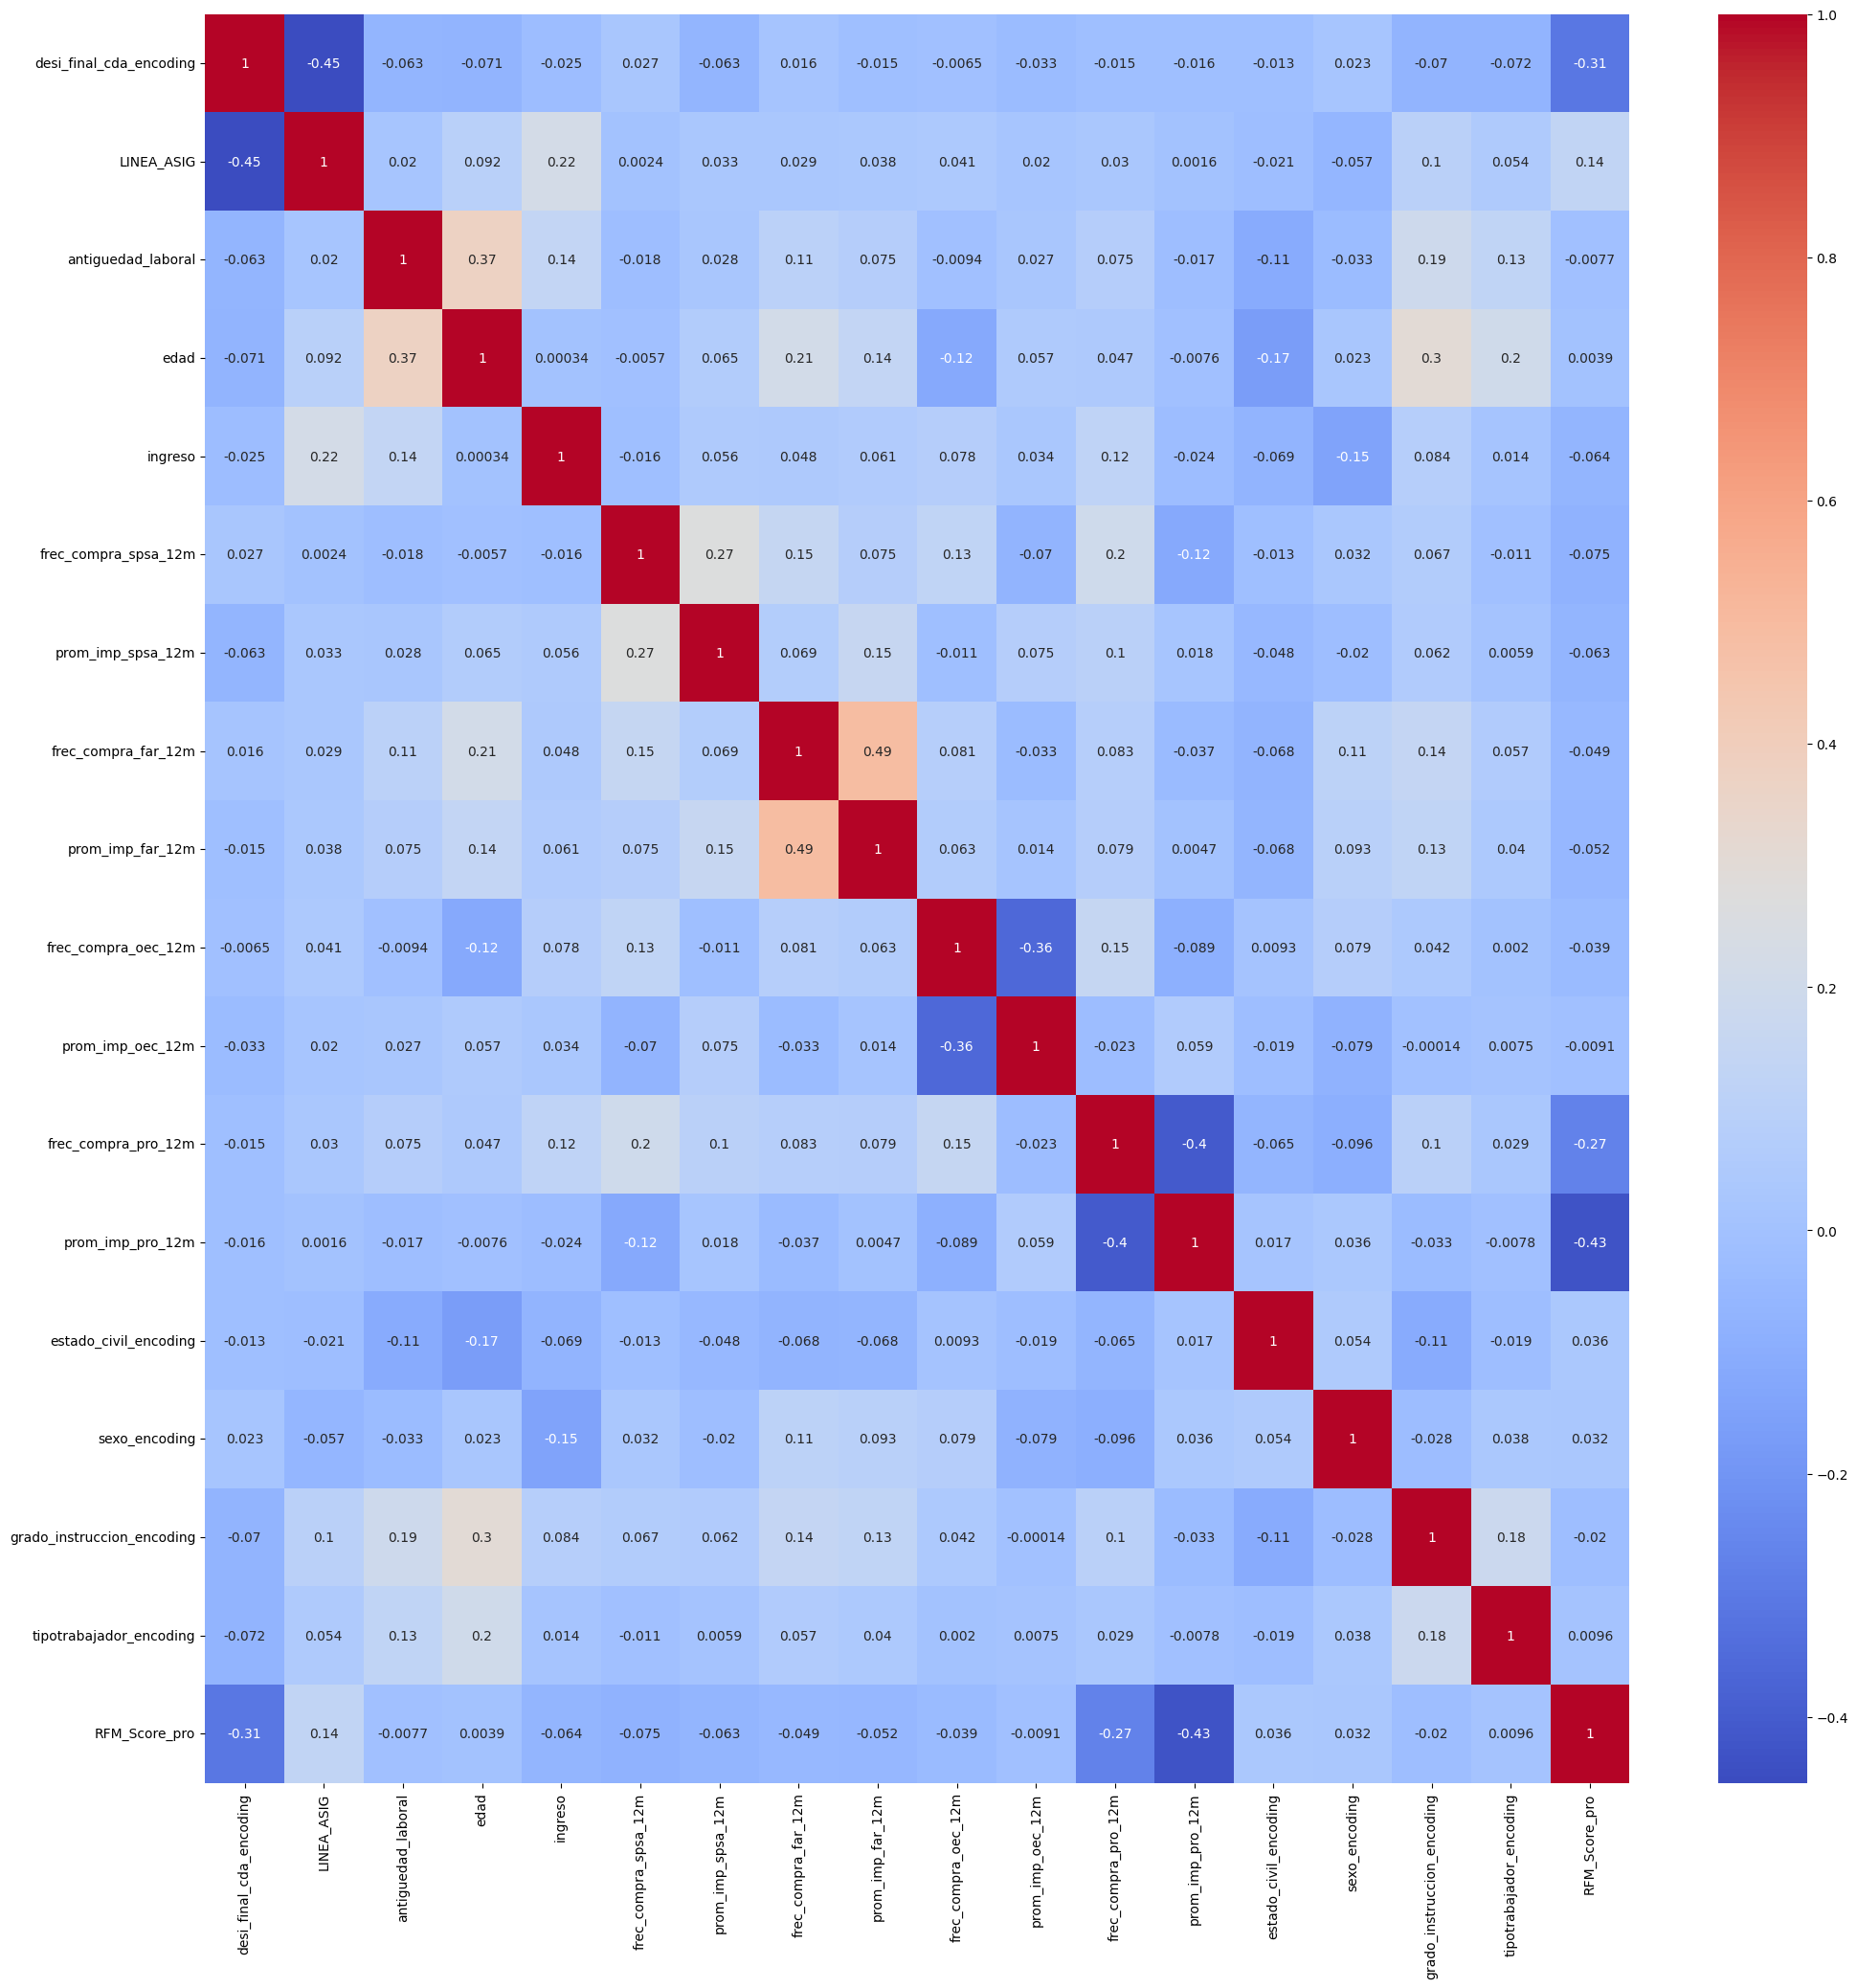

In [ ]:
# Calculamos la matriz de correlación de Pearson
corr_matrix = data_transacional[data_t_v].corr()
# Configuración del tamaño del gráfico
plt.figure(figsize=(24, 24))
# Creación del mapa de calor utilizando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
df_rfm_g.head()

,ID_DOC,RFM_Score_spsa,RFM_Score_far,RFM_Score_oec,RFM_Score_pro
0,18145450912433900588,0.369493,0.732123,2.158655,0.047625
1,18145450912567860674,1.723328,4.053668,2.878822,3.301902
2,18145450912833430837,2.954843,2.045264,2.878822,3.374547
3,18145450912841890843,2.147532,1.635209,2.878822,3.185244
4,18145450912850900850,2.695698,3.741897,3.018532,3.753680


## Segmentación RFM

In [ ]:
#Segmentación en base a la puntuación RFM --> 3 Segmentos

for column in ['spsa', 'far', 'oec', 'pro']:
    RFM_Score[f"Customer_segment_{column}"] = np.where(RFM_Score[f'RFM_Score_{column}'] > 3.5, "Oro",
                                                        (np.where(RFM_Score[f'RFM_Score_{column}'] > 2, "Plata",
                                                          ('Bronce')
                                                                  )
                                                          )
                                                      )


<ipython-input-252-dc65882d4c7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_Score[f"Customer_segment_{column}"] = np.where(RFM_Score[f'RFM_Score_{column}'] > 3.5, "Oro",
<ipython-input-252-dc65882d4c7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_Score[f"Customer_segment_{column}"] = np.where(RFM_Score[f'RFM_Score_{column}'] > 3.5, "Oro",
<ipython-input-252-dc65882d4c7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [ ]:
#Ordenando el dataframe
RFM_Score = RFM_Score[['ID_DOC', 'RFM_Score_spsa', 'Customer_segment_spsa', 'RFM_Score_far', 'Customer_segment_far', 'RFM_Score_oec', 'Customer_segment_oec', 'RFM_Score_pro', 'Customer_segment_pro']]


In [ ]:
RFM_Score.head(10)

,ID_DOC,RFM_Score_spsa,Customer_segment_spsa,RFM_Score_far,Customer_segment_far,RFM_Score_oec,Customer_segment_oec,RFM_Score_pro,Customer_segment_pro
0,18145450912433900588,0.369493,Bronce,0.732123,Bronce,2.158655,Plata,0.047625,Bronce
1,18145450912567860674,1.723328,Bronce,4.053668,Oro,2.878822,Plata,3.301902,Plata
2,18145450912833430837,2.954843,Plata,2.045264,Plata,2.878822,Plata,3.374547,Plata
3,18145450912841890843,2.147532,Plata,1.635209,Bronce,2.878822,Plata,3.185244,Plata
4,18145450912850900850,2.695698,Plata,3.741897,Oro,3.018532,Plata,3.753680,Oro
5,18145450912910350886,3.197465,Plata,4.184374,Oro,3.466832,Plata,4.038236,Oro
6,18145450913082300998,3.519210,Oro,3.231487,Plata,2.878822,Plata,0.974018,Bronce
7,18145450913151361039,3.795659,Oro,1.412863,Bronce,2.878822,Plata,0.951161,Bronce
8,18145450913298671130,2.295337,Plata,3.696212,Oro,2.878822,Plata,3.113205,Plata
9,18145450913450301237,2.234927,Plata,0.638043,Bronce,2.434514,Plata,3.244139,Plata


## Graficando la segmentación

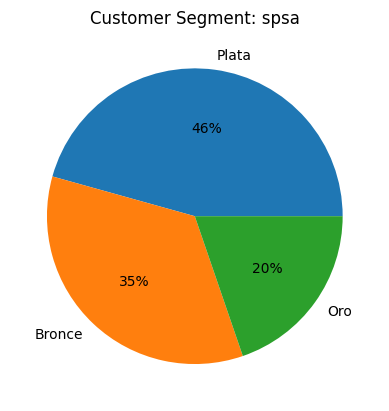

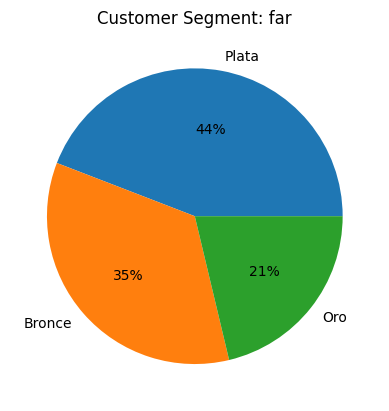

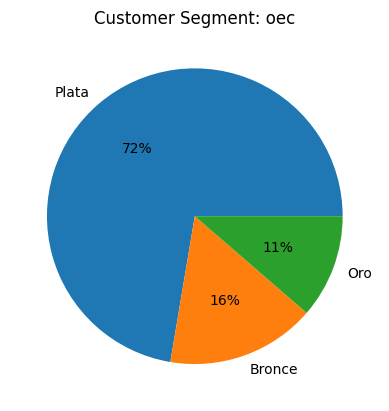

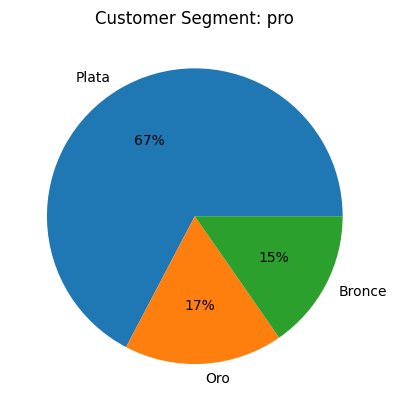

In [ ]:
#Graficando la segmentación

for segment in ['spsa', 'far', 'oec', 'pro']:
    plt.pie(RFM_Score[f'Customer_segment_{segment}'].value_counts(),
            labels=RFM_Score[f'Customer_segment_{segment}'].value_counts().index,
            autopct='%.0f%%')
    plt.title(f'Customer Segment: {segment}')
    plt.show()

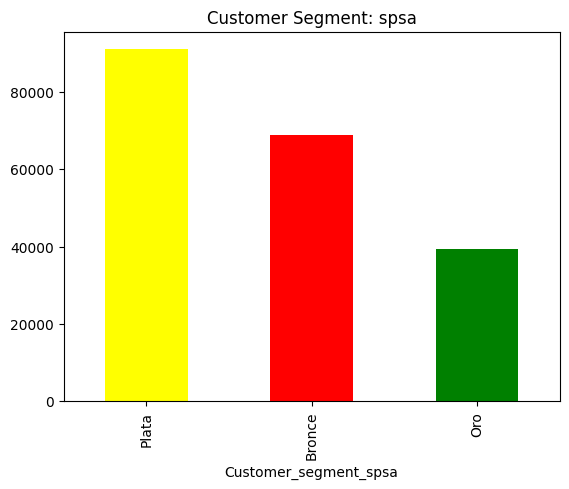

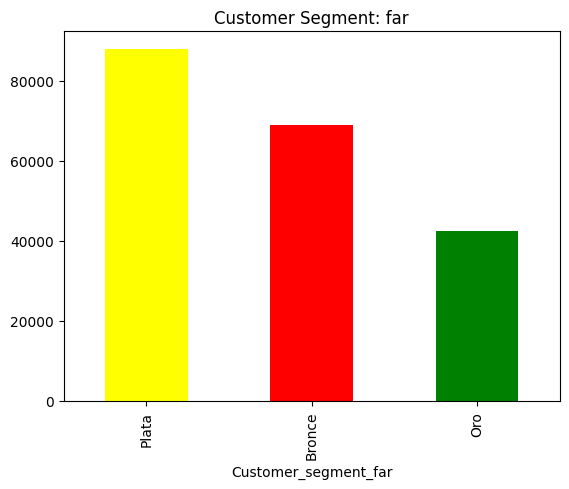

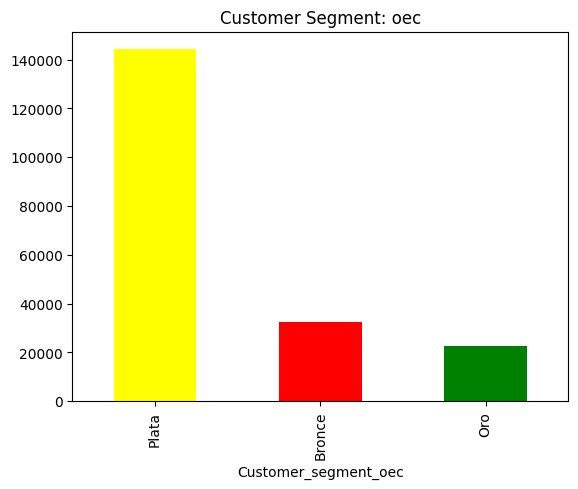

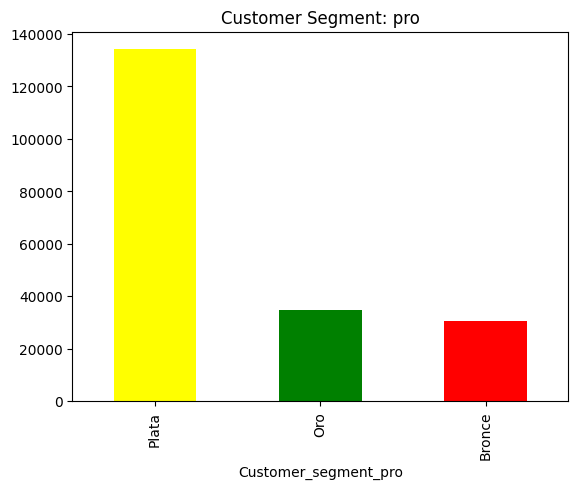

In [ ]:
import matplotlib.pyplot as plt

colors = {'Oro': 'green', 'Plata': 'yellow', 'Bronce': 'red'}

for segment in ['spsa', 'far', 'oec', 'pro']:
    segment_counts = RFM_Score[f'Customer_segment_{segment}'].value_counts()
    segment_counts.plot(kind='bar', color=[colors.get(x, 'grey') for x in segment_counts.index])
    plt.title(f'Customer Segment: {segment}')
    plt.show()

# Partición de la data (train y test)

In [ ]:
import statsmodels.api as sm # Statsmodels

In [ ]:
data_transacional.columns

Index(['ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'antiguedad_laboral', 'edad',
       'estado_civil', 'flag_nobancariza', 'ingreso', 'sexo',
       'grado_instruccion', 'tipotrabajador', 'max_fec_compra_spsa_12m',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'max_fec_compra_far_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'max_fec_compra_oec_12m',
       'frec_compra_oec_12m', 'prom_imp_oec_12m', 'max_fec_compra_pro_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'desi_final_cda_encoding',
       'estado_civil_encoding', 'sexo_encoding', 'grado_instruccion_encoding',
       'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro'],
      dtype='object')

In [ ]:
#explicitly create a placeholder for y-intercept: b0
data_transacional['INTERCEPTO'] = 1

In [ ]:
# Reinicio del dataframe
data_transacional = data_transacional.reset_index(drop=True)

In [ ]:
### Normalización de variables númericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_transacional['LINEA_ASIG'] = scaler.fit_transform(data_transacional['LINEA_ASIG'].values.reshape(-1, 1))
data_transacional['ingreso'] = scaler.fit_transform(data_transacional['ingreso'].values.reshape(-1, 1))
data_transacional['antiguedad_laboral'] = scaler.fit_transform(data_transacional['antiguedad_laboral'].values.reshape(-1, 1))
data_transacional['edad'] = scaler.fit_transform(data_transacional['edad'].values.reshape(-1, 1))
data_transacional['frec_compra_spsa_12m'] = scaler.fit_transform(data_transacional['frec_compra_spsa_12m'].values.reshape(-1, 1))
data_transacional['prom_imp_spsa_12m'] = scaler.fit_transform(data_transacional['prom_imp_spsa_12m'].values.reshape(-1, 1))
data_transacional['frec_compra_far_12m'] = scaler.fit_transform(data_transacional['frec_compra_far_12m'].values.reshape(-1, 1))
data_transacional['prom_imp_far_12m'] = scaler.fit_transform(data_transacional['prom_imp_far_12m'].values.reshape(-1, 1))
data_transacional['frec_compra_oec_12m'] = scaler.fit_transform(data_transacional['frec_compra_oec_12m'].values.reshape(-1, 1))
data_transacional['prom_imp_oec_12m'] = scaler.fit_transform(data_transacional['prom_imp_oec_12m'].values.reshape(-1, 1))
data_transacional['frec_compra_pro_12m'] = scaler.fit_transform(data_transacional['frec_compra_pro_12m'].values.reshape(-1, 1))
data_transacional['prom_imp_pro_12m'] = scaler.fit_transform(data_transacional['prom_imp_pro_12m'].values.reshape(-1, 1))

In [ ]:
#Definir en python cuales son mis variables independientes (X)
#data_X = ['LINEA_ASIG', 'antiguedad_laboral', 'edad', 'ingreso',
#      'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'frec_compra_far_12m', 'prom_imp_far_12m','frec_compra_oec_12m', 'prom_imp_oec_12m',
#       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'desi_final_cda_encoding','estado_civil_encoding', 'sexo_encoding', 'grado_instruccion_encoding',
#       'tipotrabajador_encoding', 'R_spsa_rank_norm', 'R_far_rank_norm', 'R_oec_rank_norm', 'R_pro_rank_norm', 'F_spsa_rank_norm',
#       'F_far_rank_norm', 'F_oec_rank_norm', 'F_pro_rank_norm','M_spsa_rank_norm', 'M_far_rank_norm', 'M_oec_rank_norm',
#       'M_pro_rank_norm', 'RFM_Score_spsa', 'RFM_Score_far', 'RFM_Score_oec', 'RFM_Score_pro']
#X = data_transacional[data_X]

In [ ]:
data_X = ['LINEA_ASIG', 'antiguedad_laboral', 'edad', 'ingreso','frec_compra_spsa_12m', 'prom_imp_spsa_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'frec_compra_oec_12m', 'prom_imp_oec_12m', 'frec_compra_pro_12m', 'prom_imp_pro_12m',
       'estado_civil_encoding', 'sexo_encoding', 'grado_instruccion_encoding', 'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro']
X = data_transacional[data_X]

In [ ]:
data_transacional.head()

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,desi_final_cda_encoding,estado_civil_encoding,sexo_encoding,grado_instruccion_encoding,tipotrabajador_encoding,RFM_Score_spsa,RFM_Score_far,RFM_Score_oec,RFM_Score_pro,INTERCEPTO
0,18152446172043173005,1.428415,Aprobar,-0.087531,0.977060,Soltero,0.0,2.224325,1,TECNICA COMPLETA,...,0,4,0,8,3,3.315387,4.181993,2.878822,1.781486,1
1,18323415895941564328,-0.441299,Rechazar,2.172343,-0.404109,Casado,0.0,-0.655184,1,SECUNDARIA COMPLETA,...,1,0,0,4,3,2.311843,2.688789,0.821903,2.261591,1
2,18323415895941564328,1.012923,Aprobar,-1.107703,-0.404109,Casado,0.0,-0.655184,1,SECUNDARIA COMPLETA,...,0,0,0,4,3,2.311843,2.688789,0.821903,2.261591,1
3,19149422554396897414,0.026130,Aprobar,-0.552420,-1.094693,Casado,0.0,-0.348037,1,SECUNDARIA COMPLETA,...,0,0,0,4,3,3.765519,1.233131,2.878822,3.530595,1
4,18354632564055972020,-0.441299,Aprobar,-0.604074,-0.250646,Soltero,0.0,-1.423053,1,SECUNDARIA COMPLETA,...,0,4,0,4,3,3.230437,2.751453,2.878822,3.710915,1


In [ ]:
y = data_transacional[['desi_final_cda_encoding']]

# Ejecución de modelos

In [ ]:
from sklearn.model_selection import train_test_split #sklearn tiene gran cantidad de funciones para todo lo relacionado al
from sklearn.linear_model import Ridge

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # random state y seed metodo aleatorio simpl3

In [ ]:
X.shape

(226273, 23)

In [ ]:
X_train.shape, X_test.shape

((158391, 21), (67882, 21))

In [ ]:
y.shape

(226273, 1)

In [ ]:
y_train.shape, y_test.shape

((158391, 1), (67882, 1))

# Ejecución de modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [ ]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['APROBAR', 'RECHAZADO']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['APROBAR', 'RECHAZADO']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

##LOGISTIC REGRESSION

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     53808
           1       0.84      0.61      0.71     14074

    accuracy                           0.89     67882
   macro avg       0.87      0.79      0.82     67882
weighted avg       0.89      0.89      0.89     67882

AUC ROC :  0.7913559431370593


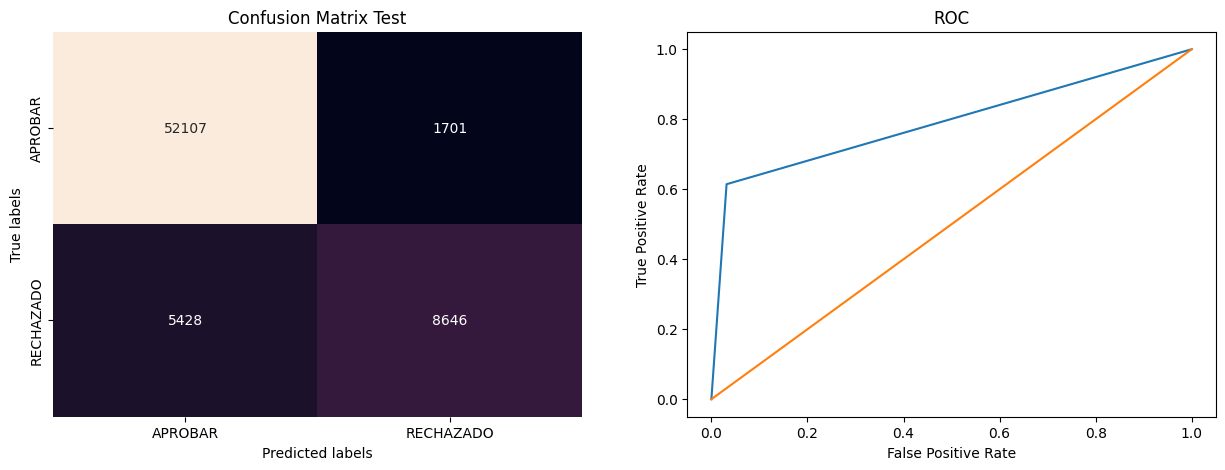

In [ ]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

In [ ]:
model1= sm.Logit(y_train, X_train) # Definir el modelo
answer= model1.fit() #fit hacer el entrenamiento del modelo
#summarize the model
# Resumen de variables, enfocarnos en 2 columnas:
# - coef  --> Coeficientes
# - P>|z| --> PValor --> Indica si la variables significativa o no respecto al modelo. Es significativa cuando es < 0.05
answer.summary()

Optimization terminated successfully.
         Current function value: 0.315858
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     desi_final_cda_encoding   No. Observations:               158391
Model:                               Logit   Df Residuals:                   158371
Method:                                MLE   Df Model:                           19
Date:                     Mon, 01 Jul 2024   Pseudo R-squ.:                  0.3790
Time:                             03:43:24   Log-Likelihood:                -50029.
converged:                            True   LL-Null:                       -80568.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
LINEA_ASIG                    -1.7607      0.012   -142.122      0.000      -1.785      -1.736
antiguedad_laboral            -0.1579      0.009    -17.828      0.000      -0.175      -0.141
edad                          -0.0810      0.010     -8.516      0.000      -0.100      -0.062
ingreso                        0.1313      0.008     15.591      0.000       0.115       0.148
frec_compra_spsa_12m          -0.0510      0.011     -4.497      0.000      -0.073      -0.029
prom_imp_spsa_12m             -0.3866      0.015    -25.283      0.000      -0.417      -0.357
frec_compra_far_12m           -0.0738      0.012     -6.170      0.000      -0.097      -0.050
prom_imp_far_12m              -0.2555      0.015    -16.945      0.000      -0.285      -0.226
frec_compra_oec_12m           -0.2095      0.011    -19.397      0.000      -0.231      -0.188
prom_imp_oec_12m              -0.3354      0.015    -22.476      0.000      -0.365      -0.306
frec_compra_pro_12m           -0.2778      0.012    -22.564      0.000      -0.302      -0.254
prom_imp_pro_12m              -0.3056      0.013    -23.412      0.000      -0.331      -0.280
estado_civil_encoding          0.1622      0.007     23.176      0.000       0.149       0.176
sexo_encoding                  0.2761      0.017     16.296      0.000       0.243       0.309
grado_instruccion_encoding     0.2160      0.006     35.771      0.000       0.204       0.228
tipotrabajador_encoding       -0.0204      0.002    -12.991      0.000      -0.023      -0.017
RFM_Score_spsa                -0.2525      0.018    -13.889      0.000      -0.288      -0.217
RFM_Score_far                 -0.3489      0.018    -18.904      0.000      -0.385      -0.313
RFM_Score_oec                 -0.4525      0.020    -22.722      0.000      -0.491      -0.413
RFM_Score_pro                 -0.4530      0.017    -27.120      0.000      -0.486      -0.420
==============================================================================================
"""

##RANDOM FOREST

<ipython-input-328-a646da299ce1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain) #Entrenamiento del modelo


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     53808
           1       0.89      0.68      0.77     14074

    accuracy                           0.92     67882
   macro avg       0.90      0.83      0.86     67882
weighted avg       0.91      0.92      0.91     67882

AUC ROC :  0.8289641162144903


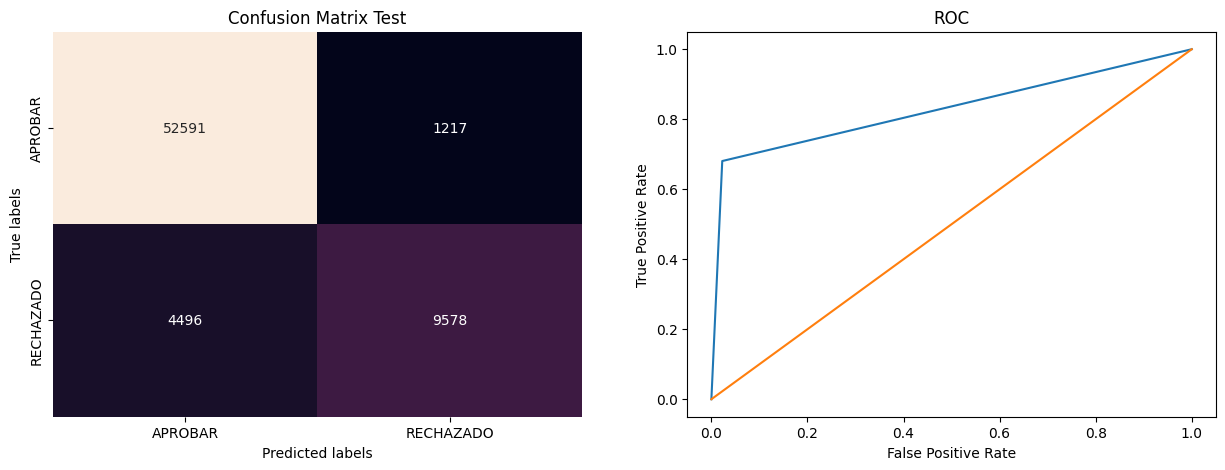

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

##K-NEAREST NEIGHBORS

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93     53808
           1       0.81      0.54      0.65     14074

    accuracy                           0.88     67882
   macro avg       0.85      0.76      0.79     67882
weighted avg       0.87      0.88      0.87     67882

AUC ROC :  0.7550805645584904


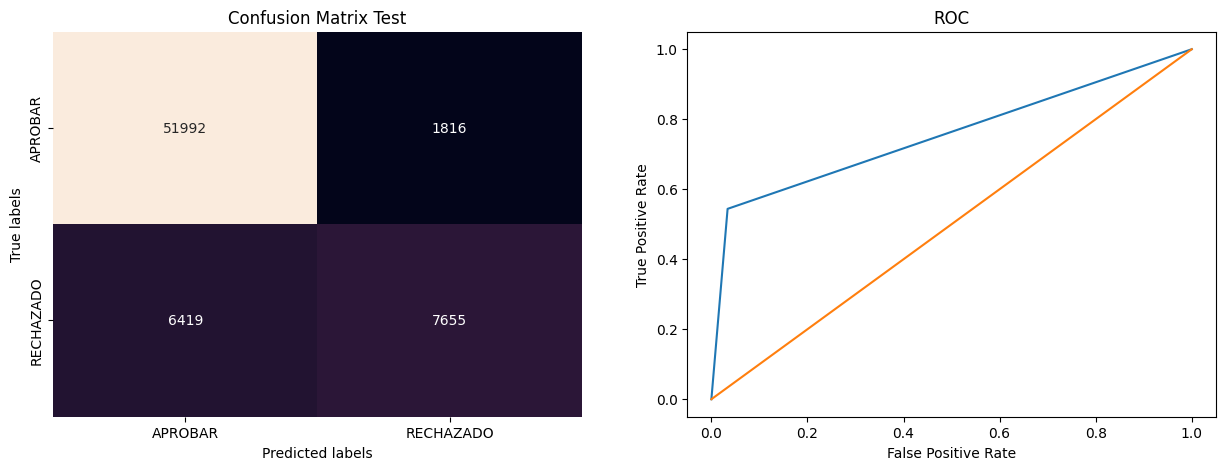

In [ ]:
apply_classifier(knn,X_train, X_test, y_train, y_test)

##XBGOOST

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     53808
           1       0.90      0.70      0.79     14074

    accuracy                           0.92     67882
   macro avg       0.91      0.84      0.87     67882
weighted avg       0.92      0.92      0.92     67882

AUC ROC :  0.8395822740350682


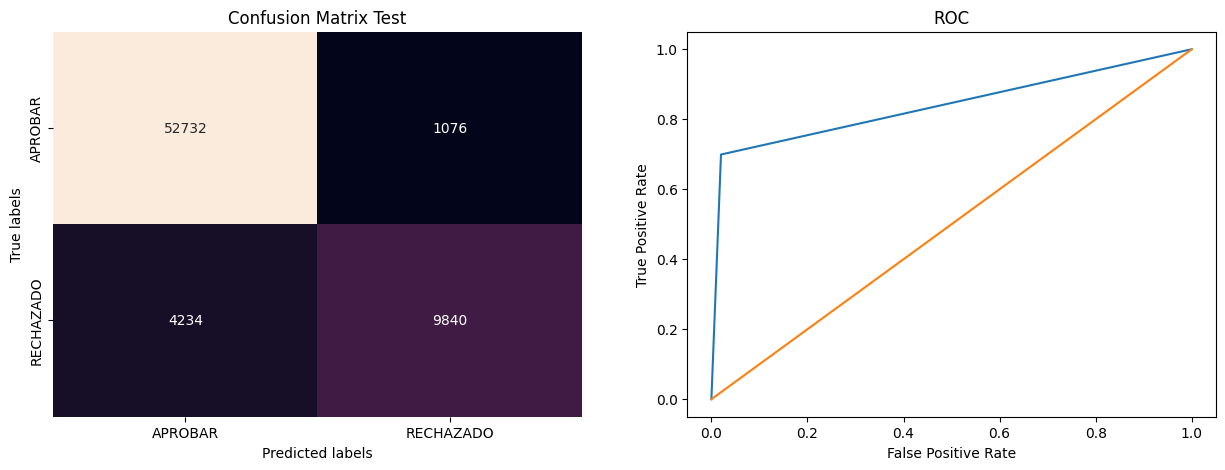

In [ ]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

## Balanceo de datos

In [ ]:
data_transacional.columns

Index(['ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'antiguedad_laboral', 'edad',
       'estado_civil', 'flag_nobancariza', 'ingreso', 'sexo',
       'grado_instruccion', 'tipotrabajador', 'max_fec_compra_spsa_12m',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'max_fec_compra_far_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'max_fec_compra_oec_12m',
       'frec_compra_oec_12m', 'prom_imp_oec_12m', 'max_fec_compra_pro_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'desi_final_cda_encoding',
       'estado_civil_encoding', 'sexo_encoding', 'grado_instruccion_encoding',
       'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro', 'INTERCEPTO'],
      dtype='object')

In [ ]:
data_transacional['desi_final_cda'].value_counts()

desi_final_cda
Aprobar     179564
Rechazar     46709
Name: count, dtype: int64

In [ ]:
data_transacional

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,prom_imp_oec_12m,max_fec_compra_pro_12m,frec_compra_pro_12m,prom_imp_pro_12m,desi_final_cda_encoding,estado_civil_encoding,sexo_encoding,grado_instruccion_encoding,tipotrabajador_encoding,INTERCEPTO
0,18152446172043173005,1.428415,Aprobar,-0.087531,0.977060,Soltero,0.0,2.224325,1,TECNICA COMPLETA,...,0.408913,2023-08-31 00:00:00,0.368271,1.357834,0,4,0,8,3,1
1,18323415895941564328,-0.441299,Rechazar,2.172343,-0.404109,Casado,0.0,-0.655184,1,SECUNDARIA COMPLETA,...,1.811221,2023-09-10 00:00:00,-0.703232,0.389080,1,0,0,4,3,1
2,19149422554396897414,0.026130,Aprobar,-0.552420,-1.094693,Casado,0.0,-0.348037,1,SECUNDARIA COMPLETA,...,0.408913,2023-09-20 00:00:00,-0.703232,0.389080,0,0,0,4,3,1
3,18323415895941564328,1.012923,Aprobar,-1.107703,-0.404109,Casado,0.0,-0.655184,1,SECUNDARIA COMPLETA,...,1.811221,2023-10-10 00:00:00,-0.703232,0.389080,0,0,0,4,3,1
4,18354632564055972020,-0.441299,Aprobar,-0.604074,-0.250646,Soltero,0.0,-1.423053,1,SECUNDARIA COMPLETA,...,0.408913,2023-10-20 00:00:00,0.368271,0.058320,0,4,0,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226268,18152446327074107465,0.909050,Aprobar,-0.604074,-0.327377,Soltero,0.0,0.496619,1,SECUNDARIA COMPLETA,...,-0.070339,2023-10-08 00:00:00,1.975525,0.104857,0,4,0,4,3,1
226269,19149425495308167115,1.012923,Aprobar,-1.107703,-1.094693,Soltero,0.0,-0.655184,2,SECUNDARIA COMPLETA,...,0.408913,2023-07-15 08:00:00,-0.703232,0.389080,0,4,1,4,3,1
226270,19009397267097472510,1.428415,Aprobar,0.183654,-0.787767,Soltero,0.0,-0.655184,2,SECUNDARIA COMPLETA,...,0.408913,2023-08-03 16:00:00,-0.703232,0.389080,0,4,1,4,3,1
226271,19149353364320970198,-1.687775,Rechazar,-0.281235,-1.094693,Soltero,0.0,0.880554,1,SECUNDARIA COMPLETA,...,0.408913,2023-09-30 16:00:00,-0.703232,0.389080,1,4,0,4,12,1


In [ ]:
# Se realizo un oversamplin
from sklearn.utils import resample

upsample_data = data_transacional # Generar una copia de nuestra data original

majority = upsample_data[upsample_data["desi_final_cda_encoding"]==0] # Muestra categoria
minority = upsample_data[upsample_data["desi_final_cda_encoding"]==1] # Muestra categoria


In [ ]:
majority.shape, minority.shape

((179564, 29), (46709, 29))

In [ ]:
minority_upsampled = resample(minority, replace=True, n_samples=170000,random_state=1) # Sobremuestreo

In [ ]:
minority_upsampled.shape

(170000, 33)

In [ ]:
del(upsample_data) # elimina
upsample_data = pd.concat([majority,minority_upsampled])

In [ ]:
upsample_data.shape

(349564, 33)

In [ ]:
upsample_data["desi_final_cda"].value_counts()

desi_final_cda
Aprobar     179564
Rechazar    170000
Name: count, dtype: int64

In [ ]:
upsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349564 entries, 0 to 87641
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ID_DOC                      349564 non-null  object        
 1   LINEA_ASIG                  349564 non-null  float64       
 2   desi_final_cda              349564 non-null  object        
 3   antiguedad_laboral          349564 non-null  float64       
 4   edad                        349564 non-null  float64       
 5   estado_civil                349564 non-null  object        
 6   flag_nobancariza            349564 non-null  object        
 7   ingreso                     349564 non-null  float64       
 8   sexo                        349564 non-null  int64         
 9   grado_instruccion           349564 non-null  object        
 10  tipotrabajador              349564 non-null  object        
 11  max_fec_compra_spsa_12m     349564 non-null  

In [ ]:
upsample_data.columns.to_list()

['ID_DOC',
 'LINEA_ASIG',
 'desi_final_cda',
 'antiguedad_laboral',
 'edad',
 'estado_civil',
 'flag_nobancariza',
 'ingreso',
 'sexo',
 'grado_instruccion',
 'tipotrabajador',
 'max_fec_compra_spsa_12m',
 'frec_compra_spsa_12m',
 'prom_imp_spsa_12m',
 'max_fec_compra_far_12m',
 'frec_compra_far_12m',
 'prom_imp_far_12m',
 'max_fec_compra_oec_12m',
 'frec_compra_oec_12m',
 'prom_imp_oec_12m',
 'max_fec_compra_pro_12m',
 'frec_compra_pro_12m',
 'prom_imp_pro_12m',
 'desi_final_cda_encoding',
 'estado_civil_encoding',
 'sexo_encoding',
 'grado_instruccion_encoding',
 'tipotrabajador_encoding',
 'RFM_Score_spsa',
 'RFM_Score_far',
 'RFM_Score_oec',
 'RFM_Score_pro',
 'INTERCEPTO']

In [ ]:
label_upsample = upsample_data["desi_final_cda_encoding"]
upsample_data_X = upsample_data[[
 'LINEA_ASIG',
 'antiguedad_laboral',
 'edad',
 'ingreso',
 'frec_compra_spsa_12m',
 'prom_imp_spsa_12m',
 'frec_compra_far_12m',
 'prom_imp_far_12m',
 'frec_compra_oec_12m',
 'prom_imp_oec_12m',
 'frec_compra_pro_12m',
 'prom_imp_pro_12m',
 'estado_civil_encoding',
 'sexo_encoding',
 'grado_instruccion_encoding',
 'tipotrabajador_encoding',
 'RFM_Score_spsa',
 'RFM_Score_far',
 'RFM_Score_oec',
 'RFM_Score_pro',
 'INTERCEPTO']]

In [ ]:
upsample_data_X

,LINEA_ASIG,antiguedad_laboral,edad,ingreso,frec_compra_spsa_12m,prom_imp_spsa_12m,frec_compra_far_12m,prom_imp_far_12m,frec_compra_oec_12m,prom_imp_oec_12m,...,prom_imp_pro_12m,estado_civil_encoding,sexo_encoding,grado_instruccion_encoding,tipotrabajador_encoding,RFM_Score_spsa,RFM_Score_far,RFM_Score_oec,RFM_Score_pro,INTERCEPTO
0,1.428415,-0.087531,0.977060,2.224325,-0.903108,-0.457617,-1.548841,-0.992819,-0.795269,0.408913,...,1.357834,4,0,8,3,3.315387,4.181993,2.878822,1.781486,1
2,1.012923,-1.107703,-0.404109,-0.655184,-0.023153,-0.789874,-1.548841,-0.534753,1.341454,1.811221,...,0.389080,0,0,4,3,2.311843,2.688789,0.821903,2.261591,1
3,0.026130,-0.552420,-1.094693,-0.348037,-0.609789,-0.853391,1.509573,1.457390,-0.795269,0.408913,...,0.389080,0,0,4,3,3.765519,1.233131,2.878822,3.530595,1
4,-0.441299,-0.604074,-0.250646,-1.423053,-0.609789,-0.451824,-0.436690,-0.075669,-0.795269,0.408913,...,0.058320,4,0,4,3,3.230437,2.751453,2.878822,3.710915,1
5,1.012923,0.984295,0.286476,-0.655184,-1.196426,-0.344853,-1.270804,-0.610613,-0.795269,0.408913,...,0.389080,3,1,4,3,3.284338,3.612981,2.878822,3.527792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,-0.337426,0.093259,0.900329,-0.655184,2.030074,2.300397,-0.714728,0.344431,-0.795269,0.408913,...,-0.471921,4,0,6,3,0.368967,0.343776,1.714041,0.328191,1
50611,-1.687775,-0.668642,-0.941230,-0.655184,-1.196426,-0.204073,0.953498,-0.631622,-0.795269,0.408913,...,0.389080,4,0,5,12,1.025588,0.929709,1.714041,2.152683,1
59024,-1.687775,-0.358716,-0.020451,0.496619,-0.903108,0.668022,-0.714728,-1.082836,-0.795269,0.408913,...,0.389080,4,0,5,3,2.196985,4.014718,2.878822,3.538958,1
104280,-1.687775,-0.642815,-0.250646,0.496619,0.563483,-0.646336,-0.436690,-0.724803,-0.795269,0.408913,...,0.389080,4,1,5,3,2.919580,3.365980,2.878822,3.128529,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data_X, label_upsample, test_size = 0.3, random_state = 42)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     53828
           1       0.87      0.77      0.81     51042

    accuracy                           0.83    104870
   macro avg       0.83      0.83      0.83    104870
weighted avg       0.83      0.83      0.83    104870

AUC ROC :  0.8261576570677135


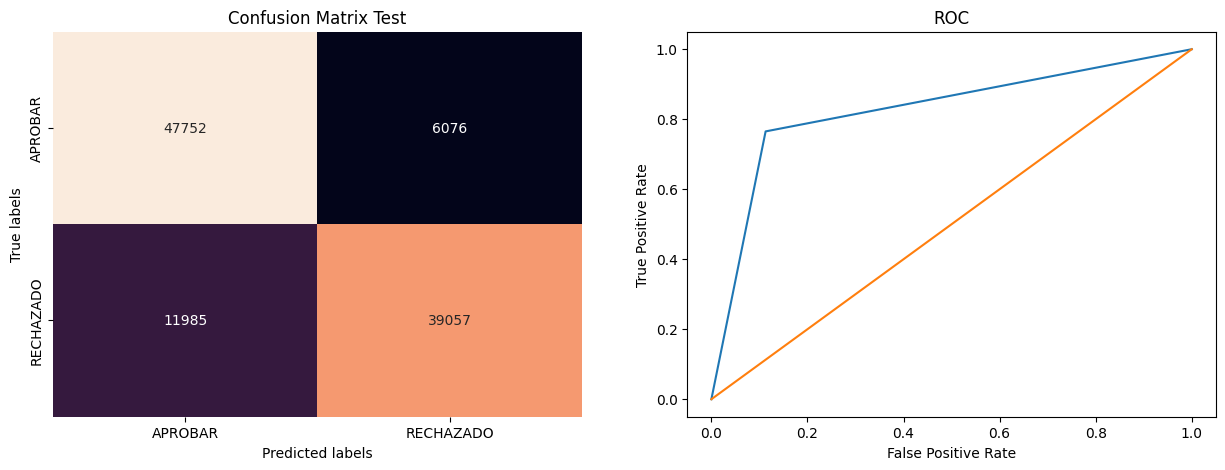

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

In [ ]:
model1= sm.Logit(y_train_upS, X_train_upS) # Definir el modelo
answer= model1.fit() #fit hacer el entrenamiento del modelo
#summarize the model
# Resumen de variables, enfocarnos en 2 columnas:
# - coef  --> Coeficientes
# - P>|z| --> PValor --> Indica si la variables significativa o no respecto al modelo. Es significativa cuando es < 0.05
answer.summary()

Optimization terminated successfully.
         Current function value: 0.425076
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     desi_final_cda_encoding   No. Observations:               244694
Model:                               Logit   Df Residuals:                   244673
Method:                                MLE   Df Model:                           20
Date:                     Mon, 01 Jul 2024   Pseudo R-squ.:                  0.3864
Time:                             03:48:16   Log-Likelihood:            -1.0401e+05
converged:                            True   LL-Null:                   -1.6952e+05
Covariance Type:                 nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
LINEA_ASIG                    -1.3705      0.007   -195.513      0.000      -1.384      -1.357
antiguedad_laboral            -0.1464      0.006    -24.650      0.000      -0.158      -0.135
edad                          -0.0276      0.006     -4.365      0.000      -0.040      -0.015
ingreso                        0.1159      0.006     20.064      0.000       0.105       0.127
frec_compra_spsa_12m          -0.0900      0.008    -11.589      0.000      -0.105      -0.075
prom_imp_spsa_12m             -0.4183      0.010    -39.934      0.000      -0.439      -0.398
frec_compra_far_12m           -0.0629      0.008     -7.705      0.000      -0.079      -0.047
prom_imp_far_12m              -0.2266      0.011    -21.544      0.000      -0.247      -0.206
frec_compra_oec_12m           -0.2891      0.007    -39.149      0.000      -0.304      -0.275
prom_imp_oec_12m              -0.5637      0.011    -50.748      0.000      -0.585      -0.542
frec_compra_pro_12m           -0.3492      0.009    -41.000      0.000      -0.366      -0.333
prom_imp_pro_12m              -0.3980      0.010    -41.672      0.000      -0.417      -0.379
estado_civil_encoding         -0.0416      0.005     -8.565      0.000      -0.051      -0.032
sexo_encoding                  0.1057      0.011      9.227      0.000       0.083       0.128
grado_instruccion_encoding    -0.0690      0.005    -13.194      0.000      -0.079      -0.059
tipotrabajador_encoding       -0.0244      0.001    -23.170      0.000      -0.026      -0.022
RFM_Score_spsa                -0.2936      0.013    -23.099      0.000      -0.319      -0.269
RFM_Score_far                 -0.3451      0.013    -26.569      0.000      -0.371      -0.320
RFM_Score_oec                 -0.8150      0.015    -53.116      0.000      -0.845      -0.785
RFM_Score_pro                 -0.5821      0.012    -47.327      0.000      -0.606      -0.558
INTERCEPTO                     5.0701      0.043    117.904      0.000       4.986       5.154
==============================================================================================
"""

In [ ]:
answer.params

LINEA_ASIG                   -1.370534
antiguedad_laboral           -0.146429
edad                         -0.027595
ingreso                       0.115898
frec_compra_spsa_12m         -0.090040
prom_imp_spsa_12m            -0.418262
frec_compra_far_12m          -0.062915
prom_imp_far_12m             -0.226641
frec_compra_oec_12m          -0.289108
prom_imp_oec_12m             -0.563651
frec_compra_pro_12m          -0.349217
prom_imp_pro_12m             -0.398040
estado_civil_encoding        -0.041610
sexo_encoding                 0.105729
grado_instruccion_encoding   -0.069043
tipotrabajador_encoding      -0.024424
RFM_Score_spsa               -0.293595
RFM_Score_far                -0.345147
RFM_Score_oec                -0.814961
RFM_Score_pro                -0.582054
INTERCEPTO                    5.070086
dtype: float64

In [ ]:
LINEA_ASIG_CONST = list(answer.params)[0]
ANTIGUEDAD_LABORAL_CONST =  list(answer.params)[1]
EDAD_CONST = list(answer.params)[2]
INGRESO_ESTIMADO_CONST = list(answer.params)[3]
FREC_COMPRA_SPSA_12M_CONST = list(answer.params)[4]
PROM_IMP_SPSA_12M_CONST = list(answer.params)[5]
FREC_COMPRA_FAR_12M_CONST = list(answer.params)[6]
PROM_IMP_FAR_12M_CONST = list(answer.params)[7]
FREC_COMPRA_OEC_12M_CONST = list(answer.params)[8]
PROM_IMP_OEC_12M_CONST = list(answer.params)[9]
FREC_COMPRA_PRO_12M_CONST = list(answer.params)[10]
PROM_IMP_PRO_12M_CONST = list(answer.params)[11]
ESTADO_CIVIL_CONST = list(answer.params)[12]
SEXO_CONST = list(answer.params)[13]
GRADO_INSTRUCCION_CONST = list(answer.params)[14]
TIPO_TRABAJADOR_CONST = list(answer.params)[15]
RFM_SCORE_SPSA_CONST = list(answer.params)[16]
RFM_SCORE_FAR_CONST  = list(answer.params)[17]
RFM_SCORE_OEC_CONST  = list(answer.params)[18]
RFM_SCORE_PRO_CONST  = list(answer.params)[19]
INTERCEPTO_CONST = list(answer.params)[20]

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     53828
           1       0.90      0.98      0.94     51042

    accuracy                           0.94    104870
   macro avg       0.94      0.94      0.94    104870
weighted avg       0.94      0.94      0.94    104870

AUC ROC :  0.93660848061641


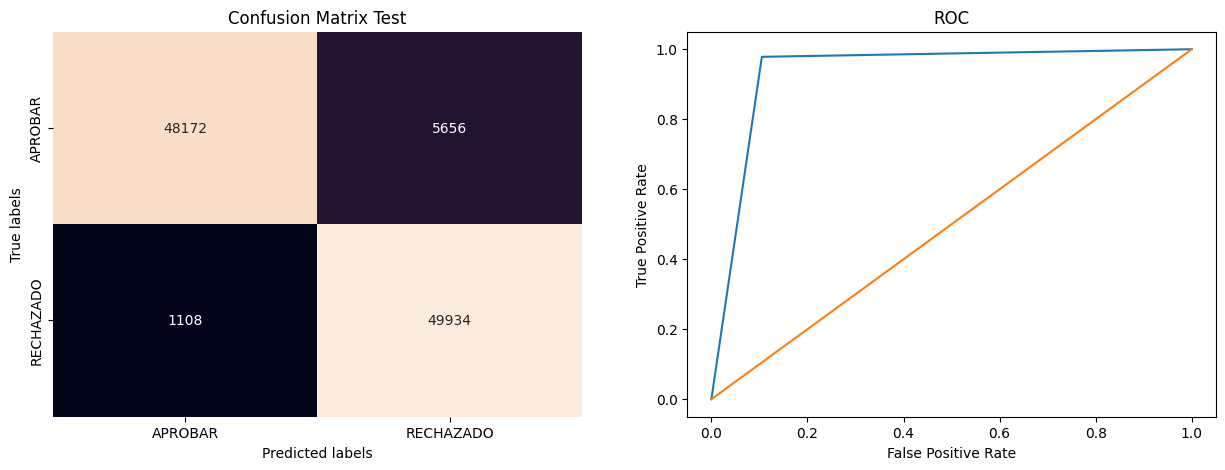

In [ ]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     53828
           1       0.96      0.98      0.97     51042

    accuracy                           0.97    104870
   macro avg       0.97      0.97      0.97    104870
weighted avg       0.97      0.97      0.97    104870

AUC ROC :  0.9692767010597608


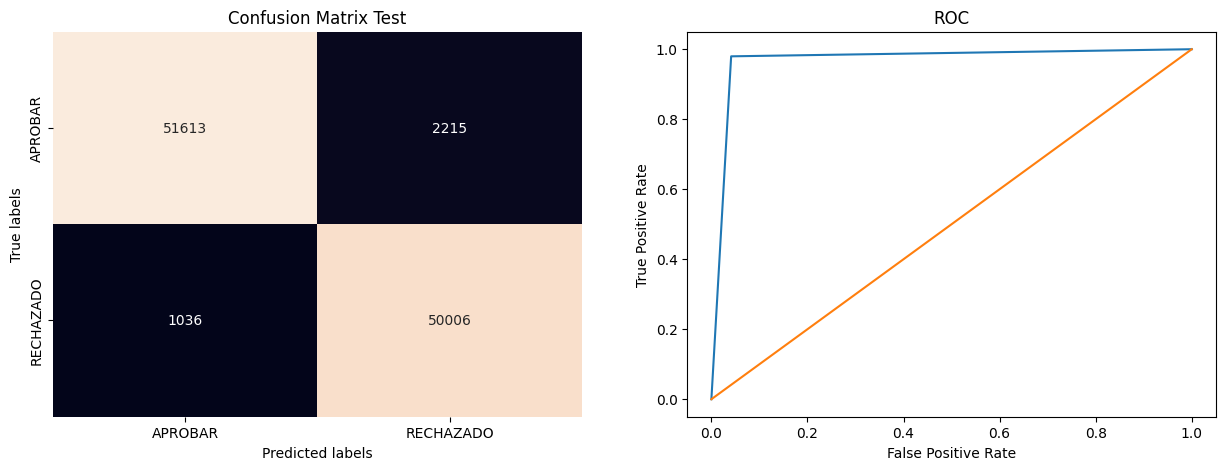

In [ ]:
random_forest = RandomForestClassifier()
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

In [ ]:
data_transacional_prueba = upsample_data_X.copy()

In [ ]:
data_transacional_prueba['INTERCEPTO'] = 1

In [ ]:
data_transacional_prueba.columns

Index(['LINEA_ASIG', 'antiguedad_laboral', 'edad', 'ingreso',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'frec_compra_far_12m',
       'prom_imp_far_12m', 'frec_compra_oec_12m', 'prom_imp_oec_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'estado_civil_encoding',
       'sexo_encoding', 'grado_instruccion_encoding',
       'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro', 'INTERCEPTO'],
      dtype='object')

In [ ]:
random_forest.predict(data_transacional_prueba[['LINEA_ASIG', 'antiguedad_laboral', 'edad', 'ingreso',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'frec_compra_far_12m',
       'prom_imp_far_12m', 'frec_compra_oec_12m', 'prom_imp_oec_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'estado_civil_encoding',
       'sexo_encoding', 'grado_instruccion_encoding',
       'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro', 'INTERCEPTO']])

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
random_forest.predict_proba(data_transacional_prueba[['LINEA_ASIG', 'antiguedad_laboral', 'edad', 'ingreso',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'frec_compra_far_12m',
       'prom_imp_far_12m', 'frec_compra_oec_12m', 'prom_imp_oec_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'estado_civil_encoding',
       'sexo_encoding', 'grado_instruccion_encoding',
       'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro', 'INTERCEPTO']])

array([[0.98, 0.02],
       [0.8 , 0.2 ],
       [0.91, 0.09],
       ...,
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ]])

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     53828
           1       0.92      0.83      0.87     51042

    accuracy                           0.88    104870
   macro avg       0.88      0.88      0.88    104870
weighted avg       0.88      0.88      0.88    104870

AUC ROC :  0.8780859197948548


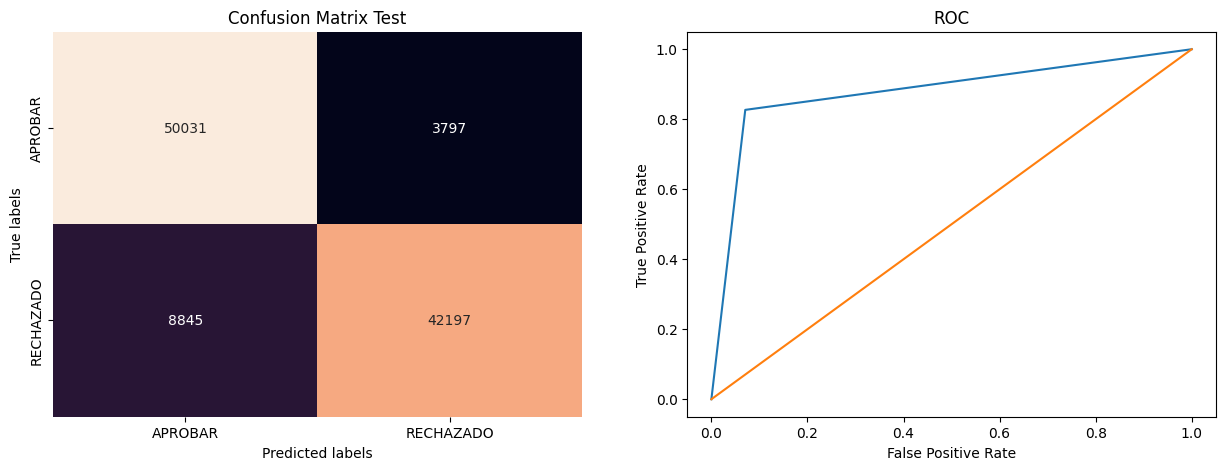

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

### Nueva data de Entrenamiento y Pruebas

In [ ]:
data_transacional_prueba = data_transacional_no_bancarizado.copy()

### Segmentación RFM

In [ ]:
# Copia del df para las ección de RFM
data_RFM_prueba = data_transacional_no_bancarizado.copy()

In [ ]:
data_RFM_prueba

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,prom_imp_spsa_12m,max_fec_compra_far_12m,frec_compra_far_12m,prom_imp_far_12m,max_fec_compra_oec_12m,frec_compra_oec_12m,prom_imp_oec_12m,max_fec_compra_pro_12m,frec_compra_pro_12m,prom_imp_pro_12m
12,19149417610604278668,1200,Rechazar,76,31,Soltero,1.0,1500,1,SECUNDARIA COMPLETA,...,339.385000,2023-07-31,6,32.183333,2023-07-21,1,225.050000,2023-10-03 08:00:00.000000000,0,283.354516
20,19120638069748910909,1200,Aprobar,39,41,Soltero,1.0,1500,2,SECUNDARIA COMPLETA,...,584.098750,2023-03-25,7,58.271429,2022-07-31,1,9.900000,2023-08-28 00:00:00.000000000,0,283.354516
33,19149418409058399368,1200,Aprobar,36,29,Soltero,1.0,1500,2,SECUNDARIA INCOMPLETA,...,72.968000,2022-12-28,7,85.085714,2022-12-23,0,358.649747,2023-06-29 16:00:00.000000000,0,283.354516
96,19009400416397730137,1200,Aprobar,404,62,Casado,1.0,2500,2,SUPERIOR COMPLETA,...,296.566667,2023-03-23,6,34.626667,2022-12-23,0,358.649747,2022-08-27 00:00:00.000000000,1,78.900000
120,18145450936888458169,1200,Rechazar,69,62,Soltero,1.0,500,1,SECUNDARIA COMPLETA,...,119.900000,2023-10-02,6,46.116667,2022-12-23,0,358.649747,2023-03-12 04:21:49.090909184,0,283.354516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674292,19009391956592116692,0,Rechazar,0,33,Soltero,1.0,500,1,SECUNDARIA COMPLETA,...,202.802000,2022-10-18,4,31.205000,2022-12-23,0,358.649747,2023-08-01 12:00:00.000000000,0,283.354516
674328,19149419833768513439,1850,Aprobar,24,26,Soltero,1.0,1500,1,SECUNDARIA INCOMPLETA,...,25.700000,2023-09-27,8,37.240000,2022-12-23,0,358.649747,2023-06-27 12:00:00.000000000,0,283.354516
674337,19149417355359083214,1200,Aprobar,172,47,Soltero,1.0,1500,2,SUPERIOR COMPLETA,...,69.978000,2023-03-27,11,156.271818,2023-03-20,3,1119.500000,2023-03-03 12:00:00.000000000,0,283.354516
674367,19009396063970696546,1200,Rechazar,55,43,Soltero,1.0,5500,1,SECUNDARIA COMPLETA,...,100.710000,2022-08-20,1,12.500000,2022-12-23,0,358.649747,2023-05-05 00:00:00.000000000,0,283.354516


In [ ]:
# Segmentación RFM

#Elección de variables del dataframe transacional
data_RFM_df_prueba = data_RFM_prueba[[
                                            'ID_DOC',
                                            'max_fec_compra_spsa_12m',
                                            'frec_compra_spsa_12m',
                                            'prom_imp_spsa_12m',

                                            'max_fec_compra_far_12m',
                                            'frec_compra_far_12m',
                                            'prom_imp_far_12m',

                                            'max_fec_compra_oec_12m',
                                            'frec_compra_oec_12m',
                                            'prom_imp_oec_12m',

                                            'max_fec_compra_pro_12m',
                                            'frec_compra_pro_12m',
                                            'prom_imp_pro_12m'

                                            ]]

##Calculando la recencia

In [ ]:
#Calculando la recencia
df_recency_prueba = data_RFM_df_prueba.groupby('ID_DOC').agg({
    'max_fec_compra_spsa_12m': 'max',
    'max_fec_compra_far_12m': 'max',
    'max_fec_compra_oec_12m': 'max',
    'max_fec_compra_pro_12m': 'max'
}).reset_index()

for column in data_RFM_df_prueba.columns:
  if column.startswith('max_fec_compra'):
    max_date = data_RFM_df_prueba[column].max()
    prefix = column.split('_')[3]  # Obtener el prefijo de la columna
    # Recency
    columna_ultima_compra = 'ultima_compra_' + prefix
    df_recency_prueba[columna_ultima_compra] = max_date
    df_recency_prueba[columna_ultima_compra] = pd.to_datetime(df_recency_prueba[columna_ultima_compra])
    data_RFM_df_prueba[column] = pd.to_datetime(data_RFM_df_prueba[column])
    columna_recency = 'R_' + prefix
    df_recency_prueba[columna_recency] = (df_recency_prueba[columna_ultima_compra] - df_recency_prueba[column]).dt.days


<ipython-input-390-58a6ed527f15>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_RFM_df_prueba[column] = pd.to_datetime(data_RFM_df_prueba[column])
<ipython-input-390-58a6ed527f15>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_RFM_df_prueba[column] = pd.to_datetime(data_RFM_df_prueba[column])
<ipython-input-390-58a6ed527f15>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
df_recency_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20431 entries, 0 to 20430
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_DOC                   20431 non-null  object        
 1   max_fec_compra_spsa_12m  20431 non-null  datetime64[ns]
 2   max_fec_compra_far_12m   20431 non-null  datetime64[ns]
 3   max_fec_compra_oec_12m   20431 non-null  datetime64[ns]
 4   max_fec_compra_pro_12m   20431 non-null  datetime64[ns]
 5   ultima_compra_spsa       20431 non-null  datetime64[ns]
 6   R_spsa                   20431 non-null  int64         
 7   ultima_compra_far        20431 non-null  datetime64[ns]
 8   R_far                    20431 non-null  int64         
 9   ultima_compra_oec        20431 non-null  datetime64[ns]
 10  R_oec                    20431 non-null  int64         
 11  ultima_compra_pro        20431 non-null  datetime64[ns]
 12  R_pro                    20431 n

In [ ]:
df_recency_prueba

,ID_DOC,max_fec_compra_spsa_12m,max_fec_compra_far_12m,max_fec_compra_oec_12m,max_fec_compra_pro_12m,ultima_compra_spsa,R_spsa,ultima_compra_far,R_far,ultima_compra_oec,R_oec,ultima_compra_pro,R_pro
0,18145450914167781670,2023-06-24,2022-08-11,2022-12-23,2022-10-26 12:00:00.000000000,2023-12-31,190,2023-12-31,507,2023-12-31,373,2023-12-31,430
1,18145450916877343619,2023-04-28,2023-03-02,2023-02-24,2022-11-05 00:00:00.000000000,2023-12-31,247,2023-12-31,304,2023-12-31,310,2023-12-31,421
2,18145450929562572822,2023-03-10,2023-03-21,2022-12-23,2023-03-18 01:36:00.000000000,2023-12-31,296,2023-12-31,285,2023-12-31,373,2023-12-31,287
3,18145450933505125590,2023-04-04,2023-04-07,2022-12-23,2023-06-30 12:00:00.000000000,2023-12-31,271,2023-12-31,268,2023-12-31,373,2023-12-31,183
4,18145450936688748004,2023-11-24,2023-12-18,2023-02-03,2023-12-08 00:00:00.000000000,2023-12-31,37,2023-12-31,13,2023-12-31,331,2023-12-31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20426,23142373637801080438,2023-12-13,2023-10-14,2022-12-23,2023-06-02 12:00:00.000000000,2023-12-31,18,2023-12-31,78,2023-12-31,373,2023-12-31,211
20427,23142373729049110963,2023-10-26,2023-09-18,2022-12-23,2023-04-18 00:00:00.000000000,2023-12-31,66,2023-12-31,104,2023-12-31,373,2023-12-31,257
20428,23142373734800773325,2023-06-19,2023-05-15,2022-12-23,2023-08-22 03:25:42.857142784,2023-12-31,195,2023-12-31,230,2023-12-31,373,2023-12-31,130
20429,23142373743985384422,2023-07-21,2023-09-08,2022-12-23,2023-02-07 00:00:00.000000000,2023-12-31,163,2023-12-31,114,2023-12-31,373,2023-12-31,327


## Calculando la frecuencia

In [ ]:
#Calculando la frecuencia

df_frequency_prueba = data_RFM_df_prueba.groupby('ID_DOC').agg({
    'frec_compra_spsa_12m': 'sum',
    'frec_compra_far_12m': 'sum',
    'frec_compra_oec_12m': 'sum',
    'frec_compra_pro_12m': 'sum'
}).reset_index()

df_frequency_prueba  = df_frequency_prueba.rename(columns={'frec_compra_spsa_12m': 'F_spsa', 'frec_compra_far_12m': 'F_far', 'frec_compra_oec_12m': 'F_oec', 'frec_compra_pro_12m': 'F_pro'})


In [ ]:
df_frequency_prueba

,ID_DOC,F_spsa,F_far,F_oec,F_pro
0,18145450914167781670,4,1,0,0
1,18145450916877343619,9,1,1,2
2,18145450929562572822,4,6,0,0
3,18145450933505125590,10,7,0,0
4,18145450936688748004,9,12,1,3
...,...,...,...,...,...
20426,23142373637801080438,1,1,0,0
20427,23142373729049110963,1,2,0,0
20428,23142373734800773325,1,1,0,0
20429,23142373743985384422,1,6,0,0


## Calculando el valor monetario

In [ ]:
#Calculando el valor monetario

df_monetary_prueba = data_RFM_df_prueba.groupby('ID_DOC').agg({
    'prom_imp_spsa_12m': 'sum',
    'prom_imp_far_12m': 'sum',
    'prom_imp_oec_12m': 'sum',
    'prom_imp_pro_12m': 'sum'
}).reset_index()

df_monetary_prueba = df_monetary_prueba.rename(columns={'prom_imp_spsa_12m': 'M_spsa', 'prom_imp_far_12m': 'M_far', 'prom_imp_oec_12m': 'M_oec', 'prom_imp_pro_12m': 'M_pro'})


In [ ]:
df_monetary_prueba

,ID_DOC,M_spsa,M_far,M_oec,M_pro
0,18145450914167781670,35.462500,11.630000,358.649747,283.354516
1,18145450916877343619,169.726667,40.400000,24.950000,26.350000
2,18145450929562572822,309.182500,85.023333,358.649747,283.354516
3,18145450933505125590,158.424000,78.492857,358.649747,283.354516
4,18145450936688748004,149.622222,106.850833,19.900000,83.103333
...,...,...,...,...,...
20426,23142373637801080438,2198.000000,9.900000,358.649747,283.354516
20427,23142373729049110963,701.900000,23.050000,358.649747,283.354516
20428,23142373734800773325,1499.000000,100.500000,358.649747,283.354516
20429,23142373743985384422,21.200000,165.433333,358.649747,283.354516


## Uniendo RFM

In [ ]:
#Uniendo los dataframes df_recency, df_frequency y df_monetary

rf_df_prueba = df_recency_prueba[['ID_DOC', 'R_spsa', 'R_far', 'R_oec', 'R_pro']].merge(df_frequency_prueba, on='ID_DOC')
rfm_df_prueba = rf_df_prueba.merge(df_monetary_prueba, on='ID_DOC')
rfm_df_prueba.head()


,ID_DOC,R_spsa,R_far,R_oec,R_pro,F_spsa,F_far,F_oec,F_pro,M_spsa,M_far,M_oec,M_pro
0,18145450914167781670,190,507,373,430,4,1,0,0,35.462500,11.630000,358.649747,283.354516
1,18145450916877343619,247,304,310,421,9,1,1,2,169.726667,40.400000,24.950000,26.350000
2,18145450929562572822,296,285,373,287,4,6,0,0,309.182500,85.023333,358.649747,283.354516
3,18145450933505125590,271,268,373,183,10,7,0,0,158.424000,78.492857,358.649747,283.354516
4,18145450936688748004,37,13,331,23,9,12,1,3,149.622222,106.850833,19.900000,83.103333


In [ ]:
#Data para RFM Global
rfm_df_global_prueba = rfm_df_prueba.copy()

In [ ]:
rfm_df_global_prueba.head()

,ID_DOC,R_spsa,R_far,R_oec,R_pro,F_spsa,F_far,F_oec,F_pro,M_spsa,M_far,M_oec,M_pro
0,18145450914167781670,190,507,373,430,4,1,0,0,35.462500,11.630000,358.649747,283.354516
1,18145450916877343619,247,304,310,421,9,1,1,2,169.726667,40.400000,24.950000,26.350000
2,18145450929562572822,296,285,373,287,4,6,0,0,309.182500,85.023333,358.649747,283.354516
3,18145450933505125590,271,268,373,183,10,7,0,0,158.424000,78.492857,358.649747,283.354516
4,18145450936688748004,37,13,331,23,9,12,1,3,149.622222,106.850833,19.900000,83.103333


## Rankiando RFM

In [ ]:
#Rankiando el ID_DOC en base al RFM

#Crear nuevas columnas con rank
for col in rfm_df_prueba.columns[1:]:
  if col.find('_', 2):
    #Crear nuevas columnas con rank
    rfm_df_prueba[col + '_rank'] = rfm_df_prueba[col].rank(ascending=False)
    #Crear nuevas columnas con rank normalizado
    rank_col = col + '_rank'
    rfm_df_prueba[col + '_rank_norm'] = (rfm_df_prueba[rank_col] / rfm_df_prueba[rank_col].max()) * 100

#Eliminar las columnas
cols_to_drop = [col for col in rfm_df_prueba.columns if col.endswith('_rank')]
rfm_df_prueba.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
rfm_df_prueba.head(10)


,ID_DOC,R_spsa,R_far,R_oec,R_pro,F_spsa,F_far,F_oec,F_pro,M_spsa,...,R_oec_rank_norm,R_pro_rank_norm,F_spsa_rank_norm,F_far_rank_norm,F_oec_rank_norm,F_pro_rank_norm,M_spsa_rank_norm,M_far_rank_norm,M_oec_rank_norm,M_pro_rank_norm
0,18145450914167781670,190,507,373,430,4,1,0,0,35.462500,...,42.207697,11.657162,58.553421,93.584157,100.00000,100.000000,89.065636,92.374333,39.315256,42.083109
1,18145450916877343619,247,304,310,421,9,1,1,2,169.726667,...,81.139835,12.983676,21.522457,93.584157,38.83446,21.632259,40.624541,60.985757,97.824385,95.215604
2,18145450929562572822,296,285,373,287,4,6,0,0,309.182500,...,42.207697,50.488265,58.553421,48.377068,100.00000,100.000000,19.328471,30.762077,39.315256,42.083109
3,18145450933505125590,271,268,373,183,10,7,0,0,158.424000,...,42.207697,81.624611,15.824257,41.097131,100.00000,100.000000,43.463364,33.816260,39.315256,42.083109
4,18145450936688748004,37,13,331,23,9,12,1,3,149.622222,...,79.323345,99.495827,21.522457,5.904240,38.83446,13.188772,45.700162,22.735059,98.340757,86.393226
5,18145450936888458169,351,90,373,293,1,6,0,0,119.900000,...,42.207697,47.881740,92.385265,48.377068,100.00000,100.000000,54.632666,55.709461,39.315256,42.083109
6,18145450939091949918,102,155,363,139,3,6,1,0,94.676667,...,75.905797,89.703615,68.114062,48.377068,38.83446,100.000000,63.907787,41.706231,76.547893,42.083109
7,18145450941020381475,225,244,373,355,2,5,0,0,289.130000,...,42.207697,26.914511,78.913230,55.906688,100.00000,100.000000,21.291175,25.045274,39.315256,42.083109
8,18145450942694992805,205,186,373,199,9,10,0,1,109.861111,...,42.207697,78.137008,21.522457,20.579164,100.00000,37.672657,58.210562,30.301992,39.315256,7.351574
9,18145450943810283708,332,518,403,434,7,2,1,2,121.725714,...,6.844888,11.157884,34.265084,82.145305,38.83446,21.632259,54.079585,49.938818,95.311047,7.929127


## Puntuación RFM


In [ ]:
#Calculating la puntuación RFM

#Creación de las columnas RFM por cada comercio
for c in ['spsa', 'far', 'oec', 'pro']:

  rfm_df_prueba[f'RFM_Score_{c}'] = 0.15 * rfm_df_prueba[f'R_{c}_rank_norm'] + 0.28 * rfm_df_prueba[f'F_{c}_rank_norm'] + 0.57 * rfm_df_prueba[f'M_{c}_rank_norm']

  rfm_df_prueba[f'RFM_Score_{c}'] *= 0.05

RFM_Score_prueba = rfm_df_prueba[['ID_DOC', 'RFM_Score_spsa', 'RFM_Score_far', 'RFM_Score_oec', 'RFM_Score_pro']]

print(RFM_Score_prueba.head(5))

                 ID_DOC  RFM_Score_spsa  RFM_Score_far  RFM_Score_oec  \
0  18145450914167781670        3.895225       3.963755       2.837043   
1  18145450916877343619        1.932209       3.279196       3.940226   
2  18145450929562572822        1.590069       1.858356       2.837043   
3  18145450933505125590        1.838428       1.948755       2.837043   
4  18145450936688748004        2.314442       1.469548       3.941319   

   RFM_Score_pro  
0       2.686797  
1       3.113874  
2       2.978031  
3       3.211553  
4       3.393068  


In [ ]:
df_rfm_g_prueba = rfm_df_prueba[['ID_DOC',
 'RFM_Score_spsa',
 'RFM_Score_far',
 'RFM_Score_oec',
 'RFM_Score_pro']]

In [ ]:
data_transacional_prueba = data_transacional_no_bancarizado.merge(df_rfm_g_prueba , on='ID_DOC')

In [ ]:
data_transacional_prueba.columns

Index(['ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'antiguedad_laboral', 'edad',
       'estado_civil', 'flag_nobancariza', 'ingreso', 'sexo',
       'grado_instruccion', 'tipotrabajador', 'max_fec_compra_spsa_12m',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'max_fec_compra_far_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'max_fec_compra_oec_12m',
       'frec_compra_oec_12m', 'prom_imp_oec_12m', 'max_fec_compra_pro_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'RFM_Score_spsa',
       'RFM_Score_far', 'RFM_Score_oec', 'RFM_Score_pro'],
      dtype='object')

In [ ]:
data_t_v_prueba = ['LINEA_ASIG', 'antiguedad_laboral', 'edad', 'ingreso','frec_compra_spsa_12m', 'prom_imp_spsa_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'frec_compra_oec_12m', 'prom_imp_oec_12m', 'frec_compra_pro_12m', 'prom_imp_pro_12m',
       'estado_civil_encoding', 'sexo_encoding', 'grado_instruccion_encoding', 'tipotrabajador_encoding', 'RFM_Score_spsa', 'RFM_Score_far',
       'RFM_Score_oec', 'RFM_Score_pro']

In [ ]:
data_transacional_prueba.head()

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,max_fec_compra_oec_12m,frec_compra_oec_12m,prom_imp_oec_12m,max_fec_compra_pro_12m,frec_compra_pro_12m,prom_imp_pro_12m,RFM_Score_spsa,RFM_Score_far,RFM_Score_oec,RFM_Score_pro
0,19149417610604278668,1200,Rechazar,76,31,Soltero,1.0,1500,1,SECUNDARIA COMPLETA,...,2023-07-21,1,225.050000,2023-10-03 08:00:00.000000000,0,283.354516,1.636928,3.253402,3.383742,3.317301
1,19120638069748910909,1200,Aprobar,39,41,Soltero,1.0,1500,2,SECUNDARIA COMPLETA,...,2022-07-31,1,9.900000,2023-08-28 00:00:00.000000000,0,283.354516,0.954446,2.221372,3.381391,3.286867
2,19149418409058399368,1200,Aprobar,36,29,Soltero,1.0,1500,2,SECUNDARIA INCOMPLETA,...,2022-12-23,0,358.649747,2023-06-29 16:00:00.000000000,0,283.354516,2.909792,1.541579,2.837043,3.210030
3,19009400416397730137,1200,Aprobar,404,62,Casado,1.0,2500,2,SUPERIOR COMPLETA,...,2022-12-23,0,358.649747,2022-08-27 00:00:00.000000000,1,78.900000,1.002684,2.894347,2.837043,3.047161
4,18145450936888458169,1200,Rechazar,69,62,Soltero,1.0,500,1,SECUNDARIA COMPLETA,...,2022-12-23,0,358.649747,2023-03-12 04:21:49.090909184,0,283.354516,2.949348,2.938606,2.837043,2.958482


In [ ]:
data_transacional_prueba.columns

Index(['ID_DOC', 'LINEA_ASIG', 'desi_final_cda', 'antiguedad_laboral', 'edad',
       'estado_civil', 'flag_nobancariza', 'ingreso', 'sexo',
       'grado_instruccion', 'tipotrabajador', 'max_fec_compra_spsa_12m',
       'frec_compra_spsa_12m', 'prom_imp_spsa_12m', 'max_fec_compra_far_12m',
       'frec_compra_far_12m', 'prom_imp_far_12m', 'max_fec_compra_oec_12m',
       'frec_compra_oec_12m', 'prom_imp_oec_12m', 'max_fec_compra_pro_12m',
       'frec_compra_pro_12m', 'prom_imp_pro_12m', 'RFM_Score_spsa',
       'RFM_Score_far', 'RFM_Score_oec', 'RFM_Score_pro'],
      dtype='object')

In [ ]:
# Label encoding
data_transacional_prueba['desi_final_cda_encoding'] = encoder.fit_transform(data_transacional_prueba['desi_final_cda'])
data_transacional_prueba['estado_civil_encoding'] = encoder.fit_transform(data_transacional_prueba['estado_civil'])
data_transacional_prueba['sexo_encoding'] = encoder.fit_transform(data_transacional_prueba['sexo'])
data_transacional_prueba['grado_instruccion_encoding'] = encoder.fit_transform(data_transacional_prueba['grado_instruccion'])
data_transacional_prueba['tipotrabajador_encoding'] = encoder.fit_transform(data_transacional_prueba['tipotrabajador'])

In [ ]:
data_transacional_prueba['LINEA_ASIG'] = scaler.fit_transform(data_transacional_prueba['LINEA_ASIG'].values.reshape(-1, 1))
data_transacional_prueba['ingreso'] = scaler.fit_transform(data_transacional_prueba['ingreso'].values.reshape(-1, 1))
data_transacional_prueba['antiguedad_laboral'] = scaler.fit_transform(data_transacional_prueba['antiguedad_laboral'].values.reshape(-1, 1))
data_transacional_prueba['edad'] = scaler.fit_transform(data_transacional_prueba['edad'].values.reshape(-1, 1))
data_transacional_prueba['frec_compra_spsa_12m'] = scaler.fit_transform(data_transacional_prueba['frec_compra_spsa_12m'].values.reshape(-1, 1))
data_transacional_prueba['prom_imp_spsa_12m'] = scaler.fit_transform(data_transacional_prueba['prom_imp_spsa_12m'].values.reshape(-1, 1))
data_transacional_prueba['frec_compra_far_12m'] = scaler.fit_transform(data_transacional_prueba['frec_compra_far_12m'].values.reshape(-1, 1))
data_transacional_prueba['prom_imp_far_12m'] = scaler.fit_transform(data_transacional_prueba['prom_imp_far_12m'].values.reshape(-1, 1))
data_transacional_prueba['frec_compra_oec_12m'] = scaler.fit_transform(data_transacional_prueba['frec_compra_oec_12m'].values.reshape(-1, 1))
data_transacional_prueba['prom_imp_oec_12m'] = scaler.fit_transform(data_transacional_prueba['prom_imp_oec_12m'].values.reshape(-1, 1))
data_transacional_prueba['frec_compra_pro_12m'] = scaler.fit_transform(data_transacional_prueba['frec_compra_pro_12m'].values.reshape(-1, 1))
data_transacional_prueba['prom_imp_pro_12m'] = scaler.fit_transform(data_transacional_prueba['prom_imp_pro_12m'].values.reshape(-1, 1))

In [ ]:
#CAMBIAR FORMATO
data_transacional_prueba['LINEA_ASIG'] = data_transacional_prueba['LINEA_ASIG'].astype(str)
data_transacional_prueba['antiguedad_laboral'] = data_transacional_prueba['antiguedad_laboral'].astype(str)
data_transacional_prueba['edad'] = data_transacional_prueba['edad'].astype(str)
data_transacional_prueba['estado_civil_encoding'] = data_transacional_prueba['estado_civil_encoding'].astype(str)
data_transacional_prueba['ingreso'] = data_transacional_prueba['ingreso'].astype(str)
data_transacional_prueba['sexo_encoding'] = data_transacional_prueba['sexo_encoding'].astype(str)
data_transacional_prueba['grado_instruccion_encoding'] = data_transacional_prueba['grado_instruccion_encoding'].astype(str)
data_transacional_prueba['tipotrabajador_encoding'] = data_transacional_prueba['tipotrabajador_encoding'].astype(str)
data_transacional_prueba['frec_compra_spsa_12m'] = data_transacional_prueba['frec_compra_spsa_12m'].astype(str)
data_transacional_prueba['prom_imp_spsa_12m'] = data_transacional_prueba['prom_imp_spsa_12m'].astype(str)
data_transacional_prueba['frec_compra_far_12m'] = data_transacional_prueba['frec_compra_far_12m'].astype(str)
data_transacional_prueba['prom_imp_far_12m'] = data_transacional_prueba['prom_imp_far_12m'].astype(str)
data_transacional_prueba['frec_compra_oec_12m'] = data_transacional_prueba['frec_compra_oec_12m'].astype(str)
data_transacional_prueba['prom_imp_oec_12m'] = data_transacional_prueba['prom_imp_oec_12m'].astype(str)
data_transacional_prueba['frec_compra_pro_12m'] = data_transacional_prueba['frec_compra_pro_12m'].astype(str)
data_transacional_prueba['prom_imp_pro_12m'] = data_transacional_prueba['prom_imp_pro_12m'].astype(str)
data_transacional_prueba['RFM_Score_spsa'] = data_transacional_prueba['RFM_Score_spsa'].astype(str)
data_transacional_prueba['RFM_Score_far'] = data_transacional_prueba['RFM_Score_far'].astype(str)
data_transacional_prueba['RFM_Score_oec'] = data_transacional_prueba['RFM_Score_oec'].astype(str)
data_transacional_prueba['RFM_Score_pro'] = data_transacional_prueba['RFM_Score_pro'].astype(str)


In [ ]:
#BUCLE DE PREDICCION
PREDICCION_LISTA = []
DESCRIPCION_LISTA = []
for CORRE in list(data_transacional_prueba['LINEA_ASIG']  + '_' +  data_transacional_prueba['antiguedad_laboral'] + '_' + data_transacional_prueba['edad'] + '_' + data_transacional_prueba['estado_civil_encoding'] + '_' + data_transacional_prueba['ingreso'] + '_' + data_transacional_prueba['sexo_encoding'] + '_' + data_transacional_prueba['grado_instruccion_encoding'] + '_' + data_transacional_prueba['tipotrabajador_encoding'] + '_' + data_transacional_prueba['frec_compra_spsa_12m']   + '_' +  data_transacional_prueba['prom_imp_spsa_12m']  + '_' +  data_transacional_prueba['frec_compra_far_12m'] + '_' + data_transacional_prueba['prom_imp_far_12m'] + '_' + data_transacional_prueba['frec_compra_oec_12m'] + '_' + data_transacional_prueba['prom_imp_oec_12m'] + '_' + data_transacional_prueba['frec_compra_pro_12m'] + '_' + data_transacional_prueba['prom_imp_pro_12m'] + '_' + data_transacional_prueba['RFM_Score_spsa'] + '_' + data_transacional_prueba['RFM_Score_far'] + '_' + data_transacional_prueba['RFM_Score_oec'] + '_' + data_transacional_prueba['RFM_Score_pro']):
  LINEA_ASIG = float(CORRE.split('_')[0])
  ANTIGUEDAD_LABORAL = float(CORRE.split('_')[1])
  EDAD = float(CORRE.split('_')[2])
  INGRESO_ESTIMADO = float(CORRE.split('_')[3])
  FREC_COMPRA_SPSA_12M = float(CORRE.split('_')[4])
  PROM_IMP_SPSA_12M = float(CORRE.split('_')[5])
  FREC_COMPRA_FAR_12M  = float(CORRE.split('_')[6])
  PROM_IMP_FAR_12M = float(CORRE.split('_')[7])
  FREC_COMPRA_OEC_12M = float(CORRE.split('_')[8])
  PROM_IMP_OEC_12M = float(CORRE.split('_')[9])
  FREC_COMPRA_PRO_12M = float(CORRE.split('_')[10])
  PROM_IMP_PRO_12M = float(CORRE.split('_')[11])
  ESTADO_CIVIL = float(CORRE.split('_')[12])
  SEXO = float(CORRE.split('_')[13])
  GRADO_INSTRUCCION = float(CORRE.split('_')[14])
  RFM_SCORE_SPSA = float(CORRE.split('_')[15])
  RFM_SCORE_FAR  = float(CORRE.split('_')[16])
  RFM_SCORE_OEC  = float(CORRE.split('_')[17])
  RFM_SCORE_PRO  = float(CORRE.split('_')[18])
  TIPO_TRABAJADOR = float(CORRE.split('_')[19])

  #FUNCIÓN DE LA REGRESION LOGISTICA
  A = INTERCEPTO_CONST
  B = LINEA_ASIG_CONST * LINEA_ASIG
  C = ANTIGUEDAD_LABORAL_CONST * ANTIGUEDAD_LABORAL
  D = EDAD_CONST * EDAD
  E = INGRESO_ESTIMADO_CONST * INGRESO_ESTIMADO
  F = FREC_COMPRA_SPSA_12M_CONST * FREC_COMPRA_SPSA_12M
  G = PROM_IMP_SPSA_12M_CONST * PROM_IMP_SPSA_12M
  H = FREC_COMPRA_FAR_12M_CONST * FREC_COMPRA_FAR_12M
  I = PROM_IMP_FAR_12M_CONST * PROM_IMP_FAR_12M
  J = FREC_COMPRA_OEC_12M_CONST * FREC_COMPRA_OEC_12M
  K = PROM_IMP_OEC_12M_CONST * PROM_IMP_OEC_12M
  L = FREC_COMPRA_PRO_12M_CONST * FREC_COMPRA_PRO_12M
  M = PROM_IMP_PRO_12M_CONST * PROM_IMP_PRO_12M
  N = ESTADO_CIVIL_CONST * ESTADO_CIVIL
  O = SEXO_CONST * SEXO
  P = GRADO_INSTRUCCION_CONST * GRADO_INSTRUCCION
  Q = RFM_SCORE_SPSA_CONST * RFM_SCORE_SPSA
  R = RFM_SCORE_FAR_CONST * RFM_SCORE_FAR
  S = RFM_SCORE_OEC_CONST * RFM_SCORE_OEC
  T = RFM_SCORE_PRO_CONST * RFM_SCORE_PRO
  U = TIPO_TRABAJADOR_CONST * TIPO_TRABAJADOR

  RECIBE_BENEFICIO = A + B + C + D + E + F + G + H + I + J + K + L + M + N + O + P + Q + R + S + T + U

  PREDICCION = np.exp(RECIBE_BENEFICIO) / (1+ np.exp(RECIBE_BENEFICIO))
  PREDICCION_LISTA.append(PREDICCION)

  if PREDICCION <= 1 and PREDICCION >= 0.7:
    DESCRIPCION_LISTA.append('Riesgo Alto')
  elif  PREDICCION >= 0.4 and PREDICCION < 0.7:
    DESCRIPCION_LISTA.append('Riesgo Medio')
  elif PREDICCION < 0.4 :
    DESCRIPCION_LISTA.append('Riesgo Bajo')





In [ ]:

#  if PREDICCION = 0 and PREDICCION <= 0.4:
#    DESCRIPCION_LISTA.append('BRONCE')
#  elif  PREDICCION > 0.4 and PREDICCION <= 0.7:
#    DESCRIPCION_LISTA.append('PLATA')
#  elif PREDICCION > 0.7 :
#    DESCRIPCION_LISTA.append('ORO')

In [ ]:
data_transacional_prueba.head()

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,prom_imp_pro_12m,RFM_Score_spsa,RFM_Score_far,RFM_Score_oec,RFM_Score_pro,desi_final_cda_encoding,estado_civil_encoding,sexo_encoding,grado_instruccion_encoding,tipotrabajador_encoding
0,19149417610604278668,0.26632795504143114,Rechazar,-0.03074744754940936,-0.6392807584581878,Soltero,1.0,-0.009738775106974882,1,SECUNDARIA COMPLETA,...,0.10741646087965108,1.6369283335948304,3.2534019140692303,3.383742486994718,3.317301008203344,1,4,0,4,3
1,19120638069748910909,0.26632795504143114,Aprobar,-0.10731821425849128,0.14991725243805556,Soltero,1.0,-0.009738775106974882,2,SECUNDARIA COMPLETA,...,0.10741646087965108,0.9544459155333707,2.2213723330452075,3.3813912551522627,3.2868670768785435,0,4,1,4,15
2,19149418409058399368,0.26632795504143114,Aprobar,-0.1135266548024709,-0.7971203606374365,Soltero,1.0,-0.009738775106974882,2,SECUNDARIA INCOMPLETA,...,0.10741646087965108,2.909792365756821,1.5415793913924807,2.837042528710461,3.210029660397475,0,4,1,5,3
3,19009400416397730137,0.26632795504143114,Aprobar,0.6480420519256952,1.8072330753201666,Casado,1.0,-0.00267702569744903,2,SUPERIOR COMPLETA,...,-0.8767371526079875,1.0026835360806832,2.894346783826994,2.837042528710461,3.0471611725396155,0,0,1,6,3
4,18145450936888458169,0.26632795504143114,Rechazar,-0.045233808818695126,1.8072330753201666,Soltero,1.0,-0.016800524516500735,1,SECUNDARIA COMPLETA,...,0.10741646087965108,2.9493480252878945,2.9386059684872237,2.837042528710461,2.9584816538383323,1,4,0,4,3


In [ ]:
#GENERA NUEVAS COLUMNAS
data_transacional_prueba['PREDICCION'] = PREDICCION_LISTA
data_transacional_prueba['DESCRIPCION'] = DESCRIPCION_LISTA
data_transacional_prueba

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,RFM_Score_far,RFM_Score_oec,RFM_Score_pro,desi_final_cda_encoding,estado_civil_encoding,sexo_encoding,grado_instruccion_encoding,tipotrabajador_encoding,PREDICCION,DESCRIPCION
0,19149417610604278668,0.26632795504143114,Rechazar,-0.03074744754940936,-0.6392807584581878,Soltero,1.0,-0.009738775106974882,1,SECUNDARIA COMPLETA,...,3.2534019140692303,3.383742486994718,3.317301008203344,1,4,0,4,3,0.254943,Riesgo Bajo
1,19120638069748910909,0.26632795504143114,Aprobar,-0.10731821425849128,0.14991725243805556,Soltero,1.0,-0.009738775106974882,2,SECUNDARIA COMPLETA,...,2.2213723330452075,3.3813912551522627,3.2868670768785435,0,4,1,4,15,0.020126,Riesgo Bajo
2,19149418409058399368,0.26632795504143114,Aprobar,-0.1135266548024709,-0.7971203606374365,Soltero,1.0,-0.009738775106974882,2,SECUNDARIA INCOMPLETA,...,1.5415793913924807,2.837042528710461,3.210029660397475,0,4,1,5,3,0.493549,Riesgo Medio
3,19009400416397730137,0.26632795504143114,Aprobar,0.6480420519256952,1.8072330753201666,Casado,1.0,-0.00267702569744903,2,SUPERIOR COMPLETA,...,2.894346783826994,2.837042528710461,3.0471611725396155,0,0,1,6,3,0.176953,Riesgo Bajo
4,18145450936888458169,0.26632795504143114,Rechazar,-0.045233808818695126,1.8072330753201666,Soltero,1.0,-0.016800524516500735,1,SECUNDARIA COMPLETA,...,2.9386059684872237,2.837042528710461,2.9584816538383323,1,4,0,4,3,0.431314,Riesgo Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21044,19009404216688046555,0.26632795504143114,Aprobar,-0.16526365933563436,-0.007922349741193118,Soltero,1.0,-0.013269649811737809,2,SECUNDARIA COMPLETA,...,3.92881370875695,2.837042528710461,3.0510953290329583,0,4,1,4,3,0.226210,Riesgo Bajo
21045,19149419833768513439,1.5539015876248077,Aprobar,-0.13836041697838936,-1.0338797639063095,Soltero,1.0,-0.009738775106974882,1,SECUNDARIA INCOMPLETA,...,2.97111619142189,2.837042528710461,3.2067806822041756,0,4,0,5,3,0.065503,Riesgo Bajo
21046,19149417355359083214,0.26632795504143114,Aprobar,0.16792264985793834,0.6234360589758016,Soltero,1.0,-0.009738775106974882,2,SUPERIOR COMPLETA,...,0.8948264506391607,0.8206043821374686,2.930489045110757,0,4,1,6,3,0.737498,Riesgo Alto
21047,19009396063970696546,0.26632795504143114,Rechazar,-0.07420653135726667,0.30775685461730423,Soltero,1.0,0.018508222531128528,1,SECUNDARIA COMPLETA,...,3.9390297676915753,2.837042528710461,3.113367970194582,1,4,0,4,3,0.321658,Riesgo Bajo


In [ ]:
data_transacional_prueba

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,RFM_Score_far,RFM_Score_oec,RFM_Score_pro,desi_final_cda_encoding,estado_civil_encoding,sexo_encoding,grado_instruccion_encoding,tipotrabajador_encoding,PREDICCION,DESCRIPCION
0,19149417610604278668,0.26632795504143114,Rechazar,-0.03074744754940936,-0.6392807584581878,Soltero,1.0,-0.009738775106974882,1,SECUNDARIA COMPLETA,...,3.2534019140692303,3.383742486994718,3.317301008203344,1,4,0,4,3,0.254943,BRONCE
1,19120638069748910909,0.26632795504143114,Aprobar,-0.10731821425849128,0.14991725243805556,Soltero,1.0,-0.009738775106974882,2,SECUNDARIA COMPLETA,...,2.2213723330452075,3.3813912551522627,3.2868670768785435,0,4,1,4,15,0.020126,BRONCE
2,19149418409058399368,0.26632795504143114,Aprobar,-0.1135266548024709,-0.7971203606374365,Soltero,1.0,-0.009738775106974882,2,SECUNDARIA INCOMPLETA,...,1.5415793913924807,2.837042528710461,3.210029660397475,0,4,1,5,3,0.493549,PLATA
3,19009400416397730137,0.26632795504143114,Aprobar,0.6480420519256952,1.8072330753201666,Casado,1.0,-0.00267702569744903,2,SUPERIOR COMPLETA,...,2.894346783826994,2.837042528710461,3.0471611725396155,0,0,1,6,3,0.176953,BRONCE
4,18145450936888458169,0.26632795504143114,Rechazar,-0.045233808818695126,1.8072330753201666,Soltero,1.0,-0.016800524516500735,1,SECUNDARIA COMPLETA,...,2.9386059684872237,2.837042528710461,2.9584816538383323,1,4,0,4,3,0.431314,PLATA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21044,19009404216688046555,0.26632795504143114,Aprobar,-0.16526365933563436,-0.007922349741193118,Soltero,1.0,-0.013269649811737809,2,SECUNDARIA COMPLETA,...,3.92881370875695,2.837042528710461,3.0510953290329583,0,4,1,4,3,0.226210,BRONCE
21045,19149419833768513439,1.5539015876248077,Aprobar,-0.13836041697838936,-1.0338797639063095,Soltero,1.0,-0.009738775106974882,1,SECUNDARIA INCOMPLETA,...,2.97111619142189,2.837042528710461,3.2067806822041756,0,4,0,5,3,0.065503,BRONCE
21046,19149417355359083214,0.26632795504143114,Aprobar,0.16792264985793834,0.6234360589758016,Soltero,1.0,-0.009738775106974882,2,SUPERIOR COMPLETA,...,0.8948264506391607,0.8206043821374686,2.930489045110757,0,4,1,6,3,0.737498,ORO
21047,19009396063970696546,0.26632795504143114,Rechazar,-0.07420653135726667,0.30775685461730423,Soltero,1.0,0.018508222531128528,1,SECUNDARIA COMPLETA,...,3.9390297676915753,2.837042528710461,3.113367970194582,1,4,0,4,3,0.321658,BRONCE


In [ ]:
data_transacional_prueba['DESCRIPCION'].unique()

array(['Riesgo Bajo', 'Riesgo Medio', 'Riesgo Alto'], dtype=object)

In [ ]:
data_transacional_prueba['DESCRIPCION'].value_counts()

DESCRIPCION
Riesgo Bajo     11458
Riesgo Medio     6446
Riesgo Alto      3145
Name: count, dtype: int64

In [ ]:
data_transacional_prueba

,ID_DOC,LINEA_ASIG,desi_final_cda,antiguedad_laboral,edad,estado_civil,flag_nobancariza,ingreso,sexo,grado_instruccion,...,RFM_Score_far,RFM_Score_oec,RFM_Score_pro,desi_final_cda_encoding,estado_civil_encoding,sexo_encoding,grado_instruccion_encoding,tipotrabajador_encoding,PREDICCION,DESCRIPCION
0,19149417610604278668,0.26632795504143114,Rechazar,-0.03074744754940936,-0.6392807584581878,Soltero,1.0,-0.009738775106974882,1,SECUNDARIA COMPLETA,...,3.2534019140692303,3.383742486994718,3.317301008203344,1,4,0,4,3,0.254943,Riesgo Baja
1,19120638069748910909,0.26632795504143114,Aprobar,-0.10731821425849128,0.14991725243805556,Soltero,1.0,-0.009738775106974882,2,SECUNDARIA COMPLETA,...,2.2213723330452075,3.3813912551522627,3.2868670768785435,0,4,1,4,15,0.020126,Riesgo Baja
2,19149418409058399368,0.26632795504143114,Aprobar,-0.1135266548024709,-0.7971203606374365,Soltero,1.0,-0.009738775106974882,2,SECUNDARIA INCOMPLETA,...,1.5415793913924807,2.837042528710461,3.210029660397475,0,4,1,5,3,0.493549,Riesgo Medio
3,19009400416397730137,0.26632795504143114,Aprobar,0.6480420519256952,1.8072330753201666,Casado,1.0,-0.00267702569744903,2,SUPERIOR COMPLETA,...,2.894346783826994,2.837042528710461,3.0471611725396155,0,0,1,6,3,0.176953,Riesgo Baja
4,18145450936888458169,0.26632795504143114,Rechazar,-0.045233808818695126,1.8072330753201666,Soltero,1.0,-0.016800524516500735,1,SECUNDARIA COMPLETA,...,2.9386059684872237,2.837042528710461,2.9584816538383323,1,4,0,4,3,0.431314,Riesgo Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21044,19009404216688046555,0.26632795504143114,Aprobar,-0.16526365933563436,-0.007922349741193118,Soltero,1.0,-0.013269649811737809,2,SECUNDARIA COMPLETA,...,3.92881370875695,2.837042528710461,3.0510953290329583,0,4,1,4,3,0.226210,Riesgo Baja
21045,19149419833768513439,1.5539015876248077,Aprobar,-0.13836041697838936,-1.0338797639063095,Soltero,1.0,-0.009738775106974882,1,SECUNDARIA INCOMPLETA,...,2.97111619142189,2.837042528710461,3.2067806822041756,0,4,0,5,3,0.065503,Riesgo Baja
21046,19149417355359083214,0.26632795504143114,Aprobar,0.16792264985793834,0.6234360589758016,Soltero,1.0,-0.009738775106974882,2,SUPERIOR COMPLETA,...,0.8948264506391607,0.8206043821374686,2.930489045110757,0,4,1,6,3,0.737498,Riesgo Alto
21047,19009396063970696546,0.26632795504143114,Rechazar,-0.07420653135726667,0.30775685461730423,Soltero,1.0,0.018508222531128528,1,SECUNDARIA COMPLETA,...,3.9390297676915753,2.837042528710461,3.113367970194582,1,4,0,4,3,0.321658,Riesgo Baja


## Concluciones

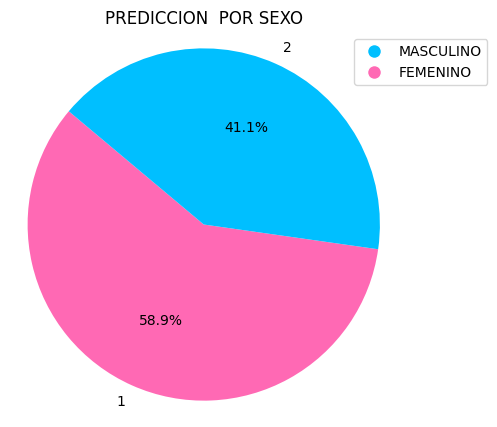

In [ ]:
# Suponiendo que 'unique_values' contiene los valores únicos y 'value_counts' contiene los recuentos
VALORES_UNICOS = data_transacional_prueba['sexo'].unique()
CONTAR_VALORES = data_transacional_prueba['sexo'].value_counts(normalize=True) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(5, 5))
plt.pie(CONTAR_VALORES, labels=VALORES_UNICOS, autopct='%1.1f%%', startangle=140, colors=['#FF69B4', '#00BFFF'])
plt.title('PREDICCION  POR SEXO')
plt.axis('equal')  # Esto asegura que el gráfico sea un círculo, no una elipse

# Crear la leyenda personalizada
custom_legend = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#00BFFF'),
                 plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#FF69B4')
                 ]

# Añadir la leyenda personalizada
plt.legend(custom_legend, ['MASCULINO', 'FEMENINO'], loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar la gráfica
plt.show()

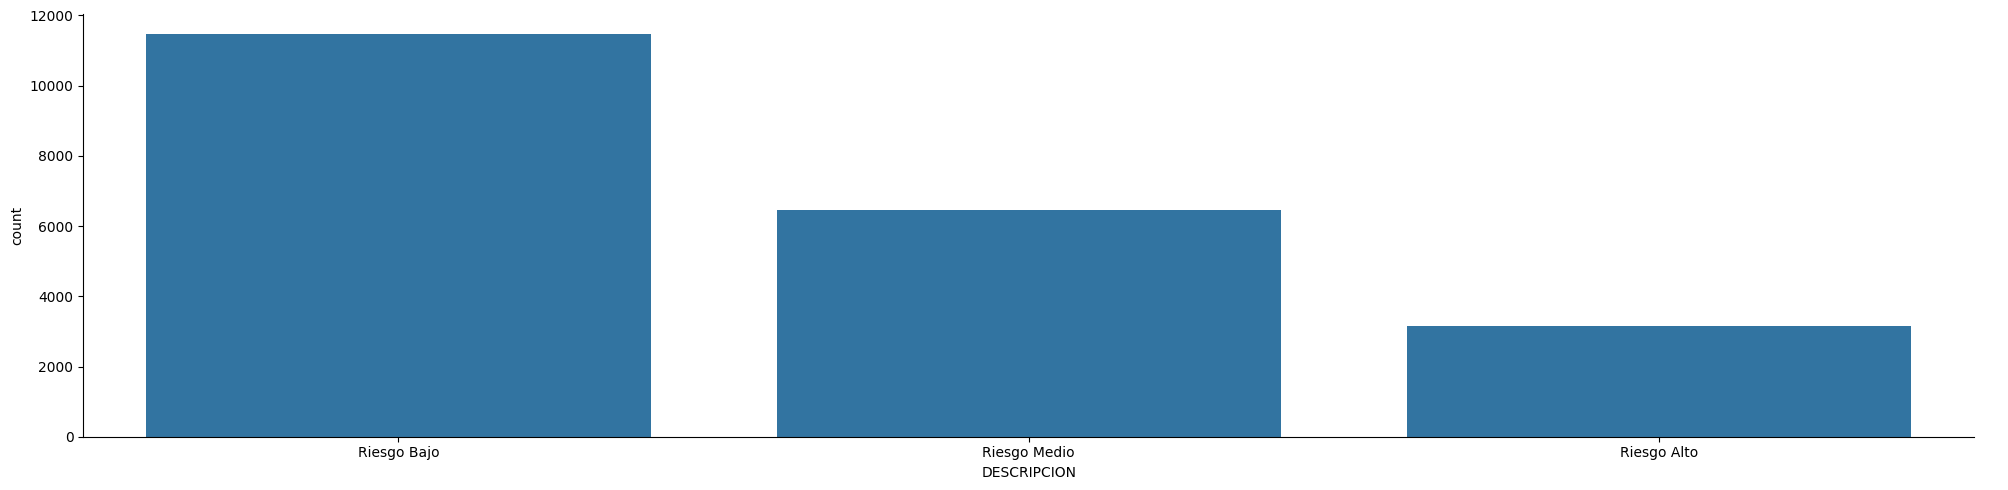

In [ ]:
sns.catplot(x ='DESCRIPCION', kind='count', data=data_transacional_prueba,aspect=4)